In [63]:
import pydicom
import numpy as np
from PIL import Image
import cv2
import glob
import os
import matplotlib.pyplot as plt

In [ ]:
# local
DATA_DIR_PATH = '/Users/cindywang/PycharmProjects/pda_echo/data/'
# o2
DATA_DIR_PATH = '/n/scratch3/users/a/ab455/Addie_PDA/'

In [ ]:
# helper functions
def load_dicom(file_path):
    """ Load DICOM file """
    return pydicom.dcmread(file_path)

def extract_slice(dicom_data, time_frame, slice_index):
    """ Extract a specific slice, accommodating both 3D and 4D DICOM data """
    # Get the number of dimensions
    num_dimensions = len(dicom_data.pixel_array.shape)

    if num_dimensions == 4:
        # 4D data: format (time, x, y, z)
        return dicom_data.pixel_array[time_frame, :, :, slice_index]
    elif num_dimensions == 3:
        # 3D data: format (x, y, z), assuming no time dimension
        # Ignore the time_frame parameter
        return dicom_data.pixel_array[:, :, slice_index]
    else:
        # Handle unexpected data dimensions
        raise ValueError("Unsupported DICOM data dimensions: {}".format(num_dimensions))


def convert_to_png(slice_data, output_file):
    """ Convert the slice to PNG format """
    # Normalize the image to 0-255 and convert to uint8
    slice_normalized = (slice_data - np.min(slice_data)) / (np.max(slice_data) - np.min(slice_data))
    image_2d_scaled = (slice_normalized * 255).astype(np.uint8)

    # Save as PNG
    image = Image.fromarray(image_2d_scaled)
    image.save(output_file)

In [ ]:
# collect all patients in missing

# collect all patients in output


In [ ]:
# make a new directory for processed

# make a subdirectory for png

# make a subdirectory for mp4

In [ ]:
# iterate through patients in missing


In [ ]:
# iterate through patients in output

In [ ]:
# iterate through all subdirectories for patients in processed png + create mp4s for each patient


In [ ]:
# making PNGs from DCM
# iterating through patients
PNG_OUTPUT_PATH = DATA_DIR_PATH + 'processed/png/'
try:
    os.makedirs(PNG_OUTPUT_PATH + EX_1, exist_ok=True)
    print(f"Directory '{PNG_OUTPUT_PATH + EX_1}' created successfully")
except OSError as error:
    print(f"Error creating directory '{PNG_OUTPUT_PATH + EX_1}': {error}")

# List all files and directories in the specified path
all_files = os.listdir(DATA_DIR_PATH + EX_1)

# If you want to list files only, you can filter out directories
files_only = [f for f in all_files if os.path.isfile(os.path.join(DATA_DIR_PATH + EX_1, f))]

for file in files_only:
    dicom_file = DATA_DIR_PATH + EX_1 + '/' + file
    slice_index = 0
    dicom_data = load_dicom(dicom_file)
    num_frames = getattr(dicom_data, 'NumberOfFrames', 1)
    try:
        os.makedirs(PNG_OUTPUT_PATH + EX_1 + '/' + file.strip('.dcm'), exist_ok=True)
        print(f"Directory '{PNG_OUTPUT_PATH + EX_1 + file.strip('.dcm'),}' created successfully")
    except OSError as error:
        print(f"Error creating directory '{PNG_OUTPUT_PATH + EX_1 + file.strip('.dcm'),}': {error}")
    for time_frame in range(0, num_frames):
        slice_data = extract_slice(dicom_data, time_frame, slice_index)
        output_png = PNG_OUTPUT_PATH + EX_1 + '/' + file.strip('.dcm') + '/t' + str(time_frame) + '.png'
        print(output_png)
        convert_to_png(slice_data, output_png)

In [ ]:
# making mp4 from PNG
all_images = [] # should be a list of all the images in that directory
image_array = []

# Loop through the sorted PNG files
for png_file in all_images:
    img = cv2.imread(png_file)
    h, w, layers = img.shape
    size = (w, h)
    image_array.append(img)

fps = 15  # or any other frame rate

# Determine the width and height from the first image
frame = cv2.imread(all_images[0])
height, width, layers = frame.shape

# Define the codec and create VideoWriter object
fourcc = cv2.VideoWriter_fourcc(*'mp4v')  # 'mp4v' or 'x264' based on your preference
video = cv2.VideoWriter(output_video_path, fourcc, fps, (width, height))
#
for image in image_array:
    video.write(image)

cv2.destroyAllWindows()
video.release()

In [ ]:
# iterating through patients
PNG_OUTPUT_PATH = DATA_DIR_PATH + 'processed/png/'
try:
    os.makedirs(PNG_OUTPUT_PATH + EX_1, exist_ok=True)
    print(f"Directory '{PNG_OUTPUT_PATH + EX_1}' created successfully")
except OSError as error:
    print(f"Error creating directory '{PNG_OUTPUT_PATH + EX_1}': {error}")

# List all files and directories in the specified path
all_files = os.listdir(DATA_DIR_PATH + EX_1)

# If you want to list files only, you can filter out directories
files_only = [f for f in all_files if os.path.isfile(os.path.join(DATA_DIR_PATH + EX_1, f))]

for file in files_only:
    dicom_file = DATA_DIR_PATH + EX_1 + '/' + file
    slice_index = 0
    dicom_data = load_dicom(dicom_file)
    num_frames = getattr(dicom_data, 'NumberOfFrames', 1)
    try:
        os.makedirs(PNG_OUTPUT_PATH + EX_1 + '/' + file.strip('.dcm'), exist_ok=True)
        print(f"Directory '{PNG_OUTPUT_PATH + EX_1 + file.strip('.dcm'),}' created successfully")
    except OSError as error:
        print(f"Error creating directory '{PNG_OUTPUT_PATH + EX_1 + file.strip('.dcm'),}': {error}")
    for time_frame in range(0, num_frames):
        slice_data = extract_slice(dicom_data, time_frame, slice_index)
        output_png = PNG_OUTPUT_PATH + EX_1 + '/' + file.strip('.dcm') + '/t' + str(time_frame) + '.png'
        print(output_png)
        convert_to_png(slice_data, output_png)

In [38]:
DATA_DIR_PATH = '/Users/cindywang/PycharmProjects/pda_echo/data/'
EX_1 = 'raw/1-101-101_20160104_133047'
EX_2 = 'raw/1-126-106_20151109_150030'
DCM_1_1 = EX_1 + '/1.2.840.113654.2.43120.27602955957033389439786618132140653204.dcm'

In [81]:
dicom1

Dataset.file_meta -------------------------------
(0002, 0000) File Meta Information Group Length  UL: 200
(0002, 0001) File Meta Information Version       OB: b'\x00\x01'
(0002, 0002) Media Storage SOP Class UID         UI: Ultrasound Multi-frame Image Storage
(0002, 0003) Media Storage SOP Instance UID      UI: 1.2.840.113654.2.431321.325126380484683511154986902362501449699
(0002, 0010) Transfer Syntax UID                 UI: JPEG Baseline (Process 1)
(0002, 0012) Implementation Class UID            UI: 1.2.40.0.13.1.1.1
(0002, 0013) Implementation Version Name         SH: 'dcm4che-1.4.35'
-------------------------------------------------
(0008, 0005) Specific Character Set              CS: 'ISO_IR 100'
(0008, 0008) Image Type                          CS: ['DERIVED', 'PRIMARY', 'CARDIOLOGY']
(0008, 0012) Instance Creation Date              DA: '20160812'
(0008, 0013) Instance Creation Time              TM: '140123'
(0008, 0014) Instance Creator UID                UI: 1.2.840.113654.2

In [33]:
# Example usage
dicom_file = DATA_DIR_PATH + DCM_1_1
time_frame = 148  # Change as per your requirement
slice_index = 0  # for going by timeframe
dicom_data = load_dicom(dicom_file)
slice_data = extract_slice(dicom_data, time_frame, slice_index)
output_png = 'outputt148.png'
convert_to_png(slice_data, output_png)

In [59]:
dicom0 = load_dicom(DATA_DIR_PATH + EX_1 + '/' + files_only[0])
print(files_only[0])
dicom1 = load_dicom(DATA_DIR_PATH + EX_1 + '/' + files_only[1])
print(files_only[1])
dicom2 = load_dicom(DATA_DIR_PATH + EX_1 + '/' + files_only[2])
print(files_only[2])

1.2.840.113654.2.43120.46574662866370758373306480867706278153.dcm
1.2.840.113654.2.431321.325126380484683511154986902362501449699.dcm
1.2.840.113654.2.43120.280852402283857660186210672914040543175.dcm


In [97]:
import cv2
import os
  # Replace with your list of filenames

fps = 15  # or any other frame rate

# Determine the width and height from the first image
frame = cv2.imread(all_images[0])
height, width, layers = frame.shape

# Define the codec and create VideoWriter object
fourcc = cv2.VideoWriter_fourcc(*'mp4v')  # 'mp4v' or 'x264' based on your preference
video = cv2.VideoWriter(output_video_path, fourcc, fps, (width, height))
#
for image in image_array:
    video.write(image)

cv2.destroyAllWindows()
video.release()


In [55]:
# testing with one example: EX_1
PNG_OUTPUT_PATH = DATA_DIR_PATH + 'processed/png/'
try:
    os.makedirs(PNG_OUTPUT_PATH + EX_1, exist_ok=True)
    print(f"Directory '{PNG_OUTPUT_PATH + EX_1}' created successfully")
except OSError as error:
    print(f"Error creating directory '{PNG_OUTPUT_PATH + EX_1}': {error}")

# List all files and directories in the specified path
all_files = os.listdir(DATA_DIR_PATH + EX_1)

# If you want to list files only, you can filter out directories
files_only = [f for f in all_files if os.path.isfile(os.path.join(DATA_DIR_PATH + EX_1, f))]

for file in files_only:
    dicom_file = DATA_DIR_PATH + EX_1 + '/' + file
    slice_index = 0
    dicom_data = load_dicom(dicom_file)
    num_frames = getattr(dicom_data, 'NumberOfFrames', 1)
    try:
        os.makedirs(PNG_OUTPUT_PATH + EX_1 + '/' + file.strip('.dcm'), exist_ok=True)
        print(f"Directory '{PNG_OUTPUT_PATH + EX_1 + file.strip('.dcm'),}' created successfully")
    except OSError as error:
        print(f"Error creating directory '{PNG_OUTPUT_PATH + EX_1 + file.strip('.dcm'),}': {error}")
    for time_frame in range(0, num_frames):
        slice_data = extract_slice(dicom_data, time_frame, slice_index)
        output_png = PNG_OUTPUT_PATH + EX_1 + '/' + file.strip('.dcm') + '/t' + str(time_frame) + '.png'
        print(output_png)
        convert_to_png(slice_data, output_png)

Directory '/Users/cindywang/PycharmProjects/pda_echo/data/processed/png/raw/1-101-101_20160104_133047' created successfully
Directory '('/Users/cindywang/PycharmProjects/pda_echo/data/processed/png/raw/1-101-101_20160104_1330471.2.840.113654.2.43120.46574662866370758373306480867706278153',)' created successfully
/Users/cindywang/PycharmProjects/pda_echo/data/processed/png/raw/1-101-101_20160104_133047/1.2.840.113654.2.43120.46574662866370758373306480867706278153_t0.png
/Users/cindywang/PycharmProjects/pda_echo/data/processed/png/raw/1-101-101_20160104_133047/1.2.840.113654.2.43120.46574662866370758373306480867706278153_t1.png
/Users/cindywang/PycharmProjects/pda_echo/data/processed/png/raw/1-101-101_20160104_133047/1.2.840.113654.2.43120.46574662866370758373306480867706278153_t2.png
/Users/cindywang/PycharmProjects/pda_echo/data/processed/png/raw/1-101-101_20160104_133047/1.2.840.113654.2.43120.46574662866370758373306480867706278153_t3.png
/Users/cindywang/PycharmProjects/pda_echo/data

/Users/cindywang/PycharmProjects/pda_echo/data/processed/png/raw/1-101-101_20160104_133047/1.2.840.113654.2.43120.46574662866370758373306480867706278153_t53.png
/Users/cindywang/PycharmProjects/pda_echo/data/processed/png/raw/1-101-101_20160104_133047/1.2.840.113654.2.43120.46574662866370758373306480867706278153_t54.png
/Users/cindywang/PycharmProjects/pda_echo/data/processed/png/raw/1-101-101_20160104_133047/1.2.840.113654.2.43120.46574662866370758373306480867706278153_t55.png
/Users/cindywang/PycharmProjects/pda_echo/data/processed/png/raw/1-101-101_20160104_133047/1.2.840.113654.2.43120.46574662866370758373306480867706278153_t56.png
/Users/cindywang/PycharmProjects/pda_echo/data/processed/png/raw/1-101-101_20160104_133047/1.2.840.113654.2.43120.46574662866370758373306480867706278153_t57.png
/Users/cindywang/PycharmProjects/pda_echo/data/processed/png/raw/1-101-101_20160104_133047/1.2.840.113654.2.43120.46574662866370758373306480867706278153_t58.png
/Users/cindywang/PycharmProjects/p

/Users/cindywang/PycharmProjects/pda_echo/data/processed/png/raw/1-101-101_20160104_133047/1.2.840.113654.2.43120.46574662866370758373306480867706278153_t109.png
/Users/cindywang/PycharmProjects/pda_echo/data/processed/png/raw/1-101-101_20160104_133047/1.2.840.113654.2.43120.46574662866370758373306480867706278153_t110.png
/Users/cindywang/PycharmProjects/pda_echo/data/processed/png/raw/1-101-101_20160104_133047/1.2.840.113654.2.43120.46574662866370758373306480867706278153_t111.png
/Users/cindywang/PycharmProjects/pda_echo/data/processed/png/raw/1-101-101_20160104_133047/1.2.840.113654.2.43120.46574662866370758373306480867706278153_t112.png
/Users/cindywang/PycharmProjects/pda_echo/data/processed/png/raw/1-101-101_20160104_133047/1.2.840.113654.2.43120.46574662866370758373306480867706278153_t113.png
/Users/cindywang/PycharmProjects/pda_echo/data/processed/png/raw/1-101-101_20160104_133047/1.2.840.113654.2.43120.46574662866370758373306480867706278153_t114.png
/Users/cindywang/PycharmProj

/Users/cindywang/PycharmProjects/pda_echo/data/processed/png/raw/1-101-101_20160104_133047/1.2.840.113654.2.431321.325126380484683511154986902362501449699_t48.png
/Users/cindywang/PycharmProjects/pda_echo/data/processed/png/raw/1-101-101_20160104_133047/1.2.840.113654.2.431321.325126380484683511154986902362501449699_t49.png
/Users/cindywang/PycharmProjects/pda_echo/data/processed/png/raw/1-101-101_20160104_133047/1.2.840.113654.2.431321.325126380484683511154986902362501449699_t50.png
/Users/cindywang/PycharmProjects/pda_echo/data/processed/png/raw/1-101-101_20160104_133047/1.2.840.113654.2.431321.325126380484683511154986902362501449699_t51.png
/Users/cindywang/PycharmProjects/pda_echo/data/processed/png/raw/1-101-101_20160104_133047/1.2.840.113654.2.431321.325126380484683511154986902362501449699_t52.png
/Users/cindywang/PycharmProjects/pda_echo/data/processed/png/raw/1-101-101_20160104_133047/1.2.840.113654.2.431321.325126380484683511154986902362501449699_t53.png
/Users/cindywang/Pycha

/Users/cindywang/PycharmProjects/pda_echo/data/processed/png/raw/1-101-101_20160104_133047/1.2.840.113654.2.43120.51821638291888293091926561795021518100_t0.png
/Users/cindywang/PycharmProjects/pda_echo/data/processed/png/raw/1-101-101_20160104_133047/1.2.840.113654.2.43120.51821638291888293091926561795021518100_t1.png
/Users/cindywang/PycharmProjects/pda_echo/data/processed/png/raw/1-101-101_20160104_133047/1.2.840.113654.2.43120.51821638291888293091926561795021518100_t2.png
/Users/cindywang/PycharmProjects/pda_echo/data/processed/png/raw/1-101-101_20160104_133047/1.2.840.113654.2.43120.51821638291888293091926561795021518100_t3.png
/Users/cindywang/PycharmProjects/pda_echo/data/processed/png/raw/1-101-101_20160104_133047/1.2.840.113654.2.43120.51821638291888293091926561795021518100_t4.png
/Users/cindywang/PycharmProjects/pda_echo/data/processed/png/raw/1-101-101_20160104_133047/1.2.840.113654.2.43120.51821638291888293091926561795021518100_t5.png
/Users/cindywang/PycharmProjects/pda_ech

/Users/cindywang/PycharmProjects/pda_echo/data/processed/png/raw/1-101-101_20160104_133047/1.2.840.113654.2.43120.51821638291888293091926561795021518100_t56.png
/Users/cindywang/PycharmProjects/pda_echo/data/processed/png/raw/1-101-101_20160104_133047/1.2.840.113654.2.43120.51821638291888293091926561795021518100_t57.png
/Users/cindywang/PycharmProjects/pda_echo/data/processed/png/raw/1-101-101_20160104_133047/1.2.840.113654.2.43120.51821638291888293091926561795021518100_t58.png
/Users/cindywang/PycharmProjects/pda_echo/data/processed/png/raw/1-101-101_20160104_133047/1.2.840.113654.2.43120.51821638291888293091926561795021518100_t59.png
/Users/cindywang/PycharmProjects/pda_echo/data/processed/png/raw/1-101-101_20160104_133047/1.2.840.113654.2.43120.51821638291888293091926561795021518100_t60.png
/Users/cindywang/PycharmProjects/pda_echo/data/processed/png/raw/1-101-101_20160104_133047/1.2.840.113654.2.43120.51821638291888293091926561795021518100_t61.png
/Users/cindywang/PycharmProjects/p

/Users/cindywang/PycharmProjects/pda_echo/data/processed/png/raw/1-101-101_20160104_133047/1.2.840.113654.2.431321.164912132510693016191749761810195780979_t10.png
/Users/cindywang/PycharmProjects/pda_echo/data/processed/png/raw/1-101-101_20160104_133047/1.2.840.113654.2.431321.164912132510693016191749761810195780979_t11.png
/Users/cindywang/PycharmProjects/pda_echo/data/processed/png/raw/1-101-101_20160104_133047/1.2.840.113654.2.431321.164912132510693016191749761810195780979_t12.png
/Users/cindywang/PycharmProjects/pda_echo/data/processed/png/raw/1-101-101_20160104_133047/1.2.840.113654.2.431321.164912132510693016191749761810195780979_t13.png
/Users/cindywang/PycharmProjects/pda_echo/data/processed/png/raw/1-101-101_20160104_133047/1.2.840.113654.2.431321.164912132510693016191749761810195780979_t14.png
/Users/cindywang/PycharmProjects/pda_echo/data/processed/png/raw/1-101-101_20160104_133047/1.2.840.113654.2.431321.164912132510693016191749761810195780979_t15.png
/Users/cindywang/Pycha

/Users/cindywang/PycharmProjects/pda_echo/data/processed/png/raw/1-101-101_20160104_133047/1.2.840.113654.2.431321.164912132510693016191749761810195780979_t66.png
/Users/cindywang/PycharmProjects/pda_echo/data/processed/png/raw/1-101-101_20160104_133047/1.2.840.113654.2.431321.164912132510693016191749761810195780979_t67.png
/Users/cindywang/PycharmProjects/pda_echo/data/processed/png/raw/1-101-101_20160104_133047/1.2.840.113654.2.431321.164912132510693016191749761810195780979_t68.png
/Users/cindywang/PycharmProjects/pda_echo/data/processed/png/raw/1-101-101_20160104_133047/1.2.840.113654.2.431321.164912132510693016191749761810195780979_t69.png
/Users/cindywang/PycharmProjects/pda_echo/data/processed/png/raw/1-101-101_20160104_133047/1.2.840.113654.2.431321.164912132510693016191749761810195780979_t70.png
/Users/cindywang/PycharmProjects/pda_echo/data/processed/png/raw/1-101-101_20160104_133047/1.2.840.113654.2.431321.164912132510693016191749761810195780979_t71.png
/Users/cindywang/Pycha

/Users/cindywang/PycharmProjects/pda_echo/data/processed/png/raw/1-101-101_20160104_133047/1.2.840.113654.2.431321.164912132510693016191749761810195780979_t123.png
/Users/cindywang/PycharmProjects/pda_echo/data/processed/png/raw/1-101-101_20160104_133047/1.2.840.113654.2.431321.164912132510693016191749761810195780979_t124.png
/Users/cindywang/PycharmProjects/pda_echo/data/processed/png/raw/1-101-101_20160104_133047/1.2.840.113654.2.431321.164912132510693016191749761810195780979_t125.png
/Users/cindywang/PycharmProjects/pda_echo/data/processed/png/raw/1-101-101_20160104_133047/1.2.840.113654.2.431321.164912132510693016191749761810195780979_t126.png
/Users/cindywang/PycharmProjects/pda_echo/data/processed/png/raw/1-101-101_20160104_133047/1.2.840.113654.2.431321.164912132510693016191749761810195780979_t127.png
/Users/cindywang/PycharmProjects/pda_echo/data/processed/png/raw/1-101-101_20160104_133047/1.2.840.113654.2.431321.164912132510693016191749761810195780979_t128.png
/Users/cindywang

/Users/cindywang/PycharmProjects/pda_echo/data/processed/png/raw/1-101-101_20160104_133047/1.2.840.113654.2.431321.164912132510693016191749761810195780979_t183.png
/Users/cindywang/PycharmProjects/pda_echo/data/processed/png/raw/1-101-101_20160104_133047/1.2.840.113654.2.431321.164912132510693016191749761810195780979_t184.png
/Users/cindywang/PycharmProjects/pda_echo/data/processed/png/raw/1-101-101_20160104_133047/1.2.840.113654.2.431321.164912132510693016191749761810195780979_t185.png
/Users/cindywang/PycharmProjects/pda_echo/data/processed/png/raw/1-101-101_20160104_133047/1.2.840.113654.2.431321.164912132510693016191749761810195780979_t186.png
/Users/cindywang/PycharmProjects/pda_echo/data/processed/png/raw/1-101-101_20160104_133047/1.2.840.113654.2.431321.164912132510693016191749761810195780979_t187.png
/Users/cindywang/PycharmProjects/pda_echo/data/processed/png/raw/1-101-101_20160104_133047/1.2.840.113654.2.431321.164912132510693016191749761810195780979_t188.png
/Users/cindywang

/Users/cindywang/PycharmProjects/pda_echo/data/processed/png/raw/1-101-101_20160104_133047/1.2.840.113654.2.431321.164912132510693016191749761810195780979_t233.png
/Users/cindywang/PycharmProjects/pda_echo/data/processed/png/raw/1-101-101_20160104_133047/1.2.840.113654.2.431321.164912132510693016191749761810195780979_t234.png
/Users/cindywang/PycharmProjects/pda_echo/data/processed/png/raw/1-101-101_20160104_133047/1.2.840.113654.2.431321.164912132510693016191749761810195780979_t235.png
/Users/cindywang/PycharmProjects/pda_echo/data/processed/png/raw/1-101-101_20160104_133047/1.2.840.113654.2.431321.164912132510693016191749761810195780979_t236.png
/Users/cindywang/PycharmProjects/pda_echo/data/processed/png/raw/1-101-101_20160104_133047/1.2.840.113654.2.431321.164912132510693016191749761810195780979_t237.png
/Users/cindywang/PycharmProjects/pda_echo/data/processed/png/raw/1-101-101_20160104_133047/1.2.840.113654.2.431321.164912132510693016191749761810195780979_t238.png
/Users/cindywang

/Users/cindywang/PycharmProjects/pda_echo/data/processed/png/raw/1-101-101_20160104_133047/1.2.840.113654.2.431321.164912132510693016191749761810195780979_t289.png
/Users/cindywang/PycharmProjects/pda_echo/data/processed/png/raw/1-101-101_20160104_133047/1.2.840.113654.2.431321.164912132510693016191749761810195780979_t290.png
/Users/cindywang/PycharmProjects/pda_echo/data/processed/png/raw/1-101-101_20160104_133047/1.2.840.113654.2.431321.164912132510693016191749761810195780979_t291.png
/Users/cindywang/PycharmProjects/pda_echo/data/processed/png/raw/1-101-101_20160104_133047/1.2.840.113654.2.431321.164912132510693016191749761810195780979_t292.png
/Users/cindywang/PycharmProjects/pda_echo/data/processed/png/raw/1-101-101_20160104_133047/1.2.840.113654.2.431321.164912132510693016191749761810195780979_t293.png
/Users/cindywang/PycharmProjects/pda_echo/data/processed/png/raw/1-101-101_20160104_133047/1.2.840.113654.2.431321.164912132510693016191749761810195780979_t294.png
/Users/cindywang

/Users/cindywang/PycharmProjects/pda_echo/data/processed/png/raw/1-101-101_20160104_133047/1.2.840.113654.2.43120.94867109137876314682083379012064902220_t43.png
/Users/cindywang/PycharmProjects/pda_echo/data/processed/png/raw/1-101-101_20160104_133047/1.2.840.113654.2.43120.94867109137876314682083379012064902220_t44.png
/Users/cindywang/PycharmProjects/pda_echo/data/processed/png/raw/1-101-101_20160104_133047/1.2.840.113654.2.43120.94867109137876314682083379012064902220_t45.png
/Users/cindywang/PycharmProjects/pda_echo/data/processed/png/raw/1-101-101_20160104_133047/1.2.840.113654.2.43120.94867109137876314682083379012064902220_t46.png
/Users/cindywang/PycharmProjects/pda_echo/data/processed/png/raw/1-101-101_20160104_133047/1.2.840.113654.2.43120.94867109137876314682083379012064902220_t47.png
/Users/cindywang/PycharmProjects/pda_echo/data/processed/png/raw/1-101-101_20160104_133047/1.2.840.113654.2.43120.94867109137876314682083379012064902220_t48.png
/Users/cindywang/PycharmProjects/p

/Users/cindywang/PycharmProjects/pda_echo/data/processed/png/raw/1-101-101_20160104_133047/1.2.840.113654.2.431321.128002760219635099108970618945537854501_t40.png
/Users/cindywang/PycharmProjects/pda_echo/data/processed/png/raw/1-101-101_20160104_133047/1.2.840.113654.2.431321.128002760219635099108970618945537854501_t41.png
/Users/cindywang/PycharmProjects/pda_echo/data/processed/png/raw/1-101-101_20160104_133047/1.2.840.113654.2.431321.128002760219635099108970618945537854501_t42.png
/Users/cindywang/PycharmProjects/pda_echo/data/processed/png/raw/1-101-101_20160104_133047/1.2.840.113654.2.431321.128002760219635099108970618945537854501_t43.png
/Users/cindywang/PycharmProjects/pda_echo/data/processed/png/raw/1-101-101_20160104_133047/1.2.840.113654.2.431321.128002760219635099108970618945537854501_t44.png
/Users/cindywang/PycharmProjects/pda_echo/data/processed/png/raw/1-101-101_20160104_133047/1.2.840.113654.2.431321.128002760219635099108970618945537854501_t45.png
/Users/cindywang/Pycha

/Users/cindywang/PycharmProjects/pda_echo/data/processed/png/raw/1-101-101_20160104_133047/1.2.840.113654.2.431321.128002760219635099108970618945537854501_t91.png
/Users/cindywang/PycharmProjects/pda_echo/data/processed/png/raw/1-101-101_20160104_133047/1.2.840.113654.2.431321.128002760219635099108970618945537854501_t92.png
/Users/cindywang/PycharmProjects/pda_echo/data/processed/png/raw/1-101-101_20160104_133047/1.2.840.113654.2.431321.128002760219635099108970618945537854501_t93.png
/Users/cindywang/PycharmProjects/pda_echo/data/processed/png/raw/1-101-101_20160104_133047/1.2.840.113654.2.431321.128002760219635099108970618945537854501_t94.png
/Users/cindywang/PycharmProjects/pda_echo/data/processed/png/raw/1-101-101_20160104_133047/1.2.840.113654.2.431321.128002760219635099108970618945537854501_t95.png
/Users/cindywang/PycharmProjects/pda_echo/data/processed/png/raw/1-101-101_20160104_133047/1.2.840.113654.2.431321.128002760219635099108970618945537854501_t96.png
/Users/cindywang/Pycha

/Users/cindywang/PycharmProjects/pda_echo/data/processed/png/raw/1-101-101_20160104_133047/1.2.840.113654.2.431321.196297133454102326629927390755659125435_t0.png
/Users/cindywang/PycharmProjects/pda_echo/data/processed/png/raw/1-101-101_20160104_133047/1.2.840.113654.2.431321.196297133454102326629927390755659125435_t1.png
/Users/cindywang/PycharmProjects/pda_echo/data/processed/png/raw/1-101-101_20160104_133047/1.2.840.113654.2.431321.196297133454102326629927390755659125435_t2.png
/Users/cindywang/PycharmProjects/pda_echo/data/processed/png/raw/1-101-101_20160104_133047/1.2.840.113654.2.431321.196297133454102326629927390755659125435_t3.png
/Users/cindywang/PycharmProjects/pda_echo/data/processed/png/raw/1-101-101_20160104_133047/1.2.840.113654.2.431321.196297133454102326629927390755659125435_t4.png
/Users/cindywang/PycharmProjects/pda_echo/data/processed/png/raw/1-101-101_20160104_133047/1.2.840.113654.2.431321.196297133454102326629927390755659125435_t5.png
/Users/cindywang/PycharmProj

/Users/cindywang/PycharmProjects/pda_echo/data/processed/png/raw/1-101-101_20160104_133047/1.2.840.113654.2.43120.151885096328317567298157341861678147515_t30.png
/Users/cindywang/PycharmProjects/pda_echo/data/processed/png/raw/1-101-101_20160104_133047/1.2.840.113654.2.43120.151885096328317567298157341861678147515_t31.png
/Users/cindywang/PycharmProjects/pda_echo/data/processed/png/raw/1-101-101_20160104_133047/1.2.840.113654.2.43120.151885096328317567298157341861678147515_t32.png
/Users/cindywang/PycharmProjects/pda_echo/data/processed/png/raw/1-101-101_20160104_133047/1.2.840.113654.2.43120.151885096328317567298157341861678147515_t33.png
/Users/cindywang/PycharmProjects/pda_echo/data/processed/png/raw/1-101-101_20160104_133047/1.2.840.113654.2.43120.151885096328317567298157341861678147515_t34.png
/Users/cindywang/PycharmProjects/pda_echo/data/processed/png/raw/1-101-101_20160104_133047/1.2.840.113654.2.43120.151885096328317567298157341861678147515_t35.png
/Users/cindywang/PycharmProj

/Users/cindywang/PycharmProjects/pda_echo/data/processed/png/raw/1-101-101_20160104_133047/1.2.840.113654.2.43120.151885096328317567298157341861678147515_t89.png
/Users/cindywang/PycharmProjects/pda_echo/data/processed/png/raw/1-101-101_20160104_133047/1.2.840.113654.2.43120.151885096328317567298157341861678147515_t90.png
/Users/cindywang/PycharmProjects/pda_echo/data/processed/png/raw/1-101-101_20160104_133047/1.2.840.113654.2.43120.151885096328317567298157341861678147515_t91.png
/Users/cindywang/PycharmProjects/pda_echo/data/processed/png/raw/1-101-101_20160104_133047/1.2.840.113654.2.43120.151885096328317567298157341861678147515_t92.png
/Users/cindywang/PycharmProjects/pda_echo/data/processed/png/raw/1-101-101_20160104_133047/1.2.840.113654.2.43120.151885096328317567298157341861678147515_t93.png
/Users/cindywang/PycharmProjects/pda_echo/data/processed/png/raw/1-101-101_20160104_133047/1.2.840.113654.2.43120.151885096328317567298157341861678147515_t94.png
/Users/cindywang/PycharmProj

/Users/cindywang/PycharmProjects/pda_echo/data/processed/png/raw/1-101-101_20160104_133047/1.2.840.113654.2.43120.151885096328317567298157341861678147515_t147.png
/Users/cindywang/PycharmProjects/pda_echo/data/processed/png/raw/1-101-101_20160104_133047/1.2.840.113654.2.43120.151885096328317567298157341861678147515_t148.png
/Users/cindywang/PycharmProjects/pda_echo/data/processed/png/raw/1-101-101_20160104_133047/1.2.840.113654.2.43120.151885096328317567298157341861678147515_t149.png
/Users/cindywang/PycharmProjects/pda_echo/data/processed/png/raw/1-101-101_20160104_133047/1.2.840.113654.2.43120.151885096328317567298157341861678147515_t150.png
/Users/cindywang/PycharmProjects/pda_echo/data/processed/png/raw/1-101-101_20160104_133047/1.2.840.113654.2.43120.151885096328317567298157341861678147515_t151.png
/Users/cindywang/PycharmProjects/pda_echo/data/processed/png/raw/1-101-101_20160104_133047/1.2.840.113654.2.43120.151885096328317567298157341861678147515_t152.png
/Users/cindywang/Pycha

/Users/cindywang/PycharmProjects/pda_echo/data/processed/png/raw/1-101-101_20160104_133047/1.2.840.113654.2.43120.151885096328317567298157341861678147515_t207.png
/Users/cindywang/PycharmProjects/pda_echo/data/processed/png/raw/1-101-101_20160104_133047/1.2.840.113654.2.43120.151885096328317567298157341861678147515_t208.png
/Users/cindywang/PycharmProjects/pda_echo/data/processed/png/raw/1-101-101_20160104_133047/1.2.840.113654.2.43120.151885096328317567298157341861678147515_t209.png
/Users/cindywang/PycharmProjects/pda_echo/data/processed/png/raw/1-101-101_20160104_133047/1.2.840.113654.2.43120.151885096328317567298157341861678147515_t210.png
/Users/cindywang/PycharmProjects/pda_echo/data/processed/png/raw/1-101-101_20160104_133047/1.2.840.113654.2.43120.151885096328317567298157341861678147515_t211.png
/Users/cindywang/PycharmProjects/pda_echo/data/processed/png/raw/1-101-101_20160104_133047/1.2.840.113654.2.43120.151885096328317567298157341861678147515_t212.png
/Users/cindywang/Pycha

/Users/cindywang/PycharmProjects/pda_echo/data/processed/png/raw/1-101-101_20160104_133047/1.2.840.113654.2.43120.151885096328317567298157341861678147515_t258.png
/Users/cindywang/PycharmProjects/pda_echo/data/processed/png/raw/1-101-101_20160104_133047/1.2.840.113654.2.43120.151885096328317567298157341861678147515_t259.png
/Users/cindywang/PycharmProjects/pda_echo/data/processed/png/raw/1-101-101_20160104_133047/1.2.840.113654.2.43120.151885096328317567298157341861678147515_t260.png
/Users/cindywang/PycharmProjects/pda_echo/data/processed/png/raw/1-101-101_20160104_133047/1.2.840.113654.2.43120.151885096328317567298157341861678147515_t261.png
/Users/cindywang/PycharmProjects/pda_echo/data/processed/png/raw/1-101-101_20160104_133047/1.2.840.113654.2.43120.151885096328317567298157341861678147515_t262.png
/Users/cindywang/PycharmProjects/pda_echo/data/processed/png/raw/1-101-101_20160104_133047/1.2.840.113654.2.43120.151885096328317567298157341861678147515_t263.png
/Users/cindywang/Pycha

/Users/cindywang/PycharmProjects/pda_echo/data/processed/png/raw/1-101-101_20160104_133047/1.2.840.113654.2.431321.84097494597323618418644068661696701432_t31.png
/Users/cindywang/PycharmProjects/pda_echo/data/processed/png/raw/1-101-101_20160104_133047/1.2.840.113654.2.431321.84097494597323618418644068661696701432_t32.png
/Users/cindywang/PycharmProjects/pda_echo/data/processed/png/raw/1-101-101_20160104_133047/1.2.840.113654.2.431321.84097494597323618418644068661696701432_t33.png
/Users/cindywang/PycharmProjects/pda_echo/data/processed/png/raw/1-101-101_20160104_133047/1.2.840.113654.2.431321.84097494597323618418644068661696701432_t34.png
/Users/cindywang/PycharmProjects/pda_echo/data/processed/png/raw/1-101-101_20160104_133047/1.2.840.113654.2.431321.84097494597323618418644068661696701432_t35.png
/Users/cindywang/PycharmProjects/pda_echo/data/processed/png/raw/1-101-101_20160104_133047/1.2.840.113654.2.431321.84097494597323618418644068661696701432_t36.png
/Users/cindywang/PycharmProj

/Users/cindywang/PycharmProjects/pda_echo/data/processed/png/raw/1-101-101_20160104_133047/1.2.840.113654.2.431321.84097494597323618418644068661696701432_t90.png
/Users/cindywang/PycharmProjects/pda_echo/data/processed/png/raw/1-101-101_20160104_133047/1.2.840.113654.2.431321.84097494597323618418644068661696701432_t91.png
/Users/cindywang/PycharmProjects/pda_echo/data/processed/png/raw/1-101-101_20160104_133047/1.2.840.113654.2.431321.84097494597323618418644068661696701432_t92.png
/Users/cindywang/PycharmProjects/pda_echo/data/processed/png/raw/1-101-101_20160104_133047/1.2.840.113654.2.431321.84097494597323618418644068661696701432_t93.png
/Users/cindywang/PycharmProjects/pda_echo/data/processed/png/raw/1-101-101_20160104_133047/1.2.840.113654.2.431321.84097494597323618418644068661696701432_t94.png
/Users/cindywang/PycharmProjects/pda_echo/data/processed/png/raw/1-101-101_20160104_133047/1.2.840.113654.2.431321.84097494597323618418644068661696701432_t95.png
/Users/cindywang/PycharmProj

/Users/cindywang/PycharmProjects/pda_echo/data/processed/png/raw/1-101-101_20160104_133047/1.2.840.113654.2.431321.84097494597323618418644068661696701432_t149.png
/Users/cindywang/PycharmProjects/pda_echo/data/processed/png/raw/1-101-101_20160104_133047/1.2.840.113654.2.431321.84097494597323618418644068661696701432_t150.png
/Users/cindywang/PycharmProjects/pda_echo/data/processed/png/raw/1-101-101_20160104_133047/1.2.840.113654.2.431321.84097494597323618418644068661696701432_t151.png
/Users/cindywang/PycharmProjects/pda_echo/data/processed/png/raw/1-101-101_20160104_133047/1.2.840.113654.2.431321.84097494597323618418644068661696701432_t152.png
/Users/cindywang/PycharmProjects/pda_echo/data/processed/png/raw/1-101-101_20160104_133047/1.2.840.113654.2.431321.84097494597323618418644068661696701432_t153.png
/Users/cindywang/PycharmProjects/pda_echo/data/processed/png/raw/1-101-101_20160104_133047/1.2.840.113654.2.431321.84097494597323618418644068661696701432_t154.png
/Users/cindywang/Pycha

/Users/cindywang/PycharmProjects/pda_echo/data/processed/png/raw/1-101-101_20160104_133047/1.2.840.113654.2.431321.84097494597323618418644068661696701432_t208.png
/Users/cindywang/PycharmProjects/pda_echo/data/processed/png/raw/1-101-101_20160104_133047/1.2.840.113654.2.431321.84097494597323618418644068661696701432_t209.png
/Users/cindywang/PycharmProjects/pda_echo/data/processed/png/raw/1-101-101_20160104_133047/1.2.840.113654.2.431321.84097494597323618418644068661696701432_t210.png
/Users/cindywang/PycharmProjects/pda_echo/data/processed/png/raw/1-101-101_20160104_133047/1.2.840.113654.2.431321.84097494597323618418644068661696701432_t211.png
/Users/cindywang/PycharmProjects/pda_echo/data/processed/png/raw/1-101-101_20160104_133047/1.2.840.113654.2.431321.84097494597323618418644068661696701432_t212.png
/Users/cindywang/PycharmProjects/pda_echo/data/processed/png/raw/1-101-101_20160104_133047/1.2.840.113654.2.431321.84097494597323618418644068661696701432_t213.png
/Users/cindywang/Pycha

/Users/cindywang/PycharmProjects/pda_echo/data/processed/png/raw/1-101-101_20160104_133047/1.2.840.113654.2.431321.218870977709549653804291947287127658762_t22.png
/Users/cindywang/PycharmProjects/pda_echo/data/processed/png/raw/1-101-101_20160104_133047/1.2.840.113654.2.431321.218870977709549653804291947287127658762_t23.png
/Users/cindywang/PycharmProjects/pda_echo/data/processed/png/raw/1-101-101_20160104_133047/1.2.840.113654.2.431321.218870977709549653804291947287127658762_t24.png
/Users/cindywang/PycharmProjects/pda_echo/data/processed/png/raw/1-101-101_20160104_133047/1.2.840.113654.2.431321.218870977709549653804291947287127658762_t25.png
/Users/cindywang/PycharmProjects/pda_echo/data/processed/png/raw/1-101-101_20160104_133047/1.2.840.113654.2.431321.218870977709549653804291947287127658762_t26.png
/Users/cindywang/PycharmProjects/pda_echo/data/processed/png/raw/1-101-101_20160104_133047/1.2.840.113654.2.431321.218870977709549653804291947287127658762_t27.png
/Users/cindywang/Pycha

/Users/cindywang/PycharmProjects/pda_echo/data/processed/png/raw/1-101-101_20160104_133047/1.2.840.113654.2.431321.218870977709549653804291947287127658762_t76.png
/Users/cindywang/PycharmProjects/pda_echo/data/processed/png/raw/1-101-101_20160104_133047/1.2.840.113654.2.431321.218870977709549653804291947287127658762_t77.png
/Users/cindywang/PycharmProjects/pda_echo/data/processed/png/raw/1-101-101_20160104_133047/1.2.840.113654.2.431321.218870977709549653804291947287127658762_t78.png
/Users/cindywang/PycharmProjects/pda_echo/data/processed/png/raw/1-101-101_20160104_133047/1.2.840.113654.2.431321.218870977709549653804291947287127658762_t79.png
/Users/cindywang/PycharmProjects/pda_echo/data/processed/png/raw/1-101-101_20160104_133047/1.2.840.113654.2.431321.218870977709549653804291947287127658762_t80.png
/Users/cindywang/PycharmProjects/pda_echo/data/processed/png/raw/1-101-101_20160104_133047/1.2.840.113654.2.431321.218870977709549653804291947287127658762_t81.png
/Users/cindywang/Pycha

/Users/cindywang/PycharmProjects/pda_echo/data/processed/png/raw/1-101-101_20160104_133047/1.2.840.113654.2.431321.218870977709549653804291947287127658762_t129.png
/Users/cindywang/PycharmProjects/pda_echo/data/processed/png/raw/1-101-101_20160104_133047/1.2.840.113654.2.431321.218870977709549653804291947287127658762_t130.png
/Users/cindywang/PycharmProjects/pda_echo/data/processed/png/raw/1-101-101_20160104_133047/1.2.840.113654.2.431321.218870977709549653804291947287127658762_t131.png
/Users/cindywang/PycharmProjects/pda_echo/data/processed/png/raw/1-101-101_20160104_133047/1.2.840.113654.2.431321.218870977709549653804291947287127658762_t132.png
/Users/cindywang/PycharmProjects/pda_echo/data/processed/png/raw/1-101-101_20160104_133047/1.2.840.113654.2.431321.218870977709549653804291947287127658762_t133.png
/Users/cindywang/PycharmProjects/pda_echo/data/processed/png/raw/1-101-101_20160104_133047/1.2.840.113654.2.431321.218870977709549653804291947287127658762_t134.png
/Users/cindywang

/Users/cindywang/PycharmProjects/pda_echo/data/processed/png/raw/1-101-101_20160104_133047/1.2.840.113654.2.431321.218870977709549653804291947287127658762_t184.png
/Users/cindywang/PycharmProjects/pda_echo/data/processed/png/raw/1-101-101_20160104_133047/1.2.840.113654.2.431321.218870977709549653804291947287127658762_t185.png
/Users/cindywang/PycharmProjects/pda_echo/data/processed/png/raw/1-101-101_20160104_133047/1.2.840.113654.2.431321.218870977709549653804291947287127658762_t186.png
/Users/cindywang/PycharmProjects/pda_echo/data/processed/png/raw/1-101-101_20160104_133047/1.2.840.113654.2.431321.218870977709549653804291947287127658762_t187.png
/Users/cindywang/PycharmProjects/pda_echo/data/processed/png/raw/1-101-101_20160104_133047/1.2.840.113654.2.431321.218870977709549653804291947287127658762_t188.png
/Users/cindywang/PycharmProjects/pda_echo/data/processed/png/raw/1-101-101_20160104_133047/1.2.840.113654.2.431321.218870977709549653804291947287127658762_t189.png
/Users/cindywang

/Users/cindywang/PycharmProjects/pda_echo/data/processed/png/raw/1-101-101_20160104_133047/1.2.840.113654.2.431321.218870977709549653804291947287127658762_t238.png
/Users/cindywang/PycharmProjects/pda_echo/data/processed/png/raw/1-101-101_20160104_133047/1.2.840.113654.2.431321.218870977709549653804291947287127658762_t239.png
/Users/cindywang/PycharmProjects/pda_echo/data/processed/png/raw/1-101-101_20160104_133047/1.2.840.113654.2.431321.218870977709549653804291947287127658762_t240.png
/Users/cindywang/PycharmProjects/pda_echo/data/processed/png/raw/1-101-101_20160104_133047/1.2.840.113654.2.431321.218870977709549653804291947287127658762_t241.png
/Users/cindywang/PycharmProjects/pda_echo/data/processed/png/raw/1-101-101_20160104_133047/1.2.840.113654.2.431321.218870977709549653804291947287127658762_t242.png
/Users/cindywang/PycharmProjects/pda_echo/data/processed/png/raw/1-101-101_20160104_133047/1.2.840.113654.2.431321.218870977709549653804291947287127658762_t243.png
/Users/cindywang

/Users/cindywang/PycharmProjects/pda_echo/data/processed/png/raw/1-101-101_20160104_133047/1.2.840.113654.2.431321.218870977709549653804291947287127658762_t290.png
/Users/cindywang/PycharmProjects/pda_echo/data/processed/png/raw/1-101-101_20160104_133047/1.2.840.113654.2.431321.218870977709549653804291947287127658762_t291.png
/Users/cindywang/PycharmProjects/pda_echo/data/processed/png/raw/1-101-101_20160104_133047/1.2.840.113654.2.431321.218870977709549653804291947287127658762_t292.png
/Users/cindywang/PycharmProjects/pda_echo/data/processed/png/raw/1-101-101_20160104_133047/1.2.840.113654.2.431321.218870977709549653804291947287127658762_t293.png
/Users/cindywang/PycharmProjects/pda_echo/data/processed/png/raw/1-101-101_20160104_133047/1.2.840.113654.2.431321.218870977709549653804291947287127658762_t294.png
/Users/cindywang/PycharmProjects/pda_echo/data/processed/png/raw/1-101-101_20160104_133047/1.2.840.113654.2.431321.218870977709549653804291947287127658762_t295.png
/Users/cindywang

/Users/cindywang/PycharmProjects/pda_echo/data/processed/png/raw/1-101-101_20160104_133047/1.2.840.113654.2.431321.3270364932867869559754460301507062112_t43.png
/Users/cindywang/PycharmProjects/pda_echo/data/processed/png/raw/1-101-101_20160104_133047/1.2.840.113654.2.431321.3270364932867869559754460301507062112_t44.png
/Users/cindywang/PycharmProjects/pda_echo/data/processed/png/raw/1-101-101_20160104_133047/1.2.840.113654.2.431321.3270364932867869559754460301507062112_t45.png
/Users/cindywang/PycharmProjects/pda_echo/data/processed/png/raw/1-101-101_20160104_133047/1.2.840.113654.2.431321.3270364932867869559754460301507062112_t46.png
/Users/cindywang/PycharmProjects/pda_echo/data/processed/png/raw/1-101-101_20160104_133047/1.2.840.113654.2.431321.3270364932867869559754460301507062112_t47.png
/Users/cindywang/PycharmProjects/pda_echo/data/processed/png/raw/1-101-101_20160104_133047/1.2.840.113654.2.431321.3270364932867869559754460301507062112_t48.png
/Users/cindywang/PycharmProjects/p

/Users/cindywang/PycharmProjects/pda_echo/data/processed/png/raw/1-101-101_20160104_133047/1.2.840.113654.2.431321.3270364932867869559754460301507062112_t94.png
/Users/cindywang/PycharmProjects/pda_echo/data/processed/png/raw/1-101-101_20160104_133047/1.2.840.113654.2.431321.3270364932867869559754460301507062112_t95.png
/Users/cindywang/PycharmProjects/pda_echo/data/processed/png/raw/1-101-101_20160104_133047/1.2.840.113654.2.431321.3270364932867869559754460301507062112_t96.png
/Users/cindywang/PycharmProjects/pda_echo/data/processed/png/raw/1-101-101_20160104_133047/1.2.840.113654.2.431321.3270364932867869559754460301507062112_t97.png
/Users/cindywang/PycharmProjects/pda_echo/data/processed/png/raw/1-101-101_20160104_133047/1.2.840.113654.2.431321.3270364932867869559754460301507062112_t98.png
/Users/cindywang/PycharmProjects/pda_echo/data/processed/png/raw/1-101-101_20160104_133047/1.2.840.113654.2.431321.3270364932867869559754460301507062112_t99.png
/Users/cindywang/PycharmProjects/p

/Users/cindywang/PycharmProjects/pda_echo/data/processed/png/raw/1-101-101_20160104_133047/1.2.840.113654.2.431321.3270364932867869559754460301507062112_t154.png
/Users/cindywang/PycharmProjects/pda_echo/data/processed/png/raw/1-101-101_20160104_133047/1.2.840.113654.2.431321.3270364932867869559754460301507062112_t155.png
/Users/cindywang/PycharmProjects/pda_echo/data/processed/png/raw/1-101-101_20160104_133047/1.2.840.113654.2.431321.3270364932867869559754460301507062112_t156.png
/Users/cindywang/PycharmProjects/pda_echo/data/processed/png/raw/1-101-101_20160104_133047/1.2.840.113654.2.431321.3270364932867869559754460301507062112_t157.png
/Users/cindywang/PycharmProjects/pda_echo/data/processed/png/raw/1-101-101_20160104_133047/1.2.840.113654.2.431321.3270364932867869559754460301507062112_t158.png
/Users/cindywang/PycharmProjects/pda_echo/data/processed/png/raw/1-101-101_20160104_133047/1.2.840.113654.2.431321.3270364932867869559754460301507062112_t159.png
/Users/cindywang/PycharmProj

/Users/cindywang/PycharmProjects/pda_echo/data/processed/png/raw/1-101-101_20160104_133047/1.2.840.113654.2.431321.3270364932867869559754460301507062112_t205.png
/Users/cindywang/PycharmProjects/pda_echo/data/processed/png/raw/1-101-101_20160104_133047/1.2.840.113654.2.431321.3270364932867869559754460301507062112_t206.png
/Users/cindywang/PycharmProjects/pda_echo/data/processed/png/raw/1-101-101_20160104_133047/1.2.840.113654.2.431321.3270364932867869559754460301507062112_t207.png
/Users/cindywang/PycharmProjects/pda_echo/data/processed/png/raw/1-101-101_20160104_133047/1.2.840.113654.2.431321.3270364932867869559754460301507062112_t208.png
/Users/cindywang/PycharmProjects/pda_echo/data/processed/png/raw/1-101-101_20160104_133047/1.2.840.113654.2.431321.3270364932867869559754460301507062112_t209.png
/Users/cindywang/PycharmProjects/pda_echo/data/processed/png/raw/1-101-101_20160104_133047/1.2.840.113654.2.431321.3270364932867869559754460301507062112_t210.png
/Users/cindywang/PycharmProj

/Users/cindywang/PycharmProjects/pda_echo/data/processed/png/raw/1-101-101_20160104_133047/1.2.840.113654.2.431321.3270364932867869559754460301507062112_t265.png
/Users/cindywang/PycharmProjects/pda_echo/data/processed/png/raw/1-101-101_20160104_133047/1.2.840.113654.2.431321.3270364932867869559754460301507062112_t266.png
/Users/cindywang/PycharmProjects/pda_echo/data/processed/png/raw/1-101-101_20160104_133047/1.2.840.113654.2.431321.3270364932867869559754460301507062112_t267.png
/Users/cindywang/PycharmProjects/pda_echo/data/processed/png/raw/1-101-101_20160104_133047/1.2.840.113654.2.431321.3270364932867869559754460301507062112_t268.png
/Users/cindywang/PycharmProjects/pda_echo/data/processed/png/raw/1-101-101_20160104_133047/1.2.840.113654.2.431321.3270364932867869559754460301507062112_t269.png
/Users/cindywang/PycharmProjects/pda_echo/data/processed/png/raw/1-101-101_20160104_133047/1.2.840.113654.2.431321.3270364932867869559754460301507062112_t270.png
/Users/cindywang/PycharmProj

/Users/cindywang/PycharmProjects/pda_echo/data/processed/png/raw/1-101-101_20160104_133047/1.2.840.113654.2.43120.180735570280482909973235568480936212027_t17.png
/Users/cindywang/PycharmProjects/pda_echo/data/processed/png/raw/1-101-101_20160104_133047/1.2.840.113654.2.43120.180735570280482909973235568480936212027_t18.png
/Users/cindywang/PycharmProjects/pda_echo/data/processed/png/raw/1-101-101_20160104_133047/1.2.840.113654.2.43120.180735570280482909973235568480936212027_t19.png
/Users/cindywang/PycharmProjects/pda_echo/data/processed/png/raw/1-101-101_20160104_133047/1.2.840.113654.2.43120.180735570280482909973235568480936212027_t20.png
/Users/cindywang/PycharmProjects/pda_echo/data/processed/png/raw/1-101-101_20160104_133047/1.2.840.113654.2.43120.180735570280482909973235568480936212027_t21.png
/Users/cindywang/PycharmProjects/pda_echo/data/processed/png/raw/1-101-101_20160104_133047/1.2.840.113654.2.43120.180735570280482909973235568480936212027_t22.png
/Users/cindywang/PycharmProj

/Users/cindywang/PycharmProjects/pda_echo/data/processed/png/raw/1-101-101_20160104_133047/1.2.840.113654.2.43120.180735570280482909973235568480936212027_t77.png
/Users/cindywang/PycharmProjects/pda_echo/data/processed/png/raw/1-101-101_20160104_133047/1.2.840.113654.2.43120.180735570280482909973235568480936212027_t78.png
/Users/cindywang/PycharmProjects/pda_echo/data/processed/png/raw/1-101-101_20160104_133047/1.2.840.113654.2.43120.180735570280482909973235568480936212027_t79.png
/Users/cindywang/PycharmProjects/pda_echo/data/processed/png/raw/1-101-101_20160104_133047/1.2.840.113654.2.43120.180735570280482909973235568480936212027_t80.png
/Users/cindywang/PycharmProjects/pda_echo/data/processed/png/raw/1-101-101_20160104_133047/1.2.840.113654.2.43120.180735570280482909973235568480936212027_t81.png
/Users/cindywang/PycharmProjects/pda_echo/data/processed/png/raw/1-101-101_20160104_133047/1.2.840.113654.2.43120.180735570280482909973235568480936212027_t82.png
/Users/cindywang/PycharmProj

/Users/cindywang/PycharmProjects/pda_echo/data/processed/png/raw/1-101-101_20160104_133047/1.2.840.113654.2.43120.180735570280482909973235568480936212027_t132.png
/Users/cindywang/PycharmProjects/pda_echo/data/processed/png/raw/1-101-101_20160104_133047/1.2.840.113654.2.43120.180735570280482909973235568480936212027_t133.png
/Users/cindywang/PycharmProjects/pda_echo/data/processed/png/raw/1-101-101_20160104_133047/1.2.840.113654.2.43120.180735570280482909973235568480936212027_t134.png
/Users/cindywang/PycharmProjects/pda_echo/data/processed/png/raw/1-101-101_20160104_133047/1.2.840.113654.2.43120.180735570280482909973235568480936212027_t135.png
/Users/cindywang/PycharmProjects/pda_echo/data/processed/png/raw/1-101-101_20160104_133047/1.2.840.113654.2.43120.180735570280482909973235568480936212027_t136.png
/Users/cindywang/PycharmProjects/pda_echo/data/processed/png/raw/1-101-101_20160104_133047/1.2.840.113654.2.43120.180735570280482909973235568480936212027_t137.png
/Users/cindywang/Pycha

/Users/cindywang/PycharmProjects/pda_echo/data/processed/png/raw/1-101-101_20160104_133047/1.2.840.113654.2.43120.180735570280482909973235568480936212027_t186.png
/Users/cindywang/PycharmProjects/pda_echo/data/processed/png/raw/1-101-101_20160104_133047/1.2.840.113654.2.43120.180735570280482909973235568480936212027_t187.png
/Users/cindywang/PycharmProjects/pda_echo/data/processed/png/raw/1-101-101_20160104_133047/1.2.840.113654.2.43120.180735570280482909973235568480936212027_t188.png
/Users/cindywang/PycharmProjects/pda_echo/data/processed/png/raw/1-101-101_20160104_133047/1.2.840.113654.2.43120.180735570280482909973235568480936212027_t189.png
/Users/cindywang/PycharmProjects/pda_echo/data/processed/png/raw/1-101-101_20160104_133047/1.2.840.113654.2.43120.180735570280482909973235568480936212027_t190.png
/Users/cindywang/PycharmProjects/pda_echo/data/processed/png/raw/1-101-101_20160104_133047/1.2.840.113654.2.43120.180735570280482909973235568480936212027_t191.png
/Users/cindywang/Pycha

/Users/cindywang/PycharmProjects/pda_echo/data/processed/png/raw/1-101-101_20160104_133047/1.2.840.113654.2.43120.180735570280482909973235568480936212027_t242.png
/Users/cindywang/PycharmProjects/pda_echo/data/processed/png/raw/1-101-101_20160104_133047/1.2.840.113654.2.43120.180735570280482909973235568480936212027_t243.png
/Users/cindywang/PycharmProjects/pda_echo/data/processed/png/raw/1-101-101_20160104_133047/1.2.840.113654.2.43120.180735570280482909973235568480936212027_t244.png
/Users/cindywang/PycharmProjects/pda_echo/data/processed/png/raw/1-101-101_20160104_133047/1.2.840.113654.2.43120.180735570280482909973235568480936212027_t245.png
/Users/cindywang/PycharmProjects/pda_echo/data/processed/png/raw/1-101-101_20160104_133047/1.2.840.113654.2.43120.180735570280482909973235568480936212027_t246.png
/Users/cindywang/PycharmProjects/pda_echo/data/processed/png/raw/1-101-101_20160104_133047/1.2.840.113654.2.43120.180735570280482909973235568480936212027_t247.png
/Users/cindywang/Pycha

/Users/cindywang/PycharmProjects/pda_echo/data/processed/png/raw/1-101-101_20160104_133047/1.2.840.113654.2.43120.89395958912691500602836658682700597736_t40.png
/Users/cindywang/PycharmProjects/pda_echo/data/processed/png/raw/1-101-101_20160104_133047/1.2.840.113654.2.43120.89395958912691500602836658682700597736_t41.png
/Users/cindywang/PycharmProjects/pda_echo/data/processed/png/raw/1-101-101_20160104_133047/1.2.840.113654.2.43120.89395958912691500602836658682700597736_t42.png
/Users/cindywang/PycharmProjects/pda_echo/data/processed/png/raw/1-101-101_20160104_133047/1.2.840.113654.2.43120.89395958912691500602836658682700597736_t43.png
/Users/cindywang/PycharmProjects/pda_echo/data/processed/png/raw/1-101-101_20160104_133047/1.2.840.113654.2.43120.89395958912691500602836658682700597736_t44.png
/Users/cindywang/PycharmProjects/pda_echo/data/processed/png/raw/1-101-101_20160104_133047/1.2.840.113654.2.43120.89395958912691500602836658682700597736_t45.png
/Users/cindywang/PycharmProjects/p

/Users/cindywang/PycharmProjects/pda_echo/data/processed/png/raw/1-101-101_20160104_133047/1.2.840.113654.2.43120.89395958912691500602836658682700597736_t100.png
/Users/cindywang/PycharmProjects/pda_echo/data/processed/png/raw/1-101-101_20160104_133047/1.2.840.113654.2.43120.89395958912691500602836658682700597736_t101.png
/Users/cindywang/PycharmProjects/pda_echo/data/processed/png/raw/1-101-101_20160104_133047/1.2.840.113654.2.43120.89395958912691500602836658682700597736_t102.png
/Users/cindywang/PycharmProjects/pda_echo/data/processed/png/raw/1-101-101_20160104_133047/1.2.840.113654.2.43120.89395958912691500602836658682700597736_t103.png
/Users/cindywang/PycharmProjects/pda_echo/data/processed/png/raw/1-101-101_20160104_133047/1.2.840.113654.2.43120.89395958912691500602836658682700597736_t104.png
/Users/cindywang/PycharmProjects/pda_echo/data/processed/png/raw/1-101-101_20160104_133047/1.2.840.113654.2.43120.89395958912691500602836658682700597736_t105.png
/Users/cindywang/PycharmProj

/Users/cindywang/PycharmProjects/pda_echo/data/processed/png/raw/1-101-101_20160104_133047/1.2.840.113654.2.431321.278052739354427862083186224562396710319_t31.png
/Users/cindywang/PycharmProjects/pda_echo/data/processed/png/raw/1-101-101_20160104_133047/1.2.840.113654.2.431321.278052739354427862083186224562396710319_t32.png
/Users/cindywang/PycharmProjects/pda_echo/data/processed/png/raw/1-101-101_20160104_133047/1.2.840.113654.2.431321.278052739354427862083186224562396710319_t33.png
/Users/cindywang/PycharmProjects/pda_echo/data/processed/png/raw/1-101-101_20160104_133047/1.2.840.113654.2.431321.278052739354427862083186224562396710319_t34.png
/Users/cindywang/PycharmProjects/pda_echo/data/processed/png/raw/1-101-101_20160104_133047/1.2.840.113654.2.431321.278052739354427862083186224562396710319_t35.png
/Users/cindywang/PycharmProjects/pda_echo/data/processed/png/raw/1-101-101_20160104_133047/1.2.840.113654.2.431321.278052739354427862083186224562396710319_t36.png
/Users/cindywang/Pycha

/Users/cindywang/PycharmProjects/pda_echo/data/processed/png/raw/1-101-101_20160104_133047/1.2.840.113654.2.431321.278052739354427862083186224562396710319_t92.png
/Users/cindywang/PycharmProjects/pda_echo/data/processed/png/raw/1-101-101_20160104_133047/1.2.840.113654.2.431321.278052739354427862083186224562396710319_t93.png
/Users/cindywang/PycharmProjects/pda_echo/data/processed/png/raw/1-101-101_20160104_133047/1.2.840.113654.2.431321.278052739354427862083186224562396710319_t94.png
/Users/cindywang/PycharmProjects/pda_echo/data/processed/png/raw/1-101-101_20160104_133047/1.2.840.113654.2.431321.278052739354427862083186224562396710319_t95.png
/Users/cindywang/PycharmProjects/pda_echo/data/processed/png/raw/1-101-101_20160104_133047/1.2.840.113654.2.431321.278052739354427862083186224562396710319_t96.png
/Users/cindywang/PycharmProjects/pda_echo/data/processed/png/raw/1-101-101_20160104_133047/1.2.840.113654.2.431321.278052739354427862083186224562396710319_t97.png
/Users/cindywang/Pycha

/Users/cindywang/PycharmProjects/pda_echo/data/processed/png/raw/1-101-101_20160104_133047/1.2.840.113654.2.431321.278052739354427862083186224562396710319_t143.png
/Users/cindywang/PycharmProjects/pda_echo/data/processed/png/raw/1-101-101_20160104_133047/1.2.840.113654.2.431321.278052739354427862083186224562396710319_t144.png
/Users/cindywang/PycharmProjects/pda_echo/data/processed/png/raw/1-101-101_20160104_133047/1.2.840.113654.2.431321.278052739354427862083186224562396710319_t145.png
/Users/cindywang/PycharmProjects/pda_echo/data/processed/png/raw/1-101-101_20160104_133047/1.2.840.113654.2.431321.278052739354427862083186224562396710319_t146.png
/Users/cindywang/PycharmProjects/pda_echo/data/processed/png/raw/1-101-101_20160104_133047/1.2.840.113654.2.431321.278052739354427862083186224562396710319_t147.png
/Users/cindywang/PycharmProjects/pda_echo/data/processed/png/raw/1-101-101_20160104_133047/1.2.840.113654.2.431321.278052739354427862083186224562396710319_t148.png
/Users/cindywang

/Users/cindywang/PycharmProjects/pda_echo/data/processed/png/raw/1-101-101_20160104_133047/1.2.840.113654.2.431321.278052739354427862083186224562396710319_t196.png
/Users/cindywang/PycharmProjects/pda_echo/data/processed/png/raw/1-101-101_20160104_133047/1.2.840.113654.2.431321.278052739354427862083186224562396710319_t197.png
/Users/cindywang/PycharmProjects/pda_echo/data/processed/png/raw/1-101-101_20160104_133047/1.2.840.113654.2.431321.278052739354427862083186224562396710319_t198.png
/Users/cindywang/PycharmProjects/pda_echo/data/processed/png/raw/1-101-101_20160104_133047/1.2.840.113654.2.431321.278052739354427862083186224562396710319_t199.png
/Users/cindywang/PycharmProjects/pda_echo/data/processed/png/raw/1-101-101_20160104_133047/1.2.840.113654.2.431321.278052739354427862083186224562396710319_t200.png
/Users/cindywang/PycharmProjects/pda_echo/data/processed/png/raw/1-101-101_20160104_133047/1.2.840.113654.2.431321.278052739354427862083186224562396710319_t201.png
/Users/cindywang

/Users/cindywang/PycharmProjects/pda_echo/data/processed/png/raw/1-101-101_20160104_133047/1.2.840.113654.2.431321.278052739354427862083186224562396710319_t247.png
/Users/cindywang/PycharmProjects/pda_echo/data/processed/png/raw/1-101-101_20160104_133047/1.2.840.113654.2.431321.278052739354427862083186224562396710319_t248.png
/Users/cindywang/PycharmProjects/pda_echo/data/processed/png/raw/1-101-101_20160104_133047/1.2.840.113654.2.431321.278052739354427862083186224562396710319_t249.png
/Users/cindywang/PycharmProjects/pda_echo/data/processed/png/raw/1-101-101_20160104_133047/1.2.840.113654.2.431321.278052739354427862083186224562396710319_t250.png
/Users/cindywang/PycharmProjects/pda_echo/data/processed/png/raw/1-101-101_20160104_133047/1.2.840.113654.2.431321.278052739354427862083186224562396710319_t251.png
/Users/cindywang/PycharmProjects/pda_echo/data/processed/png/raw/1-101-101_20160104_133047/1.2.840.113654.2.431321.278052739354427862083186224562396710319_t252.png
/Users/cindywang

/Users/cindywang/PycharmProjects/pda_echo/data/processed/png/raw/1-101-101_20160104_133047/1.2.840.113654.2.431321.62258764373899396661157974436340873025_t20.png
/Users/cindywang/PycharmProjects/pda_echo/data/processed/png/raw/1-101-101_20160104_133047/1.2.840.113654.2.431321.62258764373899396661157974436340873025_t21.png
/Users/cindywang/PycharmProjects/pda_echo/data/processed/png/raw/1-101-101_20160104_133047/1.2.840.113654.2.431321.62258764373899396661157974436340873025_t22.png
/Users/cindywang/PycharmProjects/pda_echo/data/processed/png/raw/1-101-101_20160104_133047/1.2.840.113654.2.431321.62258764373899396661157974436340873025_t23.png
/Users/cindywang/PycharmProjects/pda_echo/data/processed/png/raw/1-101-101_20160104_133047/1.2.840.113654.2.431321.62258764373899396661157974436340873025_t24.png
/Users/cindywang/PycharmProjects/pda_echo/data/processed/png/raw/1-101-101_20160104_133047/1.2.840.113654.2.431321.62258764373899396661157974436340873025_t25.png
/Users/cindywang/PycharmProj

/Users/cindywang/PycharmProjects/pda_echo/data/processed/png/raw/1-101-101_20160104_133047/1.2.840.113654.2.431321.62258764373899396661157974436340873025_t80.png
/Users/cindywang/PycharmProjects/pda_echo/data/processed/png/raw/1-101-101_20160104_133047/1.2.840.113654.2.431321.62258764373899396661157974436340873025_t81.png
/Users/cindywang/PycharmProjects/pda_echo/data/processed/png/raw/1-101-101_20160104_133047/1.2.840.113654.2.431321.62258764373899396661157974436340873025_t82.png
/Users/cindywang/PycharmProjects/pda_echo/data/processed/png/raw/1-101-101_20160104_133047/1.2.840.113654.2.431321.62258764373899396661157974436340873025_t83.png
/Users/cindywang/PycharmProjects/pda_echo/data/processed/png/raw/1-101-101_20160104_133047/1.2.840.113654.2.431321.62258764373899396661157974436340873025_t84.png
/Users/cindywang/PycharmProjects/pda_echo/data/processed/png/raw/1-101-101_20160104_133047/1.2.840.113654.2.431321.62258764373899396661157974436340873025_t85.png
/Users/cindywang/PycharmProj

/Users/cindywang/PycharmProjects/pda_echo/data/processed/png/raw/1-101-101_20160104_133047/1.2.840.113654.2.431321.264401082487332334417847322446985678980_t21.png
/Users/cindywang/PycharmProjects/pda_echo/data/processed/png/raw/1-101-101_20160104_133047/1.2.840.113654.2.431321.264401082487332334417847322446985678980_t22.png
/Users/cindywang/PycharmProjects/pda_echo/data/processed/png/raw/1-101-101_20160104_133047/1.2.840.113654.2.431321.264401082487332334417847322446985678980_t23.png
/Users/cindywang/PycharmProjects/pda_echo/data/processed/png/raw/1-101-101_20160104_133047/1.2.840.113654.2.431321.264401082487332334417847322446985678980_t24.png
/Users/cindywang/PycharmProjects/pda_echo/data/processed/png/raw/1-101-101_20160104_133047/1.2.840.113654.2.431321.264401082487332334417847322446985678980_t25.png
/Users/cindywang/PycharmProjects/pda_echo/data/processed/png/raw/1-101-101_20160104_133047/1.2.840.113654.2.431321.264401082487332334417847322446985678980_t26.png
/Users/cindywang/Pycha

/Users/cindywang/PycharmProjects/pda_echo/data/processed/png/raw/1-101-101_20160104_133047/1.2.840.113654.2.431321.264401082487332334417847322446985678980_t80.png
/Users/cindywang/PycharmProjects/pda_echo/data/processed/png/raw/1-101-101_20160104_133047/1.2.840.113654.2.431321.264401082487332334417847322446985678980_t81.png
/Users/cindywang/PycharmProjects/pda_echo/data/processed/png/raw/1-101-101_20160104_133047/1.2.840.113654.2.431321.264401082487332334417847322446985678980_t82.png
/Users/cindywang/PycharmProjects/pda_echo/data/processed/png/raw/1-101-101_20160104_133047/1.2.840.113654.2.431321.264401082487332334417847322446985678980_t83.png
/Users/cindywang/PycharmProjects/pda_echo/data/processed/png/raw/1-101-101_20160104_133047/1.2.840.113654.2.431321.264401082487332334417847322446985678980_t84.png
/Users/cindywang/PycharmProjects/pda_echo/data/processed/png/raw/1-101-101_20160104_133047/1.2.840.113654.2.431321.264401082487332334417847322446985678980_t85.png
/Users/cindywang/Pycha

/Users/cindywang/PycharmProjects/pda_echo/data/processed/png/raw/1-101-101_20160104_133047/1.2.840.113654.2.431321.264401082487332334417847322446985678980_t132.png
/Users/cindywang/PycharmProjects/pda_echo/data/processed/png/raw/1-101-101_20160104_133047/1.2.840.113654.2.431321.264401082487332334417847322446985678980_t133.png
/Users/cindywang/PycharmProjects/pda_echo/data/processed/png/raw/1-101-101_20160104_133047/1.2.840.113654.2.431321.264401082487332334417847322446985678980_t134.png
/Users/cindywang/PycharmProjects/pda_echo/data/processed/png/raw/1-101-101_20160104_133047/1.2.840.113654.2.431321.264401082487332334417847322446985678980_t135.png
/Users/cindywang/PycharmProjects/pda_echo/data/processed/png/raw/1-101-101_20160104_133047/1.2.840.113654.2.431321.264401082487332334417847322446985678980_t136.png
/Users/cindywang/PycharmProjects/pda_echo/data/processed/png/raw/1-101-101_20160104_133047/1.2.840.113654.2.431321.264401082487332334417847322446985678980_t137.png
/Users/cindywang

/Users/cindywang/PycharmProjects/pda_echo/data/processed/png/raw/1-101-101_20160104_133047/1.2.840.113654.2.431321.264401082487332334417847322446985678980_t185.png
/Users/cindywang/PycharmProjects/pda_echo/data/processed/png/raw/1-101-101_20160104_133047/1.2.840.113654.2.431321.264401082487332334417847322446985678980_t186.png
/Users/cindywang/PycharmProjects/pda_echo/data/processed/png/raw/1-101-101_20160104_133047/1.2.840.113654.2.431321.264401082487332334417847322446985678980_t187.png
/Users/cindywang/PycharmProjects/pda_echo/data/processed/png/raw/1-101-101_20160104_133047/1.2.840.113654.2.431321.264401082487332334417847322446985678980_t188.png
/Users/cindywang/PycharmProjects/pda_echo/data/processed/png/raw/1-101-101_20160104_133047/1.2.840.113654.2.431321.264401082487332334417847322446985678980_t189.png
/Users/cindywang/PycharmProjects/pda_echo/data/processed/png/raw/1-101-101_20160104_133047/1.2.840.113654.2.431321.264401082487332334417847322446985678980_t190.png
/Users/cindywang

/Users/cindywang/PycharmProjects/pda_echo/data/processed/png/raw/1-101-101_20160104_133047/1.2.840.113654.2.431321.264401082487332334417847322446985678980_t240.png
/Users/cindywang/PycharmProjects/pda_echo/data/processed/png/raw/1-101-101_20160104_133047/1.2.840.113654.2.431321.264401082487332334417847322446985678980_t241.png
/Users/cindywang/PycharmProjects/pda_echo/data/processed/png/raw/1-101-101_20160104_133047/1.2.840.113654.2.431321.264401082487332334417847322446985678980_t242.png
/Users/cindywang/PycharmProjects/pda_echo/data/processed/png/raw/1-101-101_20160104_133047/1.2.840.113654.2.431321.264401082487332334417847322446985678980_t243.png
/Users/cindywang/PycharmProjects/pda_echo/data/processed/png/raw/1-101-101_20160104_133047/1.2.840.113654.2.431321.264401082487332334417847322446985678980_t244.png
/Users/cindywang/PycharmProjects/pda_echo/data/processed/png/raw/1-101-101_20160104_133047/1.2.840.113654.2.431321.264401082487332334417847322446985678980_t245.png
/Users/cindywang

/Users/cindywang/PycharmProjects/pda_echo/data/processed/png/raw/1-101-101_20160104_133047/1.2.840.113654.2.43120.132229538513180350024154077465379706427_t10.png
/Users/cindywang/PycharmProjects/pda_echo/data/processed/png/raw/1-101-101_20160104_133047/1.2.840.113654.2.43120.132229538513180350024154077465379706427_t11.png
/Users/cindywang/PycharmProjects/pda_echo/data/processed/png/raw/1-101-101_20160104_133047/1.2.840.113654.2.43120.132229538513180350024154077465379706427_t12.png
/Users/cindywang/PycharmProjects/pda_echo/data/processed/png/raw/1-101-101_20160104_133047/1.2.840.113654.2.43120.132229538513180350024154077465379706427_t13.png
/Users/cindywang/PycharmProjects/pda_echo/data/processed/png/raw/1-101-101_20160104_133047/1.2.840.113654.2.43120.132229538513180350024154077465379706427_t14.png
/Users/cindywang/PycharmProjects/pda_echo/data/processed/png/raw/1-101-101_20160104_133047/1.2.840.113654.2.43120.132229538513180350024154077465379706427_t15.png
/Users/cindywang/PycharmProj

/Users/cindywang/PycharmProjects/pda_echo/data/processed/png/raw/1-101-101_20160104_133047/1.2.840.113654.2.43120.52087073660390734425026151749615127884_t43.png
/Users/cindywang/PycharmProjects/pda_echo/data/processed/png/raw/1-101-101_20160104_133047/1.2.840.113654.2.43120.52087073660390734425026151749615127884_t44.png
/Users/cindywang/PycharmProjects/pda_echo/data/processed/png/raw/1-101-101_20160104_133047/1.2.840.113654.2.43120.52087073660390734425026151749615127884_t45.png
/Users/cindywang/PycharmProjects/pda_echo/data/processed/png/raw/1-101-101_20160104_133047/1.2.840.113654.2.43120.52087073660390734425026151749615127884_t46.png
/Users/cindywang/PycharmProjects/pda_echo/data/processed/png/raw/1-101-101_20160104_133047/1.2.840.113654.2.43120.52087073660390734425026151749615127884_t47.png
/Users/cindywang/PycharmProjects/pda_echo/data/processed/png/raw/1-101-101_20160104_133047/1.2.840.113654.2.43120.52087073660390734425026151749615127884_t48.png
/Users/cindywang/PycharmProjects/p

/Users/cindywang/PycharmProjects/pda_echo/data/processed/png/raw/1-101-101_20160104_133047/1.2.840.113654.2.43120.52087073660390734425026151749615127884_t103.png
/Users/cindywang/PycharmProjects/pda_echo/data/processed/png/raw/1-101-101_20160104_133047/1.2.840.113654.2.43120.52087073660390734425026151749615127884_t104.png
/Users/cindywang/PycharmProjects/pda_echo/data/processed/png/raw/1-101-101_20160104_133047/1.2.840.113654.2.43120.52087073660390734425026151749615127884_t105.png
/Users/cindywang/PycharmProjects/pda_echo/data/processed/png/raw/1-101-101_20160104_133047/1.2.840.113654.2.43120.52087073660390734425026151749615127884_t106.png
/Users/cindywang/PycharmProjects/pda_echo/data/processed/png/raw/1-101-101_20160104_133047/1.2.840.113654.2.43120.52087073660390734425026151749615127884_t107.png
/Users/cindywang/PycharmProjects/pda_echo/data/processed/png/raw/1-101-101_20160104_133047/1.2.840.113654.2.43120.52087073660390734425026151749615127884_t108.png
/Users/cindywang/PycharmProj

/Users/cindywang/PycharmProjects/pda_echo/data/processed/png/raw/1-101-101_20160104_133047/1.2.840.113654.2.43120.52087073660390734425026151749615127884_t168.png
/Users/cindywang/PycharmProjects/pda_echo/data/processed/png/raw/1-101-101_20160104_133047/1.2.840.113654.2.43120.52087073660390734425026151749615127884_t169.png
/Users/cindywang/PycharmProjects/pda_echo/data/processed/png/raw/1-101-101_20160104_133047/1.2.840.113654.2.43120.52087073660390734425026151749615127884_t170.png
/Users/cindywang/PycharmProjects/pda_echo/data/processed/png/raw/1-101-101_20160104_133047/1.2.840.113654.2.43120.52087073660390734425026151749615127884_t171.png
/Users/cindywang/PycharmProjects/pda_echo/data/processed/png/raw/1-101-101_20160104_133047/1.2.840.113654.2.43120.52087073660390734425026151749615127884_t172.png
/Users/cindywang/PycharmProjects/pda_echo/data/processed/png/raw/1-101-101_20160104_133047/1.2.840.113654.2.43120.52087073660390734425026151749615127884_t173.png
/Users/cindywang/PycharmProj

/Users/cindywang/PycharmProjects/pda_echo/data/processed/png/raw/1-101-101_20160104_133047/1.2.840.113654.2.43120.52087073660390734425026151749615127884_t220.png
/Users/cindywang/PycharmProjects/pda_echo/data/processed/png/raw/1-101-101_20160104_133047/1.2.840.113654.2.43120.52087073660390734425026151749615127884_t221.png
/Users/cindywang/PycharmProjects/pda_echo/data/processed/png/raw/1-101-101_20160104_133047/1.2.840.113654.2.43120.52087073660390734425026151749615127884_t222.png
/Users/cindywang/PycharmProjects/pda_echo/data/processed/png/raw/1-101-101_20160104_133047/1.2.840.113654.2.43120.52087073660390734425026151749615127884_t223.png
/Users/cindywang/PycharmProjects/pda_echo/data/processed/png/raw/1-101-101_20160104_133047/1.2.840.113654.2.43120.52087073660390734425026151749615127884_t224.png
/Users/cindywang/PycharmProjects/pda_echo/data/processed/png/raw/1-101-101_20160104_133047/1.2.840.113654.2.43120.52087073660390734425026151749615127884_t225.png
/Users/cindywang/PycharmProj

/Users/cindywang/PycharmProjects/pda_echo/data/processed/png/raw/1-101-101_20160104_133047/1.2.840.113654.2.43120.52087073660390734425026151749615127884_t272.png
/Users/cindywang/PycharmProjects/pda_echo/data/processed/png/raw/1-101-101_20160104_133047/1.2.840.113654.2.43120.52087073660390734425026151749615127884_t273.png
/Users/cindywang/PycharmProjects/pda_echo/data/processed/png/raw/1-101-101_20160104_133047/1.2.840.113654.2.43120.52087073660390734425026151749615127884_t274.png
/Users/cindywang/PycharmProjects/pda_echo/data/processed/png/raw/1-101-101_20160104_133047/1.2.840.113654.2.43120.52087073660390734425026151749615127884_t275.png
/Users/cindywang/PycharmProjects/pda_echo/data/processed/png/raw/1-101-101_20160104_133047/1.2.840.113654.2.43120.52087073660390734425026151749615127884_t276.png
/Users/cindywang/PycharmProjects/pda_echo/data/processed/png/raw/1-101-101_20160104_133047/1.2.840.113654.2.43120.52087073660390734425026151749615127884_t277.png
/Users/cindywang/PycharmProj

/Users/cindywang/PycharmProjects/pda_echo/data/processed/png/raw/1-101-101_20160104_133047/1.2.840.113654.2.43120.308736348430334993186631557495559263981_t20.png
/Users/cindywang/PycharmProjects/pda_echo/data/processed/png/raw/1-101-101_20160104_133047/1.2.840.113654.2.43120.308736348430334993186631557495559263981_t21.png
/Users/cindywang/PycharmProjects/pda_echo/data/processed/png/raw/1-101-101_20160104_133047/1.2.840.113654.2.43120.308736348430334993186631557495559263981_t22.png
/Users/cindywang/PycharmProjects/pda_echo/data/processed/png/raw/1-101-101_20160104_133047/1.2.840.113654.2.43120.308736348430334993186631557495559263981_t23.png
/Users/cindywang/PycharmProjects/pda_echo/data/processed/png/raw/1-101-101_20160104_133047/1.2.840.113654.2.43120.308736348430334993186631557495559263981_t24.png
/Users/cindywang/PycharmProjects/pda_echo/data/processed/png/raw/1-101-101_20160104_133047/1.2.840.113654.2.43120.308736348430334993186631557495559263981_t25.png
/Users/cindywang/PycharmProj

/Users/cindywang/PycharmProjects/pda_echo/data/processed/png/raw/1-101-101_20160104_133047/1.2.840.113654.2.43120.262541136179477533191333761966626585225_t24.png
/Users/cindywang/PycharmProjects/pda_echo/data/processed/png/raw/1-101-101_20160104_133047/1.2.840.113654.2.43120.262541136179477533191333761966626585225_t25.png
/Users/cindywang/PycharmProjects/pda_echo/data/processed/png/raw/1-101-101_20160104_133047/1.2.840.113654.2.43120.262541136179477533191333761966626585225_t26.png
/Users/cindywang/PycharmProjects/pda_echo/data/processed/png/raw/1-101-101_20160104_133047/1.2.840.113654.2.43120.262541136179477533191333761966626585225_t27.png
/Users/cindywang/PycharmProjects/pda_echo/data/processed/png/raw/1-101-101_20160104_133047/1.2.840.113654.2.43120.262541136179477533191333761966626585225_t28.png
/Users/cindywang/PycharmProjects/pda_echo/data/processed/png/raw/1-101-101_20160104_133047/1.2.840.113654.2.43120.262541136179477533191333761966626585225_t29.png
/Users/cindywang/PycharmProj

/Users/cindywang/PycharmProjects/pda_echo/data/processed/png/raw/1-101-101_20160104_133047/1.2.840.113654.2.43120.262541136179477533191333761966626585225_t81.png
/Users/cindywang/PycharmProjects/pda_echo/data/processed/png/raw/1-101-101_20160104_133047/1.2.840.113654.2.43120.262541136179477533191333761966626585225_t82.png
/Users/cindywang/PycharmProjects/pda_echo/data/processed/png/raw/1-101-101_20160104_133047/1.2.840.113654.2.43120.262541136179477533191333761966626585225_t83.png
/Users/cindywang/PycharmProjects/pda_echo/data/processed/png/raw/1-101-101_20160104_133047/1.2.840.113654.2.43120.262541136179477533191333761966626585225_t84.png
/Users/cindywang/PycharmProjects/pda_echo/data/processed/png/raw/1-101-101_20160104_133047/1.2.840.113654.2.43120.262541136179477533191333761966626585225_t85.png
/Users/cindywang/PycharmProjects/pda_echo/data/processed/png/raw/1-101-101_20160104_133047/1.2.840.113654.2.43120.262541136179477533191333761966626585225_t86.png
/Users/cindywang/PycharmProj

/Users/cindywang/PycharmProjects/pda_echo/data/processed/png/raw/1-101-101_20160104_133047/1.2.840.113654.2.43120.268367598409097548616664609601390706782_t16.png
/Users/cindywang/PycharmProjects/pda_echo/data/processed/png/raw/1-101-101_20160104_133047/1.2.840.113654.2.43120.268367598409097548616664609601390706782_t17.png
/Users/cindywang/PycharmProjects/pda_echo/data/processed/png/raw/1-101-101_20160104_133047/1.2.840.113654.2.43120.268367598409097548616664609601390706782_t18.png
/Users/cindywang/PycharmProjects/pda_echo/data/processed/png/raw/1-101-101_20160104_133047/1.2.840.113654.2.43120.268367598409097548616664609601390706782_t19.png
/Users/cindywang/PycharmProjects/pda_echo/data/processed/png/raw/1-101-101_20160104_133047/1.2.840.113654.2.43120.268367598409097548616664609601390706782_t20.png
/Users/cindywang/PycharmProjects/pda_echo/data/processed/png/raw/1-101-101_20160104_133047/1.2.840.113654.2.43120.268367598409097548616664609601390706782_t21.png
/Users/cindywang/PycharmProj

/Users/cindywang/PycharmProjects/pda_echo/data/processed/png/raw/1-101-101_20160104_133047/1.2.840.113654.2.431321.177891545871438150704193445653924572616_t47.png
/Users/cindywang/PycharmProjects/pda_echo/data/processed/png/raw/1-101-101_20160104_133047/1.2.840.113654.2.431321.177891545871438150704193445653924572616_t48.png
/Users/cindywang/PycharmProjects/pda_echo/data/processed/png/raw/1-101-101_20160104_133047/1.2.840.113654.2.431321.177891545871438150704193445653924572616_t49.png
/Users/cindywang/PycharmProjects/pda_echo/data/processed/png/raw/1-101-101_20160104_133047/1.2.840.113654.2.431321.177891545871438150704193445653924572616_t50.png
/Users/cindywang/PycharmProjects/pda_echo/data/processed/png/raw/1-101-101_20160104_133047/1.2.840.113654.2.431321.177891545871438150704193445653924572616_t51.png
/Users/cindywang/PycharmProjects/pda_echo/data/processed/png/raw/1-101-101_20160104_133047/1.2.840.113654.2.431321.177891545871438150704193445653924572616_t52.png
/Users/cindywang/Pycha

/Users/cindywang/PycharmProjects/pda_echo/data/processed/png/raw/1-101-101_20160104_133047/1.2.840.113654.2.431321.177891545871438150704193445653924572616_t106.png
/Users/cindywang/PycharmProjects/pda_echo/data/processed/png/raw/1-101-101_20160104_133047/1.2.840.113654.2.431321.177891545871438150704193445653924572616_t107.png
/Users/cindywang/PycharmProjects/pda_echo/data/processed/png/raw/1-101-101_20160104_133047/1.2.840.113654.2.431321.177891545871438150704193445653924572616_t108.png
/Users/cindywang/PycharmProjects/pda_echo/data/processed/png/raw/1-101-101_20160104_133047/1.2.840.113654.2.431321.177891545871438150704193445653924572616_t109.png
/Users/cindywang/PycharmProjects/pda_echo/data/processed/png/raw/1-101-101_20160104_133047/1.2.840.113654.2.431321.177891545871438150704193445653924572616_t110.png
/Users/cindywang/PycharmProjects/pda_echo/data/processed/png/raw/1-101-101_20160104_133047/1.2.840.113654.2.431321.177891545871438150704193445653924572616_t111.png
/Users/cindywang

/Users/cindywang/PycharmProjects/pda_echo/data/processed/png/raw/1-101-101_20160104_133047/1.2.840.113654.2.43120.330766430331293913860593615353627616807_t32.png
/Users/cindywang/PycharmProjects/pda_echo/data/processed/png/raw/1-101-101_20160104_133047/1.2.840.113654.2.43120.330766430331293913860593615353627616807_t33.png
/Users/cindywang/PycharmProjects/pda_echo/data/processed/png/raw/1-101-101_20160104_133047/1.2.840.113654.2.43120.330766430331293913860593615353627616807_t34.png
/Users/cindywang/PycharmProjects/pda_echo/data/processed/png/raw/1-101-101_20160104_133047/1.2.840.113654.2.43120.330766430331293913860593615353627616807_t35.png
/Users/cindywang/PycharmProjects/pda_echo/data/processed/png/raw/1-101-101_20160104_133047/1.2.840.113654.2.43120.330766430331293913860593615353627616807_t36.png
/Users/cindywang/PycharmProjects/pda_echo/data/processed/png/raw/1-101-101_20160104_133047/1.2.840.113654.2.43120.330766430331293913860593615353627616807_t37.png
/Users/cindywang/PycharmProj

/Users/cindywang/PycharmProjects/pda_echo/data/processed/png/raw/1-101-101_20160104_133047/1.2.840.113654.2.43120.330766430331293913860593615353627616807_t92.png
/Users/cindywang/PycharmProjects/pda_echo/data/processed/png/raw/1-101-101_20160104_133047/1.2.840.113654.2.43120.330766430331293913860593615353627616807_t93.png
/Users/cindywang/PycharmProjects/pda_echo/data/processed/png/raw/1-101-101_20160104_133047/1.2.840.113654.2.43120.330766430331293913860593615353627616807_t94.png
/Users/cindywang/PycharmProjects/pda_echo/data/processed/png/raw/1-101-101_20160104_133047/1.2.840.113654.2.43120.330766430331293913860593615353627616807_t95.png
/Users/cindywang/PycharmProjects/pda_echo/data/processed/png/raw/1-101-101_20160104_133047/1.2.840.113654.2.43120.330766430331293913860593615353627616807_t96.png
/Users/cindywang/PycharmProjects/pda_echo/data/processed/png/raw/1-101-101_20160104_133047/1.2.840.113654.2.43120.330766430331293913860593615353627616807_t97.png
/Users/cindywang/PycharmProj

/Users/cindywang/PycharmProjects/pda_echo/data/processed/png/raw/1-101-101_20160104_133047/1.2.840.113654.2.43120.330766430331293913860593615353627616807_t146.png
/Users/cindywang/PycharmProjects/pda_echo/data/processed/png/raw/1-101-101_20160104_133047/1.2.840.113654.2.43120.330766430331293913860593615353627616807_t147.png
/Users/cindywang/PycharmProjects/pda_echo/data/processed/png/raw/1-101-101_20160104_133047/1.2.840.113654.2.43120.330766430331293913860593615353627616807_t148.png
/Users/cindywang/PycharmProjects/pda_echo/data/processed/png/raw/1-101-101_20160104_133047/1.2.840.113654.2.43120.330766430331293913860593615353627616807_t149.png
/Users/cindywang/PycharmProjects/pda_echo/data/processed/png/raw/1-101-101_20160104_133047/1.2.840.113654.2.43120.330766430331293913860593615353627616807_t150.png
/Users/cindywang/PycharmProjects/pda_echo/data/processed/png/raw/1-101-101_20160104_133047/1.2.840.113654.2.43120.330766430331293913860593615353627616807_t151.png
/Users/cindywang/Pycha

/Users/cindywang/PycharmProjects/pda_echo/data/processed/png/raw/1-101-101_20160104_133047/1.2.840.113654.2.43120.330766430331293913860593615353627616807_t201.png
/Users/cindywang/PycharmProjects/pda_echo/data/processed/png/raw/1-101-101_20160104_133047/1.2.840.113654.2.43120.330766430331293913860593615353627616807_t202.png
/Users/cindywang/PycharmProjects/pda_echo/data/processed/png/raw/1-101-101_20160104_133047/1.2.840.113654.2.43120.330766430331293913860593615353627616807_t203.png
/Users/cindywang/PycharmProjects/pda_echo/data/processed/png/raw/1-101-101_20160104_133047/1.2.840.113654.2.43120.330766430331293913860593615353627616807_t204.png
/Users/cindywang/PycharmProjects/pda_echo/data/processed/png/raw/1-101-101_20160104_133047/1.2.840.113654.2.43120.330766430331293913860593615353627616807_t205.png
/Users/cindywang/PycharmProjects/pda_echo/data/processed/png/raw/1-101-101_20160104_133047/1.2.840.113654.2.43120.330766430331293913860593615353627616807_t206.png
/Users/cindywang/Pycha

/Users/cindywang/PycharmProjects/pda_echo/data/processed/png/raw/1-101-101_20160104_133047/1.2.840.113654.2.43120.330766430331293913860593615353627616807_t256.png
/Users/cindywang/PycharmProjects/pda_echo/data/processed/png/raw/1-101-101_20160104_133047/1.2.840.113654.2.43120.330766430331293913860593615353627616807_t257.png
/Users/cindywang/PycharmProjects/pda_echo/data/processed/png/raw/1-101-101_20160104_133047/1.2.840.113654.2.43120.330766430331293913860593615353627616807_t258.png
/Users/cindywang/PycharmProjects/pda_echo/data/processed/png/raw/1-101-101_20160104_133047/1.2.840.113654.2.43120.330766430331293913860593615353627616807_t259.png
/Users/cindywang/PycharmProjects/pda_echo/data/processed/png/raw/1-101-101_20160104_133047/1.2.840.113654.2.43120.330766430331293913860593615353627616807_t260.png
/Users/cindywang/PycharmProjects/pda_echo/data/processed/png/raw/1-101-101_20160104_133047/1.2.840.113654.2.43120.330766430331293913860593615353627616807_t261.png
/Users/cindywang/Pycha

/Users/cindywang/PycharmProjects/pda_echo/data/processed/png/raw/1-101-101_20160104_133047/1.2.840.113654.2.43120.267410400888043080723055551757700443436_t20.png
/Users/cindywang/PycharmProjects/pda_echo/data/processed/png/raw/1-101-101_20160104_133047/1.2.840.113654.2.43120.267410400888043080723055551757700443436_t21.png
/Users/cindywang/PycharmProjects/pda_echo/data/processed/png/raw/1-101-101_20160104_133047/1.2.840.113654.2.43120.267410400888043080723055551757700443436_t22.png
/Users/cindywang/PycharmProjects/pda_echo/data/processed/png/raw/1-101-101_20160104_133047/1.2.840.113654.2.43120.267410400888043080723055551757700443436_t23.png
/Users/cindywang/PycharmProjects/pda_echo/data/processed/png/raw/1-101-101_20160104_133047/1.2.840.113654.2.43120.267410400888043080723055551757700443436_t24.png
/Users/cindywang/PycharmProjects/pda_echo/data/processed/png/raw/1-101-101_20160104_133047/1.2.840.113654.2.43120.267410400888043080723055551757700443436_t25.png
/Users/cindywang/PycharmProj

/Users/cindywang/PycharmProjects/pda_echo/data/processed/png/raw/1-101-101_20160104_133047/1.2.840.113654.2.43120.267410400888043080723055551757700443436_t71.png
/Users/cindywang/PycharmProjects/pda_echo/data/processed/png/raw/1-101-101_20160104_133047/1.2.840.113654.2.43120.267410400888043080723055551757700443436_t72.png
/Users/cindywang/PycharmProjects/pda_echo/data/processed/png/raw/1-101-101_20160104_133047/1.2.840.113654.2.43120.267410400888043080723055551757700443436_t73.png
/Users/cindywang/PycharmProjects/pda_echo/data/processed/png/raw/1-101-101_20160104_133047/1.2.840.113654.2.43120.267410400888043080723055551757700443436_t74.png
/Users/cindywang/PycharmProjects/pda_echo/data/processed/png/raw/1-101-101_20160104_133047/1.2.840.113654.2.43120.267410400888043080723055551757700443436_t75.png
/Users/cindywang/PycharmProjects/pda_echo/data/processed/png/raw/1-101-101_20160104_133047/1.2.840.113654.2.43120.267410400888043080723055551757700443436_t76.png
/Users/cindywang/PycharmProj

/Users/cindywang/PycharmProjects/pda_echo/data/processed/png/raw/1-101-101_20160104_133047/1.2.840.113654.2.43120.267410400888043080723055551757700443436_t123.png
/Users/cindywang/PycharmProjects/pda_echo/data/processed/png/raw/1-101-101_20160104_133047/1.2.840.113654.2.43120.267410400888043080723055551757700443436_t124.png
/Users/cindywang/PycharmProjects/pda_echo/data/processed/png/raw/1-101-101_20160104_133047/1.2.840.113654.2.43120.267410400888043080723055551757700443436_t125.png
/Users/cindywang/PycharmProjects/pda_echo/data/processed/png/raw/1-101-101_20160104_133047/1.2.840.113654.2.43120.267410400888043080723055551757700443436_t126.png
/Users/cindywang/PycharmProjects/pda_echo/data/processed/png/raw/1-101-101_20160104_133047/1.2.840.113654.2.43120.267410400888043080723055551757700443436_t127.png
/Users/cindywang/PycharmProjects/pda_echo/data/processed/png/raw/1-101-101_20160104_133047/1.2.840.113654.2.43120.267410400888043080723055551757700443436_t128.png
/Users/cindywang/Pycha

/Users/cindywang/PycharmProjects/pda_echo/data/processed/png/raw/1-101-101_20160104_133047/1.2.840.113654.2.43120.267410400888043080723055551757700443436_t184.png
/Users/cindywang/PycharmProjects/pda_echo/data/processed/png/raw/1-101-101_20160104_133047/1.2.840.113654.2.43120.267410400888043080723055551757700443436_t185.png
/Users/cindywang/PycharmProjects/pda_echo/data/processed/png/raw/1-101-101_20160104_133047/1.2.840.113654.2.43120.267410400888043080723055551757700443436_t186.png
/Users/cindywang/PycharmProjects/pda_echo/data/processed/png/raw/1-101-101_20160104_133047/1.2.840.113654.2.43120.267410400888043080723055551757700443436_t187.png
/Users/cindywang/PycharmProjects/pda_echo/data/processed/png/raw/1-101-101_20160104_133047/1.2.840.113654.2.43120.267410400888043080723055551757700443436_t188.png
/Users/cindywang/PycharmProjects/pda_echo/data/processed/png/raw/1-101-101_20160104_133047/1.2.840.113654.2.43120.267410400888043080723055551757700443436_t189.png
/Users/cindywang/Pycha

/Users/cindywang/PycharmProjects/pda_echo/data/processed/png/raw/1-101-101_20160104_133047/1.2.840.113654.2.43120.267410400888043080723055551757700443436_t235.png
/Users/cindywang/PycharmProjects/pda_echo/data/processed/png/raw/1-101-101_20160104_133047/1.2.840.113654.2.43120.267410400888043080723055551757700443436_t236.png
/Users/cindywang/PycharmProjects/pda_echo/data/processed/png/raw/1-101-101_20160104_133047/1.2.840.113654.2.43120.267410400888043080723055551757700443436_t237.png
/Users/cindywang/PycharmProjects/pda_echo/data/processed/png/raw/1-101-101_20160104_133047/1.2.840.113654.2.43120.267410400888043080723055551757700443436_t238.png
/Users/cindywang/PycharmProjects/pda_echo/data/processed/png/raw/1-101-101_20160104_133047/1.2.840.113654.2.43120.267410400888043080723055551757700443436_t239.png
/Users/cindywang/PycharmProjects/pda_echo/data/processed/png/raw/1-101-101_20160104_133047/1.2.840.113654.2.43120.267410400888043080723055551757700443436_t240.png
/Users/cindywang/Pycha

/Users/cindywang/PycharmProjects/pda_echo/data/processed/png/raw/1-101-101_20160104_133047/1.2.840.113654.2.43120.267410400888043080723055551757700443436_t286.png
/Users/cindywang/PycharmProjects/pda_echo/data/processed/png/raw/1-101-101_20160104_133047/1.2.840.113654.2.43120.267410400888043080723055551757700443436_t287.png
/Users/cindywang/PycharmProjects/pda_echo/data/processed/png/raw/1-101-101_20160104_133047/1.2.840.113654.2.43120.267410400888043080723055551757700443436_t288.png
/Users/cindywang/PycharmProjects/pda_echo/data/processed/png/raw/1-101-101_20160104_133047/1.2.840.113654.2.43120.267410400888043080723055551757700443436_t289.png
/Users/cindywang/PycharmProjects/pda_echo/data/processed/png/raw/1-101-101_20160104_133047/1.2.840.113654.2.43120.267410400888043080723055551757700443436_t290.png
/Users/cindywang/PycharmProjects/pda_echo/data/processed/png/raw/1-101-101_20160104_133047/1.2.840.113654.2.43120.267410400888043080723055551757700443436_t291.png
/Users/cindywang/Pycha

Directory '('/Users/cindywang/PycharmProjects/pda_echo/data/processed/png/raw/1-101-101_20160104_1330471.2.840.113654.2.431321.184981521476907386126423036411801627112',)' created successfully
/Users/cindywang/PycharmProjects/pda_echo/data/processed/png/raw/1-101-101_20160104_133047/1.2.840.113654.2.431321.184981521476907386126423036411801627112_t0.png
/Users/cindywang/PycharmProjects/pda_echo/data/processed/png/raw/1-101-101_20160104_133047/1.2.840.113654.2.431321.184981521476907386126423036411801627112_t1.png
/Users/cindywang/PycharmProjects/pda_echo/data/processed/png/raw/1-101-101_20160104_133047/1.2.840.113654.2.431321.184981521476907386126423036411801627112_t2.png
/Users/cindywang/PycharmProjects/pda_echo/data/processed/png/raw/1-101-101_20160104_133047/1.2.840.113654.2.431321.184981521476907386126423036411801627112_t3.png
/Users/cindywang/PycharmProjects/pda_echo/data/processed/png/raw/1-101-101_20160104_133047/1.2.840.113654.2.431321.184981521476907386126423036411801627112_t4.pn

/Users/cindywang/PycharmProjects/pda_echo/data/processed/png/raw/1-101-101_20160104_133047/1.2.840.113654.2.431321.184981521476907386126423036411801627112_t54.png
/Users/cindywang/PycharmProjects/pda_echo/data/processed/png/raw/1-101-101_20160104_133047/1.2.840.113654.2.431321.184981521476907386126423036411801627112_t55.png
/Users/cindywang/PycharmProjects/pda_echo/data/processed/png/raw/1-101-101_20160104_133047/1.2.840.113654.2.431321.184981521476907386126423036411801627112_t56.png
/Users/cindywang/PycharmProjects/pda_echo/data/processed/png/raw/1-101-101_20160104_133047/1.2.840.113654.2.431321.184981521476907386126423036411801627112_t57.png
/Users/cindywang/PycharmProjects/pda_echo/data/processed/png/raw/1-101-101_20160104_133047/1.2.840.113654.2.431321.184981521476907386126423036411801627112_t58.png
/Users/cindywang/PycharmProjects/pda_echo/data/processed/png/raw/1-101-101_20160104_133047/1.2.840.113654.2.431321.184981521476907386126423036411801627112_t59.png
/Users/cindywang/Pycha

/Users/cindywang/PycharmProjects/pda_echo/data/processed/png/raw/1-101-101_20160104_133047/1.2.840.113654.2.431321.184981521476907386126423036411801627112_t111.png
/Users/cindywang/PycharmProjects/pda_echo/data/processed/png/raw/1-101-101_20160104_133047/1.2.840.113654.2.431321.184981521476907386126423036411801627112_t112.png
/Users/cindywang/PycharmProjects/pda_echo/data/processed/png/raw/1-101-101_20160104_133047/1.2.840.113654.2.431321.184981521476907386126423036411801627112_t113.png
/Users/cindywang/PycharmProjects/pda_echo/data/processed/png/raw/1-101-101_20160104_133047/1.2.840.113654.2.431321.184981521476907386126423036411801627112_t114.png
/Users/cindywang/PycharmProjects/pda_echo/data/processed/png/raw/1-101-101_20160104_133047/1.2.840.113654.2.431321.184981521476907386126423036411801627112_t115.png
/Users/cindywang/PycharmProjects/pda_echo/data/processed/png/raw/1-101-101_20160104_133047/1.2.840.113654.2.431321.184981521476907386126423036411801627112_t116.png
/Users/cindywang

/Users/cindywang/PycharmProjects/pda_echo/data/processed/png/raw/1-101-101_20160104_133047/1.2.840.113654.2.431321.210000468775358351751006131241770439647_t40.png
/Users/cindywang/PycharmProjects/pda_echo/data/processed/png/raw/1-101-101_20160104_133047/1.2.840.113654.2.431321.210000468775358351751006131241770439647_t41.png
/Users/cindywang/PycharmProjects/pda_echo/data/processed/png/raw/1-101-101_20160104_133047/1.2.840.113654.2.431321.210000468775358351751006131241770439647_t42.png
/Users/cindywang/PycharmProjects/pda_echo/data/processed/png/raw/1-101-101_20160104_133047/1.2.840.113654.2.431321.210000468775358351751006131241770439647_t43.png
/Users/cindywang/PycharmProjects/pda_echo/data/processed/png/raw/1-101-101_20160104_133047/1.2.840.113654.2.431321.210000468775358351751006131241770439647_t44.png
/Users/cindywang/PycharmProjects/pda_echo/data/processed/png/raw/1-101-101_20160104_133047/1.2.840.113654.2.431321.210000468775358351751006131241770439647_t45.png
/Users/cindywang/Pycha

/Users/cindywang/PycharmProjects/pda_echo/data/processed/png/raw/1-101-101_20160104_133047/1.2.840.113654.2.431321.210000468775358351751006131241770439647_t93.png
/Users/cindywang/PycharmProjects/pda_echo/data/processed/png/raw/1-101-101_20160104_133047/1.2.840.113654.2.431321.210000468775358351751006131241770439647_t94.png
/Users/cindywang/PycharmProjects/pda_echo/data/processed/png/raw/1-101-101_20160104_133047/1.2.840.113654.2.431321.210000468775358351751006131241770439647_t95.png
/Users/cindywang/PycharmProjects/pda_echo/data/processed/png/raw/1-101-101_20160104_133047/1.2.840.113654.2.431321.210000468775358351751006131241770439647_t96.png
/Users/cindywang/PycharmProjects/pda_echo/data/processed/png/raw/1-101-101_20160104_133047/1.2.840.113654.2.431321.210000468775358351751006131241770439647_t97.png
/Users/cindywang/PycharmProjects/pda_echo/data/processed/png/raw/1-101-101_20160104_133047/1.2.840.113654.2.431321.210000468775358351751006131241770439647_t98.png
/Users/cindywang/Pycha

/Users/cindywang/PycharmProjects/pda_echo/data/processed/png/raw/1-101-101_20160104_133047/1.2.840.113654.2.431321.210000468775358351751006131241770439647_t149.png
/Users/cindywang/PycharmProjects/pda_echo/data/processed/png/raw/1-101-101_20160104_133047/1.2.840.113654.2.431321.210000468775358351751006131241770439647_t150.png
/Users/cindywang/PycharmProjects/pda_echo/data/processed/png/raw/1-101-101_20160104_133047/1.2.840.113654.2.431321.210000468775358351751006131241770439647_t151.png
/Users/cindywang/PycharmProjects/pda_echo/data/processed/png/raw/1-101-101_20160104_133047/1.2.840.113654.2.431321.210000468775358351751006131241770439647_t152.png
/Users/cindywang/PycharmProjects/pda_echo/data/processed/png/raw/1-101-101_20160104_133047/1.2.840.113654.2.431321.210000468775358351751006131241770439647_t153.png
/Users/cindywang/PycharmProjects/pda_echo/data/processed/png/raw/1-101-101_20160104_133047/1.2.840.113654.2.431321.210000468775358351751006131241770439647_t154.png
/Users/cindywang

/Users/cindywang/PycharmProjects/pda_echo/data/processed/png/raw/1-101-101_20160104_133047/1.2.840.113654.2.431321.210000468775358351751006131241770439647_t202.png
/Users/cindywang/PycharmProjects/pda_echo/data/processed/png/raw/1-101-101_20160104_133047/1.2.840.113654.2.431321.210000468775358351751006131241770439647_t203.png
/Users/cindywang/PycharmProjects/pda_echo/data/processed/png/raw/1-101-101_20160104_133047/1.2.840.113654.2.431321.210000468775358351751006131241770439647_t204.png
/Users/cindywang/PycharmProjects/pda_echo/data/processed/png/raw/1-101-101_20160104_133047/1.2.840.113654.2.431321.210000468775358351751006131241770439647_t205.png
/Users/cindywang/PycharmProjects/pda_echo/data/processed/png/raw/1-101-101_20160104_133047/1.2.840.113654.2.431321.210000468775358351751006131241770439647_t206.png
/Users/cindywang/PycharmProjects/pda_echo/data/processed/png/raw/1-101-101_20160104_133047/1.2.840.113654.2.431321.210000468775358351751006131241770439647_t207.png
/Users/cindywang

/Users/cindywang/PycharmProjects/pda_echo/data/processed/png/raw/1-101-101_20160104_133047/1.2.840.113654.2.431321.130987187694034946276302350789069008799_t0.png
/Users/cindywang/PycharmProjects/pda_echo/data/processed/png/raw/1-101-101_20160104_133047/1.2.840.113654.2.431321.130987187694034946276302350789069008799_t1.png
/Users/cindywang/PycharmProjects/pda_echo/data/processed/png/raw/1-101-101_20160104_133047/1.2.840.113654.2.431321.130987187694034946276302350789069008799_t2.png
/Users/cindywang/PycharmProjects/pda_echo/data/processed/png/raw/1-101-101_20160104_133047/1.2.840.113654.2.431321.130987187694034946276302350789069008799_t3.png
/Users/cindywang/PycharmProjects/pda_echo/data/processed/png/raw/1-101-101_20160104_133047/1.2.840.113654.2.431321.130987187694034946276302350789069008799_t4.png
/Users/cindywang/PycharmProjects/pda_echo/data/processed/png/raw/1-101-101_20160104_133047/1.2.840.113654.2.431321.130987187694034946276302350789069008799_t5.png
/Users/cindywang/PycharmProj

/Users/cindywang/PycharmProjects/pda_echo/data/processed/png/raw/1-101-101_20160104_133047/1.2.840.113654.2.431321.130987187694034946276302350789069008799_t53.png
/Users/cindywang/PycharmProjects/pda_echo/data/processed/png/raw/1-101-101_20160104_133047/1.2.840.113654.2.431321.130987187694034946276302350789069008799_t54.png
/Users/cindywang/PycharmProjects/pda_echo/data/processed/png/raw/1-101-101_20160104_133047/1.2.840.113654.2.431321.130987187694034946276302350789069008799_t55.png
/Users/cindywang/PycharmProjects/pda_echo/data/processed/png/raw/1-101-101_20160104_133047/1.2.840.113654.2.431321.130987187694034946276302350789069008799_t56.png
/Users/cindywang/PycharmProjects/pda_echo/data/processed/png/raw/1-101-101_20160104_133047/1.2.840.113654.2.431321.130987187694034946276302350789069008799_t57.png
/Users/cindywang/PycharmProjects/pda_echo/data/processed/png/raw/1-101-101_20160104_133047/1.2.840.113654.2.431321.130987187694034946276302350789069008799_t58.png
/Users/cindywang/Pycha

/Users/cindywang/PycharmProjects/pda_echo/data/processed/png/raw/1-101-101_20160104_133047/1.2.840.113654.2.43120.118531666837829907000244188165516586297_t5.png
/Users/cindywang/PycharmProjects/pda_echo/data/processed/png/raw/1-101-101_20160104_133047/1.2.840.113654.2.43120.118531666837829907000244188165516586297_t6.png
/Users/cindywang/PycharmProjects/pda_echo/data/processed/png/raw/1-101-101_20160104_133047/1.2.840.113654.2.43120.118531666837829907000244188165516586297_t7.png
/Users/cindywang/PycharmProjects/pda_echo/data/processed/png/raw/1-101-101_20160104_133047/1.2.840.113654.2.43120.118531666837829907000244188165516586297_t8.png
/Users/cindywang/PycharmProjects/pda_echo/data/processed/png/raw/1-101-101_20160104_133047/1.2.840.113654.2.43120.118531666837829907000244188165516586297_t9.png
/Users/cindywang/PycharmProjects/pda_echo/data/processed/png/raw/1-101-101_20160104_133047/1.2.840.113654.2.43120.118531666837829907000244188165516586297_t10.png
/Users/cindywang/PycharmProjects/

/Users/cindywang/PycharmProjects/pda_echo/data/processed/png/raw/1-101-101_20160104_133047/1.2.840.113654.2.43120.54542582912239366344099770692984876528_t9.png
/Users/cindywang/PycharmProjects/pda_echo/data/processed/png/raw/1-101-101_20160104_133047/1.2.840.113654.2.43120.54542582912239366344099770692984876528_t10.png
/Users/cindywang/PycharmProjects/pda_echo/data/processed/png/raw/1-101-101_20160104_133047/1.2.840.113654.2.43120.54542582912239366344099770692984876528_t11.png
/Users/cindywang/PycharmProjects/pda_echo/data/processed/png/raw/1-101-101_20160104_133047/1.2.840.113654.2.43120.54542582912239366344099770692984876528_t12.png
/Users/cindywang/PycharmProjects/pda_echo/data/processed/png/raw/1-101-101_20160104_133047/1.2.840.113654.2.43120.54542582912239366344099770692984876528_t13.png
/Users/cindywang/PycharmProjects/pda_echo/data/processed/png/raw/1-101-101_20160104_133047/1.2.840.113654.2.43120.54542582912239366344099770692984876528_t14.png
/Users/cindywang/PycharmProjects/pd

/Users/cindywang/PycharmProjects/pda_echo/data/processed/png/raw/1-101-101_20160104_133047/1.2.840.113654.2.43120.259534942803843404112712447485228353823_t0.png
/Users/cindywang/PycharmProjects/pda_echo/data/processed/png/raw/1-101-101_20160104_133047/1.2.840.113654.2.43120.259534942803843404112712447485228353823_t1.png
/Users/cindywang/PycharmProjects/pda_echo/data/processed/png/raw/1-101-101_20160104_133047/1.2.840.113654.2.43120.259534942803843404112712447485228353823_t2.png
/Users/cindywang/PycharmProjects/pda_echo/data/processed/png/raw/1-101-101_20160104_133047/1.2.840.113654.2.43120.259534942803843404112712447485228353823_t3.png
/Users/cindywang/PycharmProjects/pda_echo/data/processed/png/raw/1-101-101_20160104_133047/1.2.840.113654.2.43120.259534942803843404112712447485228353823_t4.png
/Users/cindywang/PycharmProjects/pda_echo/data/processed/png/raw/1-101-101_20160104_133047/1.2.840.113654.2.43120.259534942803843404112712447485228353823_t5.png
/Users/cindywang/PycharmProjects/p

/Users/cindywang/PycharmProjects/pda_echo/data/processed/png/raw/1-101-101_20160104_133047/1.2.840.113654.2.43120.259534942803843404112712447485228353823_t57.png
/Users/cindywang/PycharmProjects/pda_echo/data/processed/png/raw/1-101-101_20160104_133047/1.2.840.113654.2.43120.259534942803843404112712447485228353823_t58.png
/Users/cindywang/PycharmProjects/pda_echo/data/processed/png/raw/1-101-101_20160104_133047/1.2.840.113654.2.43120.259534942803843404112712447485228353823_t59.png
/Users/cindywang/PycharmProjects/pda_echo/data/processed/png/raw/1-101-101_20160104_133047/1.2.840.113654.2.43120.259534942803843404112712447485228353823_t60.png
/Users/cindywang/PycharmProjects/pda_echo/data/processed/png/raw/1-101-101_20160104_133047/1.2.840.113654.2.43120.259534942803843404112712447485228353823_t61.png
/Users/cindywang/PycharmProjects/pda_echo/data/processed/png/raw/1-101-101_20160104_133047/1.2.840.113654.2.43120.259534942803843404112712447485228353823_t62.png
/Users/cindywang/PycharmProj

/Users/cindywang/PycharmProjects/pda_echo/data/processed/png/raw/1-101-101_20160104_133047/1.2.840.113654.2.43120.259534942803843404112712447485228353823_t115.png
/Users/cindywang/PycharmProjects/pda_echo/data/processed/png/raw/1-101-101_20160104_133047/1.2.840.113654.2.43120.259534942803843404112712447485228353823_t116.png
/Users/cindywang/PycharmProjects/pda_echo/data/processed/png/raw/1-101-101_20160104_133047/1.2.840.113654.2.43120.259534942803843404112712447485228353823_t117.png
/Users/cindywang/PycharmProjects/pda_echo/data/processed/png/raw/1-101-101_20160104_133047/1.2.840.113654.2.43120.259534942803843404112712447485228353823_t118.png
/Users/cindywang/PycharmProjects/pda_echo/data/processed/png/raw/1-101-101_20160104_133047/1.2.840.113654.2.43120.259534942803843404112712447485228353823_t119.png
/Users/cindywang/PycharmProjects/pda_echo/data/processed/png/raw/1-101-101_20160104_133047/1.2.840.113654.2.43120.259534942803843404112712447485228353823_t120.png
/Users/cindywang/Pycha

/Users/cindywang/PycharmProjects/pda_echo/data/processed/png/raw/1-101-101_20160104_133047/1.2.840.113654.2.43120.259534942803843404112712447485228353823_t173.png
/Users/cindywang/PycharmProjects/pda_echo/data/processed/png/raw/1-101-101_20160104_133047/1.2.840.113654.2.43120.259534942803843404112712447485228353823_t174.png
/Users/cindywang/PycharmProjects/pda_echo/data/processed/png/raw/1-101-101_20160104_133047/1.2.840.113654.2.43120.259534942803843404112712447485228353823_t175.png
/Users/cindywang/PycharmProjects/pda_echo/data/processed/png/raw/1-101-101_20160104_133047/1.2.840.113654.2.43120.259534942803843404112712447485228353823_t176.png
/Users/cindywang/PycharmProjects/pda_echo/data/processed/png/raw/1-101-101_20160104_133047/1.2.840.113654.2.43120.259534942803843404112712447485228353823_t177.png
/Users/cindywang/PycharmProjects/pda_echo/data/processed/png/raw/1-101-101_20160104_133047/1.2.840.113654.2.43120.259534942803843404112712447485228353823_t178.png
/Users/cindywang/Pycha

/Users/cindywang/PycharmProjects/pda_echo/data/processed/png/raw/1-101-101_20160104_133047/1.2.840.113654.2.43120.259534942803843404112712447485228353823_t225.png
/Users/cindywang/PycharmProjects/pda_echo/data/processed/png/raw/1-101-101_20160104_133047/1.2.840.113654.2.43120.259534942803843404112712447485228353823_t226.png
/Users/cindywang/PycharmProjects/pda_echo/data/processed/png/raw/1-101-101_20160104_133047/1.2.840.113654.2.43120.259534942803843404112712447485228353823_t227.png
/Users/cindywang/PycharmProjects/pda_echo/data/processed/png/raw/1-101-101_20160104_133047/1.2.840.113654.2.43120.259534942803843404112712447485228353823_t228.png
/Users/cindywang/PycharmProjects/pda_echo/data/processed/png/raw/1-101-101_20160104_133047/1.2.840.113654.2.43120.259534942803843404112712447485228353823_t229.png
/Users/cindywang/PycharmProjects/pda_echo/data/processed/png/raw/1-101-101_20160104_133047/1.2.840.113654.2.43120.259534942803843404112712447485228353823_t230.png
/Users/cindywang/Pycha

Directory '('/Users/cindywang/PycharmProjects/pda_echo/data/processed/png/raw/1-101-101_20160104_1330471.2.840.113654.2.431321.143409929377067352289826556251606966414',)' created successfully
/Users/cindywang/PycharmProjects/pda_echo/data/processed/png/raw/1-101-101_20160104_133047/1.2.840.113654.2.431321.143409929377067352289826556251606966414_t0.png
/Users/cindywang/PycharmProjects/pda_echo/data/processed/png/raw/1-101-101_20160104_133047/1.2.840.113654.2.431321.143409929377067352289826556251606966414_t1.png
/Users/cindywang/PycharmProjects/pda_echo/data/processed/png/raw/1-101-101_20160104_133047/1.2.840.113654.2.431321.143409929377067352289826556251606966414_t2.png
/Users/cindywang/PycharmProjects/pda_echo/data/processed/png/raw/1-101-101_20160104_133047/1.2.840.113654.2.431321.143409929377067352289826556251606966414_t3.png
/Users/cindywang/PycharmProjects/pda_echo/data/processed/png/raw/1-101-101_20160104_133047/1.2.840.113654.2.431321.143409929377067352289826556251606966414_t4.pn

/Users/cindywang/PycharmProjects/pda_echo/data/processed/png/raw/1-101-101_20160104_133047/1.2.840.113654.2.431321.143409929377067352289826556251606966414_t54.png
/Users/cindywang/PycharmProjects/pda_echo/data/processed/png/raw/1-101-101_20160104_133047/1.2.840.113654.2.431321.143409929377067352289826556251606966414_t55.png
/Users/cindywang/PycharmProjects/pda_echo/data/processed/png/raw/1-101-101_20160104_133047/1.2.840.113654.2.431321.143409929377067352289826556251606966414_t56.png
/Users/cindywang/PycharmProjects/pda_echo/data/processed/png/raw/1-101-101_20160104_133047/1.2.840.113654.2.431321.143409929377067352289826556251606966414_t57.png
/Users/cindywang/PycharmProjects/pda_echo/data/processed/png/raw/1-101-101_20160104_133047/1.2.840.113654.2.431321.143409929377067352289826556251606966414_t58.png
/Users/cindywang/PycharmProjects/pda_echo/data/processed/png/raw/1-101-101_20160104_133047/1.2.840.113654.2.431321.143409929377067352289826556251606966414_t59.png
Directory '('/Users/ci

/Users/cindywang/PycharmProjects/pda_echo/data/processed/png/raw/1-101-101_20160104_133047/1.2.840.113654.2.431321.86972243680862536586011500991100660259_t50.png
/Users/cindywang/PycharmProjects/pda_echo/data/processed/png/raw/1-101-101_20160104_133047/1.2.840.113654.2.431321.86972243680862536586011500991100660259_t51.png
/Users/cindywang/PycharmProjects/pda_echo/data/processed/png/raw/1-101-101_20160104_133047/1.2.840.113654.2.431321.86972243680862536586011500991100660259_t52.png
/Users/cindywang/PycharmProjects/pda_echo/data/processed/png/raw/1-101-101_20160104_133047/1.2.840.113654.2.431321.86972243680862536586011500991100660259_t53.png
/Users/cindywang/PycharmProjects/pda_echo/data/processed/png/raw/1-101-101_20160104_133047/1.2.840.113654.2.431321.86972243680862536586011500991100660259_t54.png
/Users/cindywang/PycharmProjects/pda_echo/data/processed/png/raw/1-101-101_20160104_133047/1.2.840.113654.2.431321.86972243680862536586011500991100660259_t55.png
/Users/cindywang/PycharmProj

/Users/cindywang/PycharmProjects/pda_echo/data/processed/png/raw/1-101-101_20160104_133047/1.2.840.113654.2.431321.86972243680862536586011500991100660259_t109.png
/Users/cindywang/PycharmProjects/pda_echo/data/processed/png/raw/1-101-101_20160104_133047/1.2.840.113654.2.431321.86972243680862536586011500991100660259_t110.png
/Users/cindywang/PycharmProjects/pda_echo/data/processed/png/raw/1-101-101_20160104_133047/1.2.840.113654.2.431321.86972243680862536586011500991100660259_t111.png
/Users/cindywang/PycharmProjects/pda_echo/data/processed/png/raw/1-101-101_20160104_133047/1.2.840.113654.2.431321.86972243680862536586011500991100660259_t112.png
/Users/cindywang/PycharmProjects/pda_echo/data/processed/png/raw/1-101-101_20160104_133047/1.2.840.113654.2.431321.86972243680862536586011500991100660259_t113.png
/Users/cindywang/PycharmProjects/pda_echo/data/processed/png/raw/1-101-101_20160104_133047/1.2.840.113654.2.431321.86972243680862536586011500991100660259_t114.png
/Users/cindywang/Pycha

/Users/cindywang/PycharmProjects/pda_echo/data/processed/png/raw/1-101-101_20160104_133047/1.2.840.113654.2.431321.86972243680862536586011500991100660259_t170.png
/Users/cindywang/PycharmProjects/pda_echo/data/processed/png/raw/1-101-101_20160104_133047/1.2.840.113654.2.431321.86972243680862536586011500991100660259_t171.png
/Users/cindywang/PycharmProjects/pda_echo/data/processed/png/raw/1-101-101_20160104_133047/1.2.840.113654.2.431321.86972243680862536586011500991100660259_t172.png
/Users/cindywang/PycharmProjects/pda_echo/data/processed/png/raw/1-101-101_20160104_133047/1.2.840.113654.2.431321.86972243680862536586011500991100660259_t173.png
/Users/cindywang/PycharmProjects/pda_echo/data/processed/png/raw/1-101-101_20160104_133047/1.2.840.113654.2.431321.86972243680862536586011500991100660259_t174.png
/Users/cindywang/PycharmProjects/pda_echo/data/processed/png/raw/1-101-101_20160104_133047/1.2.840.113654.2.431321.86972243680862536586011500991100660259_t175.png
/Users/cindywang/Pycha

/Users/cindywang/PycharmProjects/pda_echo/data/processed/png/raw/1-101-101_20160104_133047/1.2.840.113654.2.431321.86972243680862536586011500991100660259_t221.png
/Users/cindywang/PycharmProjects/pda_echo/data/processed/png/raw/1-101-101_20160104_133047/1.2.840.113654.2.431321.86972243680862536586011500991100660259_t222.png
/Users/cindywang/PycharmProjects/pda_echo/data/processed/png/raw/1-101-101_20160104_133047/1.2.840.113654.2.431321.86972243680862536586011500991100660259_t223.png
/Users/cindywang/PycharmProjects/pda_echo/data/processed/png/raw/1-101-101_20160104_133047/1.2.840.113654.2.431321.86972243680862536586011500991100660259_t224.png
/Users/cindywang/PycharmProjects/pda_echo/data/processed/png/raw/1-101-101_20160104_133047/1.2.840.113654.2.431321.86972243680862536586011500991100660259_t225.png
/Users/cindywang/PycharmProjects/pda_echo/data/processed/png/raw/1-101-101_20160104_133047/1.2.840.113654.2.431321.86972243680862536586011500991100660259_t226.png
/Users/cindywang/Pycha

/Users/cindywang/PycharmProjects/pda_echo/data/processed/png/raw/1-101-101_20160104_133047/1.2.840.113654.2.431321.86972243680862536586011500991100660259_t274.png
/Users/cindywang/PycharmProjects/pda_echo/data/processed/png/raw/1-101-101_20160104_133047/1.2.840.113654.2.431321.86972243680862536586011500991100660259_t275.png
/Users/cindywang/PycharmProjects/pda_echo/data/processed/png/raw/1-101-101_20160104_133047/1.2.840.113654.2.431321.86972243680862536586011500991100660259_t276.png
/Users/cindywang/PycharmProjects/pda_echo/data/processed/png/raw/1-101-101_20160104_133047/1.2.840.113654.2.431321.86972243680862536586011500991100660259_t277.png
/Users/cindywang/PycharmProjects/pda_echo/data/processed/png/raw/1-101-101_20160104_133047/1.2.840.113654.2.431321.86972243680862536586011500991100660259_t278.png
/Users/cindywang/PycharmProjects/pda_echo/data/processed/png/raw/1-101-101_20160104_133047/1.2.840.113654.2.431321.86972243680862536586011500991100660259_t279.png
/Users/cindywang/Pycha

/Users/cindywang/PycharmProjects/pda_echo/data/processed/png/raw/1-101-101_20160104_133047/1.2.840.113654.2.431321.324269724469909271883056250103939340004_t18.png
/Users/cindywang/PycharmProjects/pda_echo/data/processed/png/raw/1-101-101_20160104_133047/1.2.840.113654.2.431321.324269724469909271883056250103939340004_t19.png
/Users/cindywang/PycharmProjects/pda_echo/data/processed/png/raw/1-101-101_20160104_133047/1.2.840.113654.2.431321.324269724469909271883056250103939340004_t20.png
/Users/cindywang/PycharmProjects/pda_echo/data/processed/png/raw/1-101-101_20160104_133047/1.2.840.113654.2.431321.324269724469909271883056250103939340004_t21.png
/Users/cindywang/PycharmProjects/pda_echo/data/processed/png/raw/1-101-101_20160104_133047/1.2.840.113654.2.431321.324269724469909271883056250103939340004_t22.png
/Users/cindywang/PycharmProjects/pda_echo/data/processed/png/raw/1-101-101_20160104_133047/1.2.840.113654.2.431321.324269724469909271883056250103939340004_t23.png
/Users/cindywang/Pycha

/Users/cindywang/PycharmProjects/pda_echo/data/processed/png/raw/1-101-101_20160104_133047/1.2.840.113654.2.431321.324269724469909271883056250103939340004_t73.png
/Users/cindywang/PycharmProjects/pda_echo/data/processed/png/raw/1-101-101_20160104_133047/1.2.840.113654.2.431321.324269724469909271883056250103939340004_t74.png
/Users/cindywang/PycharmProjects/pda_echo/data/processed/png/raw/1-101-101_20160104_133047/1.2.840.113654.2.431321.324269724469909271883056250103939340004_t75.png
/Users/cindywang/PycharmProjects/pda_echo/data/processed/png/raw/1-101-101_20160104_133047/1.2.840.113654.2.431321.324269724469909271883056250103939340004_t76.png
/Users/cindywang/PycharmProjects/pda_echo/data/processed/png/raw/1-101-101_20160104_133047/1.2.840.113654.2.431321.324269724469909271883056250103939340004_t77.png
/Users/cindywang/PycharmProjects/pda_echo/data/processed/png/raw/1-101-101_20160104_133047/1.2.840.113654.2.431321.324269724469909271883056250103939340004_t78.png
/Users/cindywang/Pycha

/Users/cindywang/PycharmProjects/pda_echo/data/processed/png/raw/1-101-101_20160104_133047/1.2.840.113654.2.431321.324269724469909271883056250103939340004_t128.png
/Users/cindywang/PycharmProjects/pda_echo/data/processed/png/raw/1-101-101_20160104_133047/1.2.840.113654.2.431321.324269724469909271883056250103939340004_t129.png
/Users/cindywang/PycharmProjects/pda_echo/data/processed/png/raw/1-101-101_20160104_133047/1.2.840.113654.2.431321.324269724469909271883056250103939340004_t130.png
/Users/cindywang/PycharmProjects/pda_echo/data/processed/png/raw/1-101-101_20160104_133047/1.2.840.113654.2.431321.324269724469909271883056250103939340004_t131.png
/Users/cindywang/PycharmProjects/pda_echo/data/processed/png/raw/1-101-101_20160104_133047/1.2.840.113654.2.431321.324269724469909271883056250103939340004_t132.png
/Users/cindywang/PycharmProjects/pda_echo/data/processed/png/raw/1-101-101_20160104_133047/1.2.840.113654.2.431321.324269724469909271883056250103939340004_t133.png
/Users/cindywang

/Users/cindywang/PycharmProjects/pda_echo/data/processed/png/raw/1-101-101_20160104_133047/1.2.840.113654.2.431321.324269724469909271883056250103939340004_t186.png
/Users/cindywang/PycharmProjects/pda_echo/data/processed/png/raw/1-101-101_20160104_133047/1.2.840.113654.2.431321.324269724469909271883056250103939340004_t187.png
/Users/cindywang/PycharmProjects/pda_echo/data/processed/png/raw/1-101-101_20160104_133047/1.2.840.113654.2.431321.324269724469909271883056250103939340004_t188.png
/Users/cindywang/PycharmProjects/pda_echo/data/processed/png/raw/1-101-101_20160104_133047/1.2.840.113654.2.431321.324269724469909271883056250103939340004_t189.png
/Users/cindywang/PycharmProjects/pda_echo/data/processed/png/raw/1-101-101_20160104_133047/1.2.840.113654.2.431321.324269724469909271883056250103939340004_t190.png
/Users/cindywang/PycharmProjects/pda_echo/data/processed/png/raw/1-101-101_20160104_133047/1.2.840.113654.2.431321.324269724469909271883056250103939340004_t191.png
/Users/cindywang

/Users/cindywang/PycharmProjects/pda_echo/data/processed/png/raw/1-101-101_20160104_133047/1.2.840.113654.2.431321.324269724469909271883056250103939340004_t237.png
/Users/cindywang/PycharmProjects/pda_echo/data/processed/png/raw/1-101-101_20160104_133047/1.2.840.113654.2.431321.324269724469909271883056250103939340004_t238.png
/Users/cindywang/PycharmProjects/pda_echo/data/processed/png/raw/1-101-101_20160104_133047/1.2.840.113654.2.431321.324269724469909271883056250103939340004_t239.png
/Users/cindywang/PycharmProjects/pda_echo/data/processed/png/raw/1-101-101_20160104_133047/1.2.840.113654.2.431321.324269724469909271883056250103939340004_t240.png
/Users/cindywang/PycharmProjects/pda_echo/data/processed/png/raw/1-101-101_20160104_133047/1.2.840.113654.2.431321.324269724469909271883056250103939340004_t241.png
/Users/cindywang/PycharmProjects/pda_echo/data/processed/png/raw/1-101-101_20160104_133047/1.2.840.113654.2.431321.324269724469909271883056250103939340004_t242.png
/Users/cindywang

/Users/cindywang/PycharmProjects/pda_echo/data/processed/png/raw/1-101-101_20160104_133047/1.2.840.113654.2.43120.239913182619806961728562102713384739726_t9.png
/Users/cindywang/PycharmProjects/pda_echo/data/processed/png/raw/1-101-101_20160104_133047/1.2.840.113654.2.43120.239913182619806961728562102713384739726_t10.png
/Users/cindywang/PycharmProjects/pda_echo/data/processed/png/raw/1-101-101_20160104_133047/1.2.840.113654.2.43120.239913182619806961728562102713384739726_t11.png
/Users/cindywang/PycharmProjects/pda_echo/data/processed/png/raw/1-101-101_20160104_133047/1.2.840.113654.2.43120.239913182619806961728562102713384739726_t12.png
/Users/cindywang/PycharmProjects/pda_echo/data/processed/png/raw/1-101-101_20160104_133047/1.2.840.113654.2.43120.239913182619806961728562102713384739726_t13.png
/Users/cindywang/PycharmProjects/pda_echo/data/processed/png/raw/1-101-101_20160104_133047/1.2.840.113654.2.43120.239913182619806961728562102713384739726_t14.png
/Users/cindywang/PycharmProje

/Users/cindywang/PycharmProjects/pda_echo/data/processed/png/raw/1-101-101_20160104_133047/1.2.840.113654.2.43120.239913182619806961728562102713384739726_t63.png
/Users/cindywang/PycharmProjects/pda_echo/data/processed/png/raw/1-101-101_20160104_133047/1.2.840.113654.2.43120.239913182619806961728562102713384739726_t64.png
/Users/cindywang/PycharmProjects/pda_echo/data/processed/png/raw/1-101-101_20160104_133047/1.2.840.113654.2.43120.239913182619806961728562102713384739726_t65.png
/Users/cindywang/PycharmProjects/pda_echo/data/processed/png/raw/1-101-101_20160104_133047/1.2.840.113654.2.43120.239913182619806961728562102713384739726_t66.png
/Users/cindywang/PycharmProjects/pda_echo/data/processed/png/raw/1-101-101_20160104_133047/1.2.840.113654.2.43120.239913182619806961728562102713384739726_t67.png
/Users/cindywang/PycharmProjects/pda_echo/data/processed/png/raw/1-101-101_20160104_133047/1.2.840.113654.2.43120.239913182619806961728562102713384739726_t68.png
/Users/cindywang/PycharmProj

/Users/cindywang/PycharmProjects/pda_echo/data/processed/png/raw/1-101-101_20160104_133047/1.2.840.113654.2.43120.239913182619806961728562102713384739726_t115.png
/Users/cindywang/PycharmProjects/pda_echo/data/processed/png/raw/1-101-101_20160104_133047/1.2.840.113654.2.43120.239913182619806961728562102713384739726_t116.png
/Users/cindywang/PycharmProjects/pda_echo/data/processed/png/raw/1-101-101_20160104_133047/1.2.840.113654.2.43120.239913182619806961728562102713384739726_t117.png
/Users/cindywang/PycharmProjects/pda_echo/data/processed/png/raw/1-101-101_20160104_133047/1.2.840.113654.2.43120.239913182619806961728562102713384739726_t118.png
Directory '('/Users/cindywang/PycharmProjects/pda_echo/data/processed/png/raw/1-101-101_20160104_1330471.2.840.113654.2.43120.88872213667588149332833649055927759957',)' created successfully
/Users/cindywang/PycharmProjects/pda_echo/data/processed/png/raw/1-101-101_20160104_133047/1.2.840.113654.2.43120.88872213667588149332833649055927759957_t0.pn

/Users/cindywang/PycharmProjects/pda_echo/data/processed/png/raw/1-101-101_20160104_133047/1.2.840.113654.2.43120.88872213667588149332833649055927759957_t49.png
/Users/cindywang/PycharmProjects/pda_echo/data/processed/png/raw/1-101-101_20160104_133047/1.2.840.113654.2.43120.88872213667588149332833649055927759957_t50.png
/Users/cindywang/PycharmProjects/pda_echo/data/processed/png/raw/1-101-101_20160104_133047/1.2.840.113654.2.43120.88872213667588149332833649055927759957_t51.png
/Users/cindywang/PycharmProjects/pda_echo/data/processed/png/raw/1-101-101_20160104_133047/1.2.840.113654.2.43120.88872213667588149332833649055927759957_t52.png
/Users/cindywang/PycharmProjects/pda_echo/data/processed/png/raw/1-101-101_20160104_133047/1.2.840.113654.2.43120.88872213667588149332833649055927759957_t53.png
/Users/cindywang/PycharmProjects/pda_echo/data/processed/png/raw/1-101-101_20160104_133047/1.2.840.113654.2.43120.88872213667588149332833649055927759957_t54.png
/Users/cindywang/PycharmProjects/p

/Users/cindywang/PycharmProjects/pda_echo/data/processed/png/raw/1-101-101_20160104_133047/1.2.840.113654.2.43120.88872213667588149332833649055927759957_t100.png
/Users/cindywang/PycharmProjects/pda_echo/data/processed/png/raw/1-101-101_20160104_133047/1.2.840.113654.2.43120.88872213667588149332833649055927759957_t101.png
/Users/cindywang/PycharmProjects/pda_echo/data/processed/png/raw/1-101-101_20160104_133047/1.2.840.113654.2.43120.88872213667588149332833649055927759957_t102.png
/Users/cindywang/PycharmProjects/pda_echo/data/processed/png/raw/1-101-101_20160104_133047/1.2.840.113654.2.43120.88872213667588149332833649055927759957_t103.png
/Users/cindywang/PycharmProjects/pda_echo/data/processed/png/raw/1-101-101_20160104_133047/1.2.840.113654.2.43120.88872213667588149332833649055927759957_t104.png
/Users/cindywang/PycharmProjects/pda_echo/data/processed/png/raw/1-101-101_20160104_133047/1.2.840.113654.2.43120.88872213667588149332833649055927759957_t105.png
/Users/cindywang/PycharmProj

/Users/cindywang/PycharmProjects/pda_echo/data/processed/png/raw/1-101-101_20160104_133047/1.2.840.113654.2.43120.88872213667588149332833649055927759957_t159.png
/Users/cindywang/PycharmProjects/pda_echo/data/processed/png/raw/1-101-101_20160104_133047/1.2.840.113654.2.43120.88872213667588149332833649055927759957_t160.png
/Users/cindywang/PycharmProjects/pda_echo/data/processed/png/raw/1-101-101_20160104_133047/1.2.840.113654.2.43120.88872213667588149332833649055927759957_t161.png
/Users/cindywang/PycharmProjects/pda_echo/data/processed/png/raw/1-101-101_20160104_133047/1.2.840.113654.2.43120.88872213667588149332833649055927759957_t162.png
/Users/cindywang/PycharmProjects/pda_echo/data/processed/png/raw/1-101-101_20160104_133047/1.2.840.113654.2.43120.88872213667588149332833649055927759957_t163.png
/Users/cindywang/PycharmProjects/pda_echo/data/processed/png/raw/1-101-101_20160104_133047/1.2.840.113654.2.43120.88872213667588149332833649055927759957_t164.png
/Users/cindywang/PycharmProj

/Users/cindywang/PycharmProjects/pda_echo/data/processed/png/raw/1-101-101_20160104_133047/1.2.840.113654.2.43120.88872213667588149332833649055927759957_t219.png
/Users/cindywang/PycharmProjects/pda_echo/data/processed/png/raw/1-101-101_20160104_133047/1.2.840.113654.2.43120.88872213667588149332833649055927759957_t220.png
/Users/cindywang/PycharmProjects/pda_echo/data/processed/png/raw/1-101-101_20160104_133047/1.2.840.113654.2.43120.88872213667588149332833649055927759957_t221.png
/Users/cindywang/PycharmProjects/pda_echo/data/processed/png/raw/1-101-101_20160104_133047/1.2.840.113654.2.43120.88872213667588149332833649055927759957_t222.png
/Users/cindywang/PycharmProjects/pda_echo/data/processed/png/raw/1-101-101_20160104_133047/1.2.840.113654.2.43120.88872213667588149332833649055927759957_t223.png
/Users/cindywang/PycharmProjects/pda_echo/data/processed/png/raw/1-101-101_20160104_133047/1.2.840.113654.2.43120.88872213667588149332833649055927759957_t224.png
/Users/cindywang/PycharmProj

/Users/cindywang/PycharmProjects/pda_echo/data/processed/png/raw/1-101-101_20160104_133047/1.2.840.113654.2.43120.88872213667588149332833649055927759957_t280.png
/Users/cindywang/PycharmProjects/pda_echo/data/processed/png/raw/1-101-101_20160104_133047/1.2.840.113654.2.43120.88872213667588149332833649055927759957_t281.png
/Users/cindywang/PycharmProjects/pda_echo/data/processed/png/raw/1-101-101_20160104_133047/1.2.840.113654.2.43120.88872213667588149332833649055927759957_t282.png
/Users/cindywang/PycharmProjects/pda_echo/data/processed/png/raw/1-101-101_20160104_133047/1.2.840.113654.2.43120.88872213667588149332833649055927759957_t283.png
/Users/cindywang/PycharmProjects/pda_echo/data/processed/png/raw/1-101-101_20160104_133047/1.2.840.113654.2.43120.88872213667588149332833649055927759957_t284.png
/Users/cindywang/PycharmProjects/pda_echo/data/processed/png/raw/1-101-101_20160104_133047/1.2.840.113654.2.43120.88872213667588149332833649055927759957_t285.png
/Users/cindywang/PycharmProj

/Users/cindywang/PycharmProjects/pda_echo/data/processed/png/raw/1-101-101_20160104_133047/1.2.840.113654.2.43120.235604062831542631941945460995252903892_t30.png
/Users/cindywang/PycharmProjects/pda_echo/data/processed/png/raw/1-101-101_20160104_133047/1.2.840.113654.2.43120.235604062831542631941945460995252903892_t31.png
/Users/cindywang/PycharmProjects/pda_echo/data/processed/png/raw/1-101-101_20160104_133047/1.2.840.113654.2.43120.235604062831542631941945460995252903892_t32.png
/Users/cindywang/PycharmProjects/pda_echo/data/processed/png/raw/1-101-101_20160104_133047/1.2.840.113654.2.43120.235604062831542631941945460995252903892_t33.png
/Users/cindywang/PycharmProjects/pda_echo/data/processed/png/raw/1-101-101_20160104_133047/1.2.840.113654.2.43120.235604062831542631941945460995252903892_t34.png
/Users/cindywang/PycharmProjects/pda_echo/data/processed/png/raw/1-101-101_20160104_133047/1.2.840.113654.2.43120.235604062831542631941945460995252903892_t35.png
/Users/cindywang/PycharmProj

/Users/cindywang/PycharmProjects/pda_echo/data/processed/png/raw/1-101-101_20160104_133047/1.2.840.113654.2.43120.332943017305465301842119443536618049108_t19.png
/Users/cindywang/PycharmProjects/pda_echo/data/processed/png/raw/1-101-101_20160104_133047/1.2.840.113654.2.43120.332943017305465301842119443536618049108_t20.png
/Users/cindywang/PycharmProjects/pda_echo/data/processed/png/raw/1-101-101_20160104_133047/1.2.840.113654.2.43120.332943017305465301842119443536618049108_t21.png
/Users/cindywang/PycharmProjects/pda_echo/data/processed/png/raw/1-101-101_20160104_133047/1.2.840.113654.2.43120.332943017305465301842119443536618049108_t22.png
/Users/cindywang/PycharmProjects/pda_echo/data/processed/png/raw/1-101-101_20160104_133047/1.2.840.113654.2.43120.332943017305465301842119443536618049108_t23.png
/Users/cindywang/PycharmProjects/pda_echo/data/processed/png/raw/1-101-101_20160104_133047/1.2.840.113654.2.43120.332943017305465301842119443536618049108_t24.png
/Users/cindywang/PycharmProj

/Users/cindywang/PycharmProjects/pda_echo/data/processed/png/raw/1-101-101_20160104_133047/1.2.840.113654.2.43120.65549957952470885369695087586963809254_t10.png
/Users/cindywang/PycharmProjects/pda_echo/data/processed/png/raw/1-101-101_20160104_133047/1.2.840.113654.2.43120.65549957952470885369695087586963809254_t11.png
/Users/cindywang/PycharmProjects/pda_echo/data/processed/png/raw/1-101-101_20160104_133047/1.2.840.113654.2.43120.65549957952470885369695087586963809254_t12.png
/Users/cindywang/PycharmProjects/pda_echo/data/processed/png/raw/1-101-101_20160104_133047/1.2.840.113654.2.43120.65549957952470885369695087586963809254_t13.png
/Users/cindywang/PycharmProjects/pda_echo/data/processed/png/raw/1-101-101_20160104_133047/1.2.840.113654.2.43120.65549957952470885369695087586963809254_t14.png
/Users/cindywang/PycharmProjects/pda_echo/data/processed/png/raw/1-101-101_20160104_133047/1.2.840.113654.2.43120.65549957952470885369695087586963809254_t15.png
/Users/cindywang/PycharmProjects/p

/Users/cindywang/PycharmProjects/pda_echo/data/processed/png/raw/1-101-101_20160104_133047/1.2.840.113654.2.43120.65549957952470885369695087586963809254_t69.png
/Users/cindywang/PycharmProjects/pda_echo/data/processed/png/raw/1-101-101_20160104_133047/1.2.840.113654.2.43120.65549957952470885369695087586963809254_t70.png
/Users/cindywang/PycharmProjects/pda_echo/data/processed/png/raw/1-101-101_20160104_133047/1.2.840.113654.2.43120.65549957952470885369695087586963809254_t71.png
/Users/cindywang/PycharmProjects/pda_echo/data/processed/png/raw/1-101-101_20160104_133047/1.2.840.113654.2.43120.65549957952470885369695087586963809254_t72.png
/Users/cindywang/PycharmProjects/pda_echo/data/processed/png/raw/1-101-101_20160104_133047/1.2.840.113654.2.43120.65549957952470885369695087586963809254_t73.png
/Users/cindywang/PycharmProjects/pda_echo/data/processed/png/raw/1-101-101_20160104_133047/1.2.840.113654.2.43120.65549957952470885369695087586963809254_t74.png
/Users/cindywang/PycharmProjects/p

/Users/cindywang/PycharmProjects/pda_echo/data/processed/png/raw/1-101-101_20160104_133047/1.2.840.113654.2.431321.229703550393027450113250900284978779508_t0.png
/Users/cindywang/PycharmProjects/pda_echo/data/processed/png/raw/1-101-101_20160104_133047/1.2.840.113654.2.431321.229703550393027450113250900284978779508_t1.png
/Users/cindywang/PycharmProjects/pda_echo/data/processed/png/raw/1-101-101_20160104_133047/1.2.840.113654.2.431321.229703550393027450113250900284978779508_t2.png
/Users/cindywang/PycharmProjects/pda_echo/data/processed/png/raw/1-101-101_20160104_133047/1.2.840.113654.2.431321.229703550393027450113250900284978779508_t3.png
/Users/cindywang/PycharmProjects/pda_echo/data/processed/png/raw/1-101-101_20160104_133047/1.2.840.113654.2.431321.229703550393027450113250900284978779508_t4.png
/Users/cindywang/PycharmProjects/pda_echo/data/processed/png/raw/1-101-101_20160104_133047/1.2.840.113654.2.431321.229703550393027450113250900284978779508_t5.png
/Users/cindywang/PycharmProj

/Users/cindywang/PycharmProjects/pda_echo/data/processed/png/raw/1-101-101_20160104_133047/1.2.840.113654.2.43120.168610630638264428835615395712038407409_t0.png
Directory '('/Users/cindywang/PycharmProjects/pda_echo/data/processed/png/raw/1-101-101_20160104_1330471.2.840.113654.2.431321.325476349488309608052336685187241718760',)' created successfully
/Users/cindywang/PycharmProjects/pda_echo/data/processed/png/raw/1-101-101_20160104_133047/1.2.840.113654.2.431321.325476349488309608052336685187241718760_t0.png
/Users/cindywang/PycharmProjects/pda_echo/data/processed/png/raw/1-101-101_20160104_133047/1.2.840.113654.2.431321.325476349488309608052336685187241718760_t1.png
/Users/cindywang/PycharmProjects/pda_echo/data/processed/png/raw/1-101-101_20160104_133047/1.2.840.113654.2.431321.325476349488309608052336685187241718760_t2.png
/Users/cindywang/PycharmProjects/pda_echo/data/processed/png/raw/1-101-101_20160104_133047/1.2.840.113654.2.431321.325476349488309608052336685187241718760_t3.png

Directory '('/Users/cindywang/PycharmProjects/pda_echo/data/processed/png/raw/1-101-101_20160104_1330471.2.840.113654.2.431321.153824948804625597765202934893821291003',)' created successfully
/Users/cindywang/PycharmProjects/pda_echo/data/processed/png/raw/1-101-101_20160104_133047/1.2.840.113654.2.431321.153824948804625597765202934893821291003_t0.png
/Users/cindywang/PycharmProjects/pda_echo/data/processed/png/raw/1-101-101_20160104_133047/1.2.840.113654.2.431321.153824948804625597765202934893821291003_t1.png
/Users/cindywang/PycharmProjects/pda_echo/data/processed/png/raw/1-101-101_20160104_133047/1.2.840.113654.2.431321.153824948804625597765202934893821291003_t2.png
/Users/cindywang/PycharmProjects/pda_echo/data/processed/png/raw/1-101-101_20160104_133047/1.2.840.113654.2.431321.153824948804625597765202934893821291003_t3.png
/Users/cindywang/PycharmProjects/pda_echo/data/processed/png/raw/1-101-101_20160104_133047/1.2.840.113654.2.431321.153824948804625597765202934893821291003_t4.pn

/Users/cindywang/PycharmProjects/pda_echo/data/processed/png/raw/1-101-101_20160104_133047/1.2.840.113654.2.431321.153824948804625597765202934893821291003_t57.png
/Users/cindywang/PycharmProjects/pda_echo/data/processed/png/raw/1-101-101_20160104_133047/1.2.840.113654.2.431321.153824948804625597765202934893821291003_t58.png
/Users/cindywang/PycharmProjects/pda_echo/data/processed/png/raw/1-101-101_20160104_133047/1.2.840.113654.2.431321.153824948804625597765202934893821291003_t59.png
/Users/cindywang/PycharmProjects/pda_echo/data/processed/png/raw/1-101-101_20160104_133047/1.2.840.113654.2.431321.153824948804625597765202934893821291003_t60.png
/Users/cindywang/PycharmProjects/pda_echo/data/processed/png/raw/1-101-101_20160104_133047/1.2.840.113654.2.431321.153824948804625597765202934893821291003_t61.png
/Users/cindywang/PycharmProjects/pda_echo/data/processed/png/raw/1-101-101_20160104_133047/1.2.840.113654.2.431321.153824948804625597765202934893821291003_t62.png
/Users/cindywang/Pycha

Directory '('/Users/cindywang/PycharmProjects/pda_echo/data/processed/png/raw/1-101-101_20160104_1330471.2.840.113654.2.431321.221948517688681774308117569213130730465',)' created successfully
/Users/cindywang/PycharmProjects/pda_echo/data/processed/png/raw/1-101-101_20160104_133047/1.2.840.113654.2.431321.221948517688681774308117569213130730465_t0.png
/Users/cindywang/PycharmProjects/pda_echo/data/processed/png/raw/1-101-101_20160104_133047/1.2.840.113654.2.431321.221948517688681774308117569213130730465_t1.png
/Users/cindywang/PycharmProjects/pda_echo/data/processed/png/raw/1-101-101_20160104_133047/1.2.840.113654.2.431321.221948517688681774308117569213130730465_t2.png
/Users/cindywang/PycharmProjects/pda_echo/data/processed/png/raw/1-101-101_20160104_133047/1.2.840.113654.2.431321.221948517688681774308117569213130730465_t3.png
/Users/cindywang/PycharmProjects/pda_echo/data/processed/png/raw/1-101-101_20160104_133047/1.2.840.113654.2.431321.221948517688681774308117569213130730465_t4.pn

/Users/cindywang/PycharmProjects/pda_echo/data/processed/png/raw/1-101-101_20160104_133047/1.2.840.113654.2.431321.221948517688681774308117569213130730465_t52.png
/Users/cindywang/PycharmProjects/pda_echo/data/processed/png/raw/1-101-101_20160104_133047/1.2.840.113654.2.431321.221948517688681774308117569213130730465_t53.png
/Users/cindywang/PycharmProjects/pda_echo/data/processed/png/raw/1-101-101_20160104_133047/1.2.840.113654.2.431321.221948517688681774308117569213130730465_t54.png
/Users/cindywang/PycharmProjects/pda_echo/data/processed/png/raw/1-101-101_20160104_133047/1.2.840.113654.2.431321.221948517688681774308117569213130730465_t55.png
/Users/cindywang/PycharmProjects/pda_echo/data/processed/png/raw/1-101-101_20160104_133047/1.2.840.113654.2.431321.221948517688681774308117569213130730465_t56.png
/Users/cindywang/PycharmProjects/pda_echo/data/processed/png/raw/1-101-101_20160104_133047/1.2.840.113654.2.431321.221948517688681774308117569213130730465_t57.png
/Users/cindywang/Pycha

/Users/cindywang/PycharmProjects/pda_echo/data/processed/png/raw/1-101-101_20160104_133047/1.2.840.113654.2.431321.270635868597516189208735019458327906688_t37.png
/Users/cindywang/PycharmProjects/pda_echo/data/processed/png/raw/1-101-101_20160104_133047/1.2.840.113654.2.431321.270635868597516189208735019458327906688_t38.png
/Users/cindywang/PycharmProjects/pda_echo/data/processed/png/raw/1-101-101_20160104_133047/1.2.840.113654.2.431321.270635868597516189208735019458327906688_t39.png
/Users/cindywang/PycharmProjects/pda_echo/data/processed/png/raw/1-101-101_20160104_133047/1.2.840.113654.2.431321.270635868597516189208735019458327906688_t40.png
/Users/cindywang/PycharmProjects/pda_echo/data/processed/png/raw/1-101-101_20160104_133047/1.2.840.113654.2.431321.270635868597516189208735019458327906688_t41.png
/Users/cindywang/PycharmProjects/pda_echo/data/processed/png/raw/1-101-101_20160104_133047/1.2.840.113654.2.431321.270635868597516189208735019458327906688_t42.png
/Users/cindywang/Pycha

/Users/cindywang/PycharmProjects/pda_echo/data/processed/png/raw/1-101-101_20160104_133047/1.2.840.113654.2.431321.270635868597516189208735019458327906688_t96.png
/Users/cindywang/PycharmProjects/pda_echo/data/processed/png/raw/1-101-101_20160104_133047/1.2.840.113654.2.431321.270635868597516189208735019458327906688_t97.png
/Users/cindywang/PycharmProjects/pda_echo/data/processed/png/raw/1-101-101_20160104_133047/1.2.840.113654.2.431321.270635868597516189208735019458327906688_t98.png
/Users/cindywang/PycharmProjects/pda_echo/data/processed/png/raw/1-101-101_20160104_133047/1.2.840.113654.2.431321.270635868597516189208735019458327906688_t99.png
/Users/cindywang/PycharmProjects/pda_echo/data/processed/png/raw/1-101-101_20160104_133047/1.2.840.113654.2.431321.270635868597516189208735019458327906688_t100.png
/Users/cindywang/PycharmProjects/pda_echo/data/processed/png/raw/1-101-101_20160104_133047/1.2.840.113654.2.431321.270635868597516189208735019458327906688_t101.png
/Users/cindywang/Pyc

/Users/cindywang/PycharmProjects/pda_echo/data/processed/png/raw/1-101-101_20160104_133047/1.2.840.113654.2.431321.270635868597516189208735019458327906688_t152.png
/Users/cindywang/PycharmProjects/pda_echo/data/processed/png/raw/1-101-101_20160104_133047/1.2.840.113654.2.431321.270635868597516189208735019458327906688_t153.png
/Users/cindywang/PycharmProjects/pda_echo/data/processed/png/raw/1-101-101_20160104_133047/1.2.840.113654.2.431321.270635868597516189208735019458327906688_t154.png
/Users/cindywang/PycharmProjects/pda_echo/data/processed/png/raw/1-101-101_20160104_133047/1.2.840.113654.2.431321.270635868597516189208735019458327906688_t155.png
/Users/cindywang/PycharmProjects/pda_echo/data/processed/png/raw/1-101-101_20160104_133047/1.2.840.113654.2.431321.270635868597516189208735019458327906688_t156.png
/Users/cindywang/PycharmProjects/pda_echo/data/processed/png/raw/1-101-101_20160104_133047/1.2.840.113654.2.431321.270635868597516189208735019458327906688_t157.png
/Users/cindywang

/Users/cindywang/PycharmProjects/pda_echo/data/processed/png/raw/1-101-101_20160104_133047/1.2.840.113654.2.431321.270635868597516189208735019458327906688_t205.png
/Users/cindywang/PycharmProjects/pda_echo/data/processed/png/raw/1-101-101_20160104_133047/1.2.840.113654.2.431321.270635868597516189208735019458327906688_t206.png
/Users/cindywang/PycharmProjects/pda_echo/data/processed/png/raw/1-101-101_20160104_133047/1.2.840.113654.2.431321.270635868597516189208735019458327906688_t207.png
/Users/cindywang/PycharmProjects/pda_echo/data/processed/png/raw/1-101-101_20160104_133047/1.2.840.113654.2.431321.270635868597516189208735019458327906688_t208.png
/Users/cindywang/PycharmProjects/pda_echo/data/processed/png/raw/1-101-101_20160104_133047/1.2.840.113654.2.431321.270635868597516189208735019458327906688_t209.png
/Users/cindywang/PycharmProjects/pda_echo/data/processed/png/raw/1-101-101_20160104_133047/1.2.840.113654.2.431321.270635868597516189208735019458327906688_t210.png
/Users/cindywang

/Users/cindywang/PycharmProjects/pda_echo/data/processed/png/raw/1-101-101_20160104_133047/1.2.840.113654.2.43120.95976745593125080144062558728514784980_t31.png
/Users/cindywang/PycharmProjects/pda_echo/data/processed/png/raw/1-101-101_20160104_133047/1.2.840.113654.2.43120.95976745593125080144062558728514784980_t32.png
/Users/cindywang/PycharmProjects/pda_echo/data/processed/png/raw/1-101-101_20160104_133047/1.2.840.113654.2.43120.95976745593125080144062558728514784980_t33.png
/Users/cindywang/PycharmProjects/pda_echo/data/processed/png/raw/1-101-101_20160104_133047/1.2.840.113654.2.43120.95976745593125080144062558728514784980_t34.png
/Users/cindywang/PycharmProjects/pda_echo/data/processed/png/raw/1-101-101_20160104_133047/1.2.840.113654.2.43120.95976745593125080144062558728514784980_t35.png
/Users/cindywang/PycharmProjects/pda_echo/data/processed/png/raw/1-101-101_20160104_133047/1.2.840.113654.2.43120.95976745593125080144062558728514784980_t36.png
/Users/cindywang/PycharmProjects/p

/Users/cindywang/PycharmProjects/pda_echo/data/processed/png/raw/1-101-101_20160104_133047/1.2.840.113654.2.43120.95976745593125080144062558728514784980_t91.png
/Users/cindywang/PycharmProjects/pda_echo/data/processed/png/raw/1-101-101_20160104_133047/1.2.840.113654.2.43120.95976745593125080144062558728514784980_t92.png
/Users/cindywang/PycharmProjects/pda_echo/data/processed/png/raw/1-101-101_20160104_133047/1.2.840.113654.2.43120.95976745593125080144062558728514784980_t93.png
/Users/cindywang/PycharmProjects/pda_echo/data/processed/png/raw/1-101-101_20160104_133047/1.2.840.113654.2.43120.95976745593125080144062558728514784980_t94.png
/Users/cindywang/PycharmProjects/pda_echo/data/processed/png/raw/1-101-101_20160104_133047/1.2.840.113654.2.43120.95976745593125080144062558728514784980_t95.png
/Users/cindywang/PycharmProjects/pda_echo/data/processed/png/raw/1-101-101_20160104_133047/1.2.840.113654.2.43120.95976745593125080144062558728514784980_t96.png
/Users/cindywang/PycharmProjects/p

/Users/cindywang/PycharmProjects/pda_echo/data/processed/png/raw/1-101-101_20160104_133047/1.2.840.113654.2.43120.95976745593125080144062558728514784980_t148.png
/Users/cindywang/PycharmProjects/pda_echo/data/processed/png/raw/1-101-101_20160104_133047/1.2.840.113654.2.43120.95976745593125080144062558728514784980_t149.png
/Users/cindywang/PycharmProjects/pda_echo/data/processed/png/raw/1-101-101_20160104_133047/1.2.840.113654.2.43120.95976745593125080144062558728514784980_t150.png
/Users/cindywang/PycharmProjects/pda_echo/data/processed/png/raw/1-101-101_20160104_133047/1.2.840.113654.2.43120.95976745593125080144062558728514784980_t151.png
/Users/cindywang/PycharmProjects/pda_echo/data/processed/png/raw/1-101-101_20160104_133047/1.2.840.113654.2.43120.95976745593125080144062558728514784980_t152.png
/Users/cindywang/PycharmProjects/pda_echo/data/processed/png/raw/1-101-101_20160104_133047/1.2.840.113654.2.43120.95976745593125080144062558728514784980_t153.png
/Users/cindywang/PycharmProj

/Users/cindywang/PycharmProjects/pda_echo/data/processed/png/raw/1-101-101_20160104_133047/1.2.840.113654.2.43120.95976745593125080144062558728514784980_t208.png
/Users/cindywang/PycharmProjects/pda_echo/data/processed/png/raw/1-101-101_20160104_133047/1.2.840.113654.2.43120.95976745593125080144062558728514784980_t209.png
/Users/cindywang/PycharmProjects/pda_echo/data/processed/png/raw/1-101-101_20160104_133047/1.2.840.113654.2.43120.95976745593125080144062558728514784980_t210.png
/Users/cindywang/PycharmProjects/pda_echo/data/processed/png/raw/1-101-101_20160104_133047/1.2.840.113654.2.43120.95976745593125080144062558728514784980_t211.png
/Users/cindywang/PycharmProjects/pda_echo/data/processed/png/raw/1-101-101_20160104_133047/1.2.840.113654.2.43120.95976745593125080144062558728514784980_t212.png
/Users/cindywang/PycharmProjects/pda_echo/data/processed/png/raw/1-101-101_20160104_133047/1.2.840.113654.2.43120.95976745593125080144062558728514784980_t213.png
/Users/cindywang/PycharmProj

/Users/cindywang/PycharmProjects/pda_echo/data/processed/png/raw/1-101-101_20160104_133047/1.2.840.113654.2.43120.95976745593125080144062558728514784980_t268.png
/Users/cindywang/PycharmProjects/pda_echo/data/processed/png/raw/1-101-101_20160104_133047/1.2.840.113654.2.43120.95976745593125080144062558728514784980_t269.png
/Users/cindywang/PycharmProjects/pda_echo/data/processed/png/raw/1-101-101_20160104_133047/1.2.840.113654.2.43120.95976745593125080144062558728514784980_t270.png
/Users/cindywang/PycharmProjects/pda_echo/data/processed/png/raw/1-101-101_20160104_133047/1.2.840.113654.2.43120.95976745593125080144062558728514784980_t271.png
/Users/cindywang/PycharmProjects/pda_echo/data/processed/png/raw/1-101-101_20160104_133047/1.2.840.113654.2.43120.95976745593125080144062558728514784980_t272.png
/Users/cindywang/PycharmProjects/pda_echo/data/processed/png/raw/1-101-101_20160104_133047/1.2.840.113654.2.43120.95976745593125080144062558728514784980_t273.png
/Users/cindywang/PycharmProj

/Users/cindywang/PycharmProjects/pda_echo/data/processed/png/raw/1-101-101_20160104_133047/1.2.840.113654.2.431321.95821128662496042658076264490922931477_t22.png
/Users/cindywang/PycharmProjects/pda_echo/data/processed/png/raw/1-101-101_20160104_133047/1.2.840.113654.2.431321.95821128662496042658076264490922931477_t23.png
/Users/cindywang/PycharmProjects/pda_echo/data/processed/png/raw/1-101-101_20160104_133047/1.2.840.113654.2.431321.95821128662496042658076264490922931477_t24.png
/Users/cindywang/PycharmProjects/pda_echo/data/processed/png/raw/1-101-101_20160104_133047/1.2.840.113654.2.431321.95821128662496042658076264490922931477_t25.png
/Users/cindywang/PycharmProjects/pda_echo/data/processed/png/raw/1-101-101_20160104_133047/1.2.840.113654.2.431321.95821128662496042658076264490922931477_t26.png
/Users/cindywang/PycharmProjects/pda_echo/data/processed/png/raw/1-101-101_20160104_133047/1.2.840.113654.2.431321.95821128662496042658076264490922931477_t27.png
/Users/cindywang/PycharmProj

/Users/cindywang/PycharmProjects/pda_echo/data/processed/png/raw/1-101-101_20160104_133047/1.2.840.113654.2.431321.114865875033299524787869007047813358847_t10.png
/Users/cindywang/PycharmProjects/pda_echo/data/processed/png/raw/1-101-101_20160104_133047/1.2.840.113654.2.431321.114865875033299524787869007047813358847_t11.png
/Users/cindywang/PycharmProjects/pda_echo/data/processed/png/raw/1-101-101_20160104_133047/1.2.840.113654.2.431321.114865875033299524787869007047813358847_t12.png
/Users/cindywang/PycharmProjects/pda_echo/data/processed/png/raw/1-101-101_20160104_133047/1.2.840.113654.2.431321.114865875033299524787869007047813358847_t13.png
/Users/cindywang/PycharmProjects/pda_echo/data/processed/png/raw/1-101-101_20160104_133047/1.2.840.113654.2.431321.114865875033299524787869007047813358847_t14.png
/Users/cindywang/PycharmProjects/pda_echo/data/processed/png/raw/1-101-101_20160104_133047/1.2.840.113654.2.431321.114865875033299524787869007047813358847_t15.png
/Users/cindywang/Pycha

/Users/cindywang/PycharmProjects/pda_echo/data/processed/png/raw/1-101-101_20160104_133047/1.2.840.113654.2.43120.285394758111627311028090910174940253356_t0.png
/Users/cindywang/PycharmProjects/pda_echo/data/processed/png/raw/1-101-101_20160104_133047/1.2.840.113654.2.43120.285394758111627311028090910174940253356_t1.png
/Users/cindywang/PycharmProjects/pda_echo/data/processed/png/raw/1-101-101_20160104_133047/1.2.840.113654.2.43120.285394758111627311028090910174940253356_t2.png
/Users/cindywang/PycharmProjects/pda_echo/data/processed/png/raw/1-101-101_20160104_133047/1.2.840.113654.2.43120.285394758111627311028090910174940253356_t3.png
/Users/cindywang/PycharmProjects/pda_echo/data/processed/png/raw/1-101-101_20160104_133047/1.2.840.113654.2.43120.285394758111627311028090910174940253356_t4.png
/Users/cindywang/PycharmProjects/pda_echo/data/processed/png/raw/1-101-101_20160104_133047/1.2.840.113654.2.43120.285394758111627311028090910174940253356_t5.png
/Users/cindywang/PycharmProjects/p

/Users/cindywang/PycharmProjects/pda_echo/data/processed/png/raw/1-101-101_20160104_133047/1.2.840.113654.2.43120.285394758111627311028090910174940253356_t56.png
/Users/cindywang/PycharmProjects/pda_echo/data/processed/png/raw/1-101-101_20160104_133047/1.2.840.113654.2.43120.285394758111627311028090910174940253356_t57.png
/Users/cindywang/PycharmProjects/pda_echo/data/processed/png/raw/1-101-101_20160104_133047/1.2.840.113654.2.43120.285394758111627311028090910174940253356_t58.png
/Users/cindywang/PycharmProjects/pda_echo/data/processed/png/raw/1-101-101_20160104_133047/1.2.840.113654.2.43120.285394758111627311028090910174940253356_t59.png
/Users/cindywang/PycharmProjects/pda_echo/data/processed/png/raw/1-101-101_20160104_133047/1.2.840.113654.2.43120.285394758111627311028090910174940253356_t60.png
/Users/cindywang/PycharmProjects/pda_echo/data/processed/png/raw/1-101-101_20160104_133047/1.2.840.113654.2.43120.285394758111627311028090910174940253356_t61.png
/Users/cindywang/PycharmProj

/Users/cindywang/PycharmProjects/pda_echo/data/processed/png/raw/1-101-101_20160104_133047/1.2.840.113654.2.43120.223869335363092720540713708039623320251_t44.png
/Users/cindywang/PycharmProjects/pda_echo/data/processed/png/raw/1-101-101_20160104_133047/1.2.840.113654.2.43120.223869335363092720540713708039623320251_t45.png
/Users/cindywang/PycharmProjects/pda_echo/data/processed/png/raw/1-101-101_20160104_133047/1.2.840.113654.2.43120.223869335363092720540713708039623320251_t46.png
/Users/cindywang/PycharmProjects/pda_echo/data/processed/png/raw/1-101-101_20160104_133047/1.2.840.113654.2.43120.223869335363092720540713708039623320251_t47.png
/Users/cindywang/PycharmProjects/pda_echo/data/processed/png/raw/1-101-101_20160104_133047/1.2.840.113654.2.43120.223869335363092720540713708039623320251_t48.png
/Users/cindywang/PycharmProjects/pda_echo/data/processed/png/raw/1-101-101_20160104_133047/1.2.840.113654.2.43120.223869335363092720540713708039623320251_t49.png
/Users/cindywang/PycharmProj

/Users/cindywang/PycharmProjects/pda_echo/data/processed/png/raw/1-101-101_20160104_133047/1.2.840.113654.2.431321.201701270912862882283825081098786429972_t30.png
/Users/cindywang/PycharmProjects/pda_echo/data/processed/png/raw/1-101-101_20160104_133047/1.2.840.113654.2.431321.201701270912862882283825081098786429972_t31.png
/Users/cindywang/PycharmProjects/pda_echo/data/processed/png/raw/1-101-101_20160104_133047/1.2.840.113654.2.431321.201701270912862882283825081098786429972_t32.png
/Users/cindywang/PycharmProjects/pda_echo/data/processed/png/raw/1-101-101_20160104_133047/1.2.840.113654.2.431321.201701270912862882283825081098786429972_t33.png
/Users/cindywang/PycharmProjects/pda_echo/data/processed/png/raw/1-101-101_20160104_133047/1.2.840.113654.2.431321.201701270912862882283825081098786429972_t34.png
/Users/cindywang/PycharmProjects/pda_echo/data/processed/png/raw/1-101-101_20160104_133047/1.2.840.113654.2.431321.201701270912862882283825081098786429972_t35.png
/Users/cindywang/Pycha

/Users/cindywang/PycharmProjects/pda_echo/data/processed/png/raw/1-101-101_20160104_133047/1.2.840.113654.2.43120.205646726132693860554794484154930130907_t26.png
/Users/cindywang/PycharmProjects/pda_echo/data/processed/png/raw/1-101-101_20160104_133047/1.2.840.113654.2.43120.205646726132693860554794484154930130907_t27.png
/Users/cindywang/PycharmProjects/pda_echo/data/processed/png/raw/1-101-101_20160104_133047/1.2.840.113654.2.43120.205646726132693860554794484154930130907_t28.png
/Users/cindywang/PycharmProjects/pda_echo/data/processed/png/raw/1-101-101_20160104_133047/1.2.840.113654.2.43120.205646726132693860554794484154930130907_t29.png
/Users/cindywang/PycharmProjects/pda_echo/data/processed/png/raw/1-101-101_20160104_133047/1.2.840.113654.2.43120.205646726132693860554794484154930130907_t30.png
/Users/cindywang/PycharmProjects/pda_echo/data/processed/png/raw/1-101-101_20160104_133047/1.2.840.113654.2.43120.205646726132693860554794484154930130907_t31.png
/Users/cindywang/PycharmProj

/Users/cindywang/PycharmProjects/pda_echo/data/processed/png/raw/1-101-101_20160104_133047/1.2.840.113654.2.43120.205646726132693860554794484154930130907_t77.png
/Users/cindywang/PycharmProjects/pda_echo/data/processed/png/raw/1-101-101_20160104_133047/1.2.840.113654.2.43120.205646726132693860554794484154930130907_t78.png
/Users/cindywang/PycharmProjects/pda_echo/data/processed/png/raw/1-101-101_20160104_133047/1.2.840.113654.2.43120.205646726132693860554794484154930130907_t79.png
/Users/cindywang/PycharmProjects/pda_echo/data/processed/png/raw/1-101-101_20160104_133047/1.2.840.113654.2.43120.205646726132693860554794484154930130907_t80.png
/Users/cindywang/PycharmProjects/pda_echo/data/processed/png/raw/1-101-101_20160104_133047/1.2.840.113654.2.43120.205646726132693860554794484154930130907_t81.png
/Users/cindywang/PycharmProjects/pda_echo/data/processed/png/raw/1-101-101_20160104_133047/1.2.840.113654.2.43120.205646726132693860554794484154930130907_t82.png
/Users/cindywang/PycharmProj

/Users/cindywang/PycharmProjects/pda_echo/data/processed/png/raw/1-101-101_20160104_133047/1.2.840.113654.2.43120.205646726132693860554794484154930130907_t133.png
/Users/cindywang/PycharmProjects/pda_echo/data/processed/png/raw/1-101-101_20160104_133047/1.2.840.113654.2.43120.205646726132693860554794484154930130907_t134.png
/Users/cindywang/PycharmProjects/pda_echo/data/processed/png/raw/1-101-101_20160104_133047/1.2.840.113654.2.43120.205646726132693860554794484154930130907_t135.png
/Users/cindywang/PycharmProjects/pda_echo/data/processed/png/raw/1-101-101_20160104_133047/1.2.840.113654.2.43120.205646726132693860554794484154930130907_t136.png
/Users/cindywang/PycharmProjects/pda_echo/data/processed/png/raw/1-101-101_20160104_133047/1.2.840.113654.2.43120.205646726132693860554794484154930130907_t137.png
/Users/cindywang/PycharmProjects/pda_echo/data/processed/png/raw/1-101-101_20160104_133047/1.2.840.113654.2.43120.205646726132693860554794484154930130907_t138.png
/Users/cindywang/Pycha

/Users/cindywang/PycharmProjects/pda_echo/data/processed/png/raw/1-101-101_20160104_133047/1.2.840.113654.2.43120.205646726132693860554794484154930130907_t186.png
/Users/cindywang/PycharmProjects/pda_echo/data/processed/png/raw/1-101-101_20160104_133047/1.2.840.113654.2.43120.205646726132693860554794484154930130907_t187.png
/Users/cindywang/PycharmProjects/pda_echo/data/processed/png/raw/1-101-101_20160104_133047/1.2.840.113654.2.43120.205646726132693860554794484154930130907_t188.png
/Users/cindywang/PycharmProjects/pda_echo/data/processed/png/raw/1-101-101_20160104_133047/1.2.840.113654.2.43120.205646726132693860554794484154930130907_t189.png
/Users/cindywang/PycharmProjects/pda_echo/data/processed/png/raw/1-101-101_20160104_133047/1.2.840.113654.2.43120.205646726132693860554794484154930130907_t190.png
/Users/cindywang/PycharmProjects/pda_echo/data/processed/png/raw/1-101-101_20160104_133047/1.2.840.113654.2.43120.205646726132693860554794484154930130907_t191.png
/Users/cindywang/Pycha

/Users/cindywang/PycharmProjects/pda_echo/data/processed/png/raw/1-101-101_20160104_133047/1.2.840.113654.2.43120.318506574250405670369515584380021834814_t10.png
/Users/cindywang/PycharmProjects/pda_echo/data/processed/png/raw/1-101-101_20160104_133047/1.2.840.113654.2.43120.318506574250405670369515584380021834814_t11.png
/Users/cindywang/PycharmProjects/pda_echo/data/processed/png/raw/1-101-101_20160104_133047/1.2.840.113654.2.43120.318506574250405670369515584380021834814_t12.png
/Users/cindywang/PycharmProjects/pda_echo/data/processed/png/raw/1-101-101_20160104_133047/1.2.840.113654.2.43120.318506574250405670369515584380021834814_t13.png
/Users/cindywang/PycharmProjects/pda_echo/data/processed/png/raw/1-101-101_20160104_133047/1.2.840.113654.2.43120.318506574250405670369515584380021834814_t14.png
/Users/cindywang/PycharmProjects/pda_echo/data/processed/png/raw/1-101-101_20160104_133047/1.2.840.113654.2.43120.318506574250405670369515584380021834814_t15.png
/Users/cindywang/PycharmProj

/Users/cindywang/PycharmProjects/pda_echo/data/processed/png/raw/1-101-101_20160104_133047/1.2.840.113654.2.43120.32144983006386966603594924374366170917_t37.png
/Users/cindywang/PycharmProjects/pda_echo/data/processed/png/raw/1-101-101_20160104_133047/1.2.840.113654.2.43120.32144983006386966603594924374366170917_t38.png
/Users/cindywang/PycharmProjects/pda_echo/data/processed/png/raw/1-101-101_20160104_133047/1.2.840.113654.2.43120.32144983006386966603594924374366170917_t39.png
/Users/cindywang/PycharmProjects/pda_echo/data/processed/png/raw/1-101-101_20160104_133047/1.2.840.113654.2.43120.32144983006386966603594924374366170917_t40.png
/Users/cindywang/PycharmProjects/pda_echo/data/processed/png/raw/1-101-101_20160104_133047/1.2.840.113654.2.43120.32144983006386966603594924374366170917_t41.png
/Users/cindywang/PycharmProjects/pda_echo/data/processed/png/raw/1-101-101_20160104_133047/1.2.840.113654.2.43120.32144983006386966603594924374366170917_t42.png
/Users/cindywang/PycharmProjects/p

/Users/cindywang/PycharmProjects/pda_echo/data/processed/png/raw/1-101-101_20160104_133047/1.2.840.113654.2.43120.32144983006386966603594924374366170917_t95.png
/Users/cindywang/PycharmProjects/pda_echo/data/processed/png/raw/1-101-101_20160104_133047/1.2.840.113654.2.43120.32144983006386966603594924374366170917_t96.png
/Users/cindywang/PycharmProjects/pda_echo/data/processed/png/raw/1-101-101_20160104_133047/1.2.840.113654.2.43120.32144983006386966603594924374366170917_t97.png
/Users/cindywang/PycharmProjects/pda_echo/data/processed/png/raw/1-101-101_20160104_133047/1.2.840.113654.2.43120.32144983006386966603594924374366170917_t98.png
/Users/cindywang/PycharmProjects/pda_echo/data/processed/png/raw/1-101-101_20160104_133047/1.2.840.113654.2.43120.32144983006386966603594924374366170917_t99.png
/Users/cindywang/PycharmProjects/pda_echo/data/processed/png/raw/1-101-101_20160104_133047/1.2.840.113654.2.43120.32144983006386966603594924374366170917_t100.png
/Users/cindywang/PycharmProjects/

/Users/cindywang/PycharmProjects/pda_echo/data/processed/png/raw/1-101-101_20160104_133047/1.2.840.113654.2.43120.32144983006386966603594924374366170917_t153.png
/Users/cindywang/PycharmProjects/pda_echo/data/processed/png/raw/1-101-101_20160104_133047/1.2.840.113654.2.43120.32144983006386966603594924374366170917_t154.png
/Users/cindywang/PycharmProjects/pda_echo/data/processed/png/raw/1-101-101_20160104_133047/1.2.840.113654.2.43120.32144983006386966603594924374366170917_t155.png
/Users/cindywang/PycharmProjects/pda_echo/data/processed/png/raw/1-101-101_20160104_133047/1.2.840.113654.2.43120.32144983006386966603594924374366170917_t156.png
/Users/cindywang/PycharmProjects/pda_echo/data/processed/png/raw/1-101-101_20160104_133047/1.2.840.113654.2.43120.32144983006386966603594924374366170917_t157.png
/Users/cindywang/PycharmProjects/pda_echo/data/processed/png/raw/1-101-101_20160104_133047/1.2.840.113654.2.43120.32144983006386966603594924374366170917_t158.png
/Users/cindywang/PycharmProj

/Users/cindywang/PycharmProjects/pda_echo/data/processed/png/raw/1-101-101_20160104_133047/1.2.840.113654.2.43120.32144983006386966603594924374366170917_t204.png
/Users/cindywang/PycharmProjects/pda_echo/data/processed/png/raw/1-101-101_20160104_133047/1.2.840.113654.2.43120.32144983006386966603594924374366170917_t205.png
/Users/cindywang/PycharmProjects/pda_echo/data/processed/png/raw/1-101-101_20160104_133047/1.2.840.113654.2.43120.32144983006386966603594924374366170917_t206.png
/Users/cindywang/PycharmProjects/pda_echo/data/processed/png/raw/1-101-101_20160104_133047/1.2.840.113654.2.43120.32144983006386966603594924374366170917_t207.png
/Users/cindywang/PycharmProjects/pda_echo/data/processed/png/raw/1-101-101_20160104_133047/1.2.840.113654.2.43120.32144983006386966603594924374366170917_t208.png
/Users/cindywang/PycharmProjects/pda_echo/data/processed/png/raw/1-101-101_20160104_133047/1.2.840.113654.2.43120.32144983006386966603594924374366170917_t209.png
/Users/cindywang/PycharmProj

/Users/cindywang/PycharmProjects/pda_echo/data/processed/png/raw/1-101-101_20160104_133047/1.2.840.113654.2.43120.27602955957033389439786618132140653204_t20.png
/Users/cindywang/PycharmProjects/pda_echo/data/processed/png/raw/1-101-101_20160104_133047/1.2.840.113654.2.43120.27602955957033389439786618132140653204_t21.png
/Users/cindywang/PycharmProjects/pda_echo/data/processed/png/raw/1-101-101_20160104_133047/1.2.840.113654.2.43120.27602955957033389439786618132140653204_t22.png
/Users/cindywang/PycharmProjects/pda_echo/data/processed/png/raw/1-101-101_20160104_133047/1.2.840.113654.2.43120.27602955957033389439786618132140653204_t23.png
/Users/cindywang/PycharmProjects/pda_echo/data/processed/png/raw/1-101-101_20160104_133047/1.2.840.113654.2.43120.27602955957033389439786618132140653204_t24.png
/Users/cindywang/PycharmProjects/pda_echo/data/processed/png/raw/1-101-101_20160104_133047/1.2.840.113654.2.43120.27602955957033389439786618132140653204_t25.png
/Users/cindywang/PycharmProjects/p

/Users/cindywang/PycharmProjects/pda_echo/data/processed/png/raw/1-101-101_20160104_133047/1.2.840.113654.2.43120.27602955957033389439786618132140653204_t78.png
/Users/cindywang/PycharmProjects/pda_echo/data/processed/png/raw/1-101-101_20160104_133047/1.2.840.113654.2.43120.27602955957033389439786618132140653204_t79.png
/Users/cindywang/PycharmProjects/pda_echo/data/processed/png/raw/1-101-101_20160104_133047/1.2.840.113654.2.43120.27602955957033389439786618132140653204_t80.png
/Users/cindywang/PycharmProjects/pda_echo/data/processed/png/raw/1-101-101_20160104_133047/1.2.840.113654.2.43120.27602955957033389439786618132140653204_t81.png
/Users/cindywang/PycharmProjects/pda_echo/data/processed/png/raw/1-101-101_20160104_133047/1.2.840.113654.2.43120.27602955957033389439786618132140653204_t82.png
/Users/cindywang/PycharmProjects/pda_echo/data/processed/png/raw/1-101-101_20160104_133047/1.2.840.113654.2.43120.27602955957033389439786618132140653204_t83.png
/Users/cindywang/PycharmProjects/p

/Users/cindywang/PycharmProjects/pda_echo/data/processed/png/raw/1-101-101_20160104_133047/1.2.840.113654.2.43120.27602955957033389439786618132140653204_t138.png
/Users/cindywang/PycharmProjects/pda_echo/data/processed/png/raw/1-101-101_20160104_133047/1.2.840.113654.2.43120.27602955957033389439786618132140653204_t139.png
/Users/cindywang/PycharmProjects/pda_echo/data/processed/png/raw/1-101-101_20160104_133047/1.2.840.113654.2.43120.27602955957033389439786618132140653204_t140.png
/Users/cindywang/PycharmProjects/pda_echo/data/processed/png/raw/1-101-101_20160104_133047/1.2.840.113654.2.43120.27602955957033389439786618132140653204_t141.png
/Users/cindywang/PycharmProjects/pda_echo/data/processed/png/raw/1-101-101_20160104_133047/1.2.840.113654.2.43120.27602955957033389439786618132140653204_t142.png
/Users/cindywang/PycharmProjects/pda_echo/data/processed/png/raw/1-101-101_20160104_133047/1.2.840.113654.2.43120.27602955957033389439786618132140653204_t143.png
/Users/cindywang/PycharmProj

In [78]:
# get all file names for the PNG images I have created

all_images = []
for file in files_only:
    dicom_file = DATA_DIR_PATH + EX_1 + '/' + file
    slice_index = 0
    dicom_data = load_dicom(dicom_file)
    num_frames = getattr(dicom_data, 'NumberOfFrames', 1)
    for time_frame in range(0, num_frames):
        all_images.append(PNG_OUTPUT_PATH + EX_1 + '/' + file.strip('.dcm') + '_t' + str(time_frame) + '.png')

In [92]:

out = cv2.VideoWriter(output_video_path, cv2.VideoWriter_fourcc(*'DIVX'), video_fps, size)

for i in range(len(image_array[:100])):
    print(i)
    out.write(image_array[i])
out.release()

0
1
2
3
4
5
6
7
8
9
10
11
12
13
14
15
16
17
18
19
20
21
22
23
24
25
26
27
28
29
30
31
32
33
34
35
36
37
38
39
40
41
42
43
44
45
46
47
48
49
50
51
52
53
54
55
56
57
58
59
60
61
62
63
64
65
66
67
68
69
70
71
72
73
74
75
76
77
78
79
80
81
82
83
84
85
86
87
88
89
90
91
92
93
94
95
96
97
98
99


In [80]:
import cv2
import glob
import os

output_video_path = DATA_DIR_PATH + 'processed/mp4/ex1.mp4'
# Initialize an array to store images
image_array = []

# Loop through the sorted PNG files
for png_file in all_images:
    img = cv2.imread(png_file)
    h, w, layers = img.shape
    size = (w, h)
    image_array.append(img)

# Create a VideoWriter object
video_fps = 15  # Frames per second, adjust as needed
out = cv2.VideoWriter(output_video_path, cv2.VideoWriter_fourcc(*'DIVX'), video_fps, size)

# Write each frame to the video
for img in image_array:
    out.write(img)

# Release the VideoWriter object
out.release()


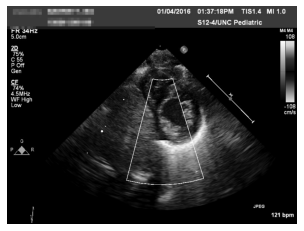

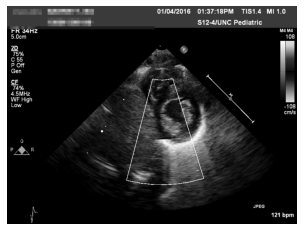

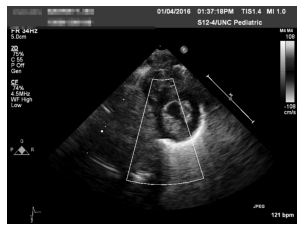

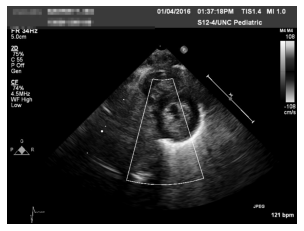

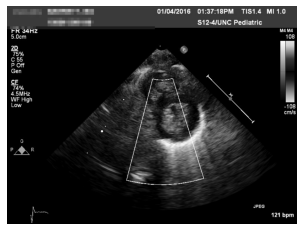

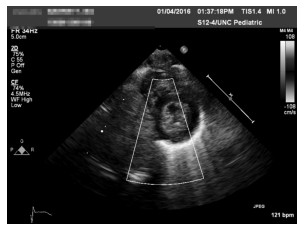

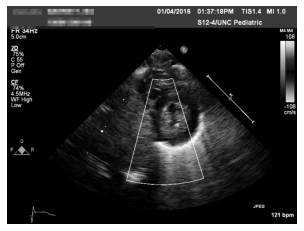

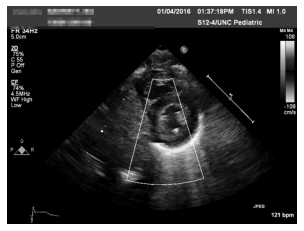

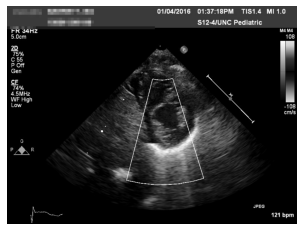

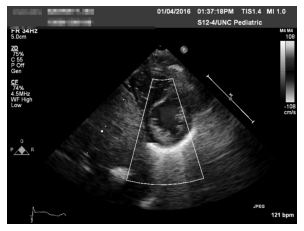

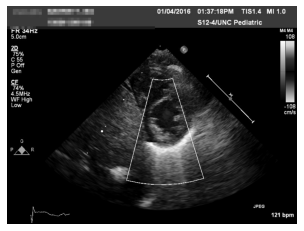

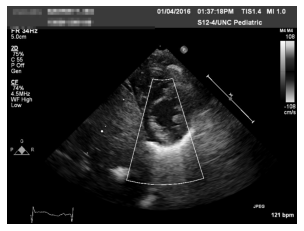

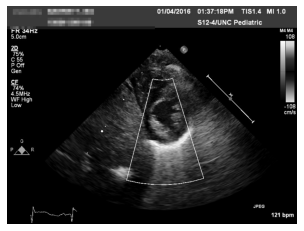

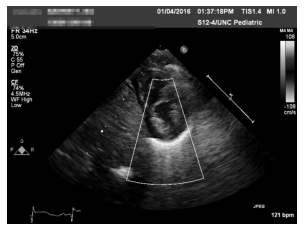

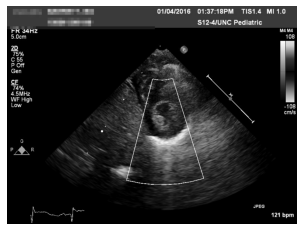

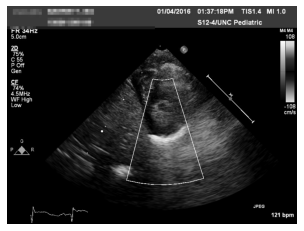

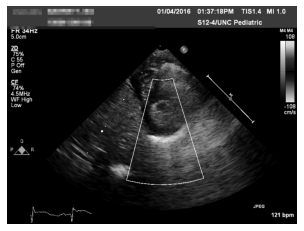

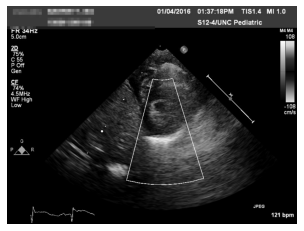

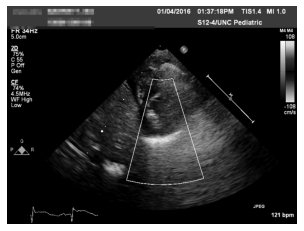

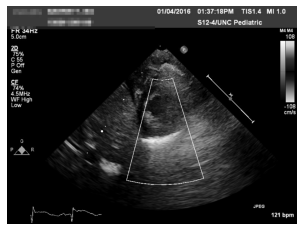

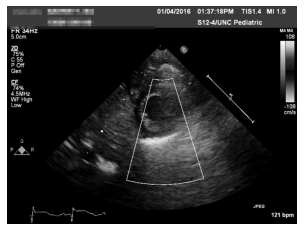

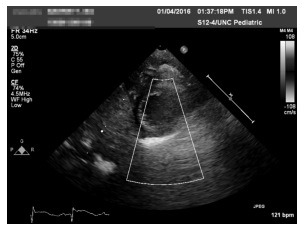

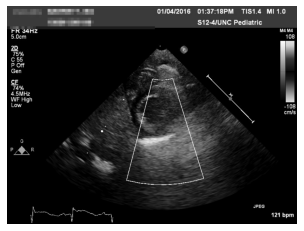

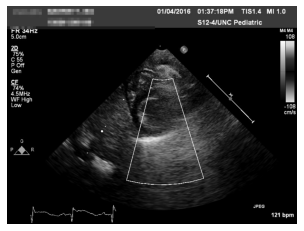

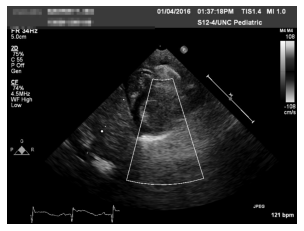

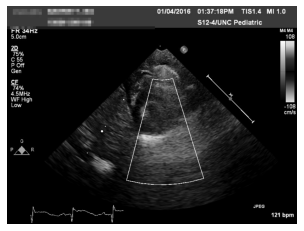

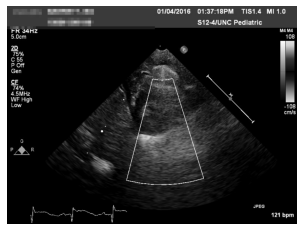

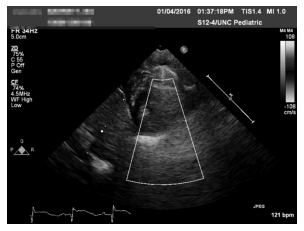

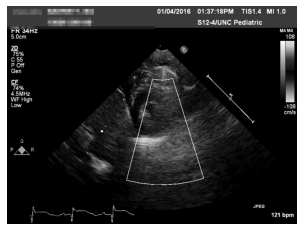

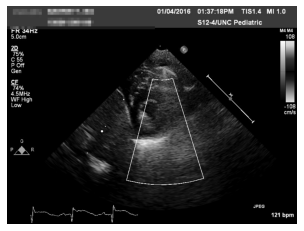

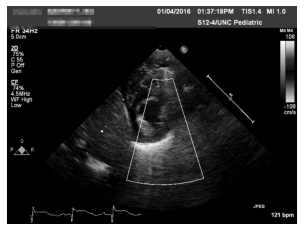

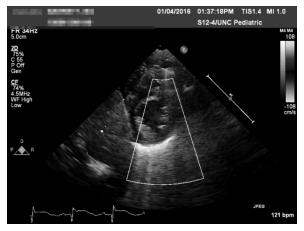

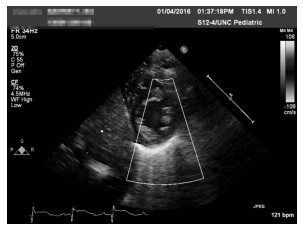

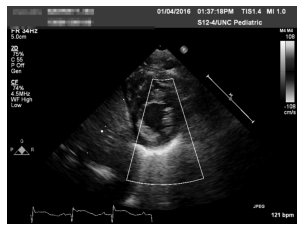

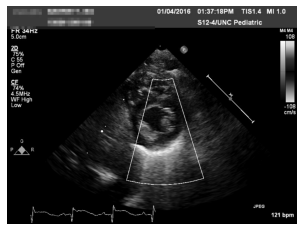

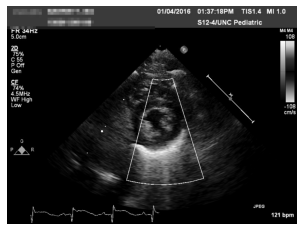

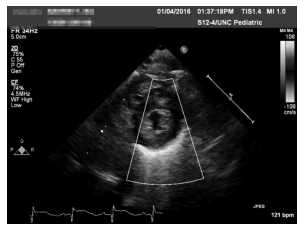

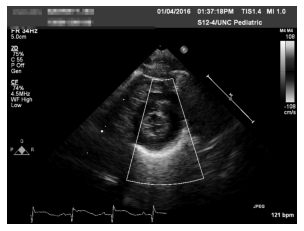

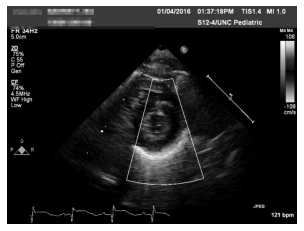

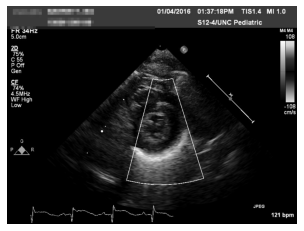

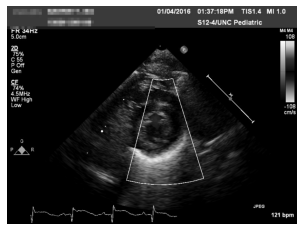

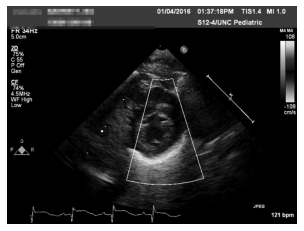

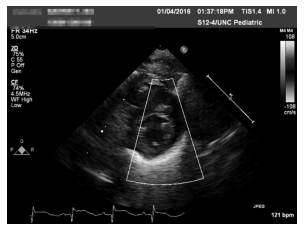

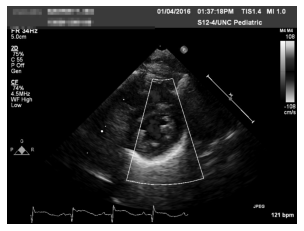

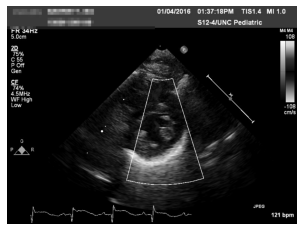

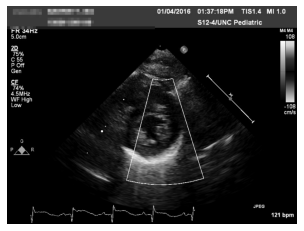

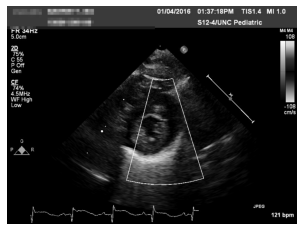

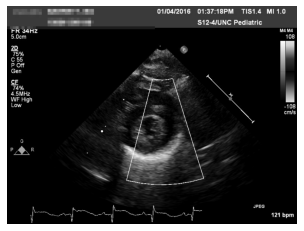

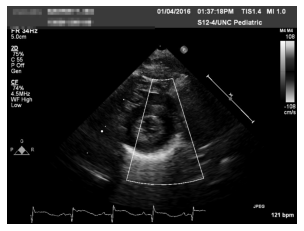

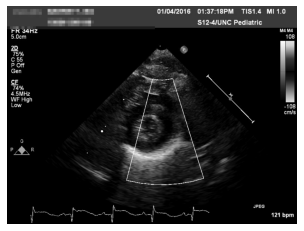

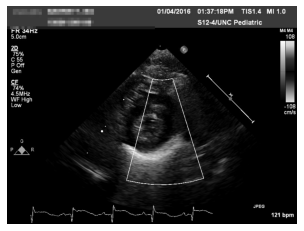

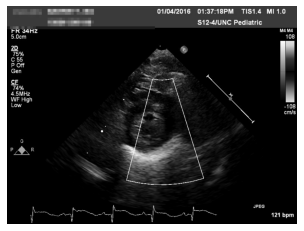

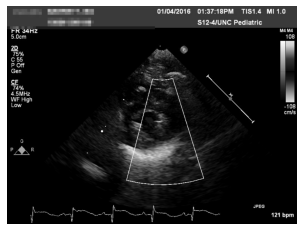

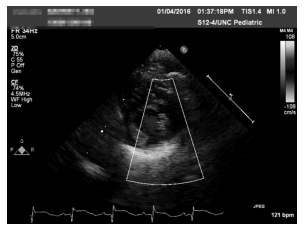

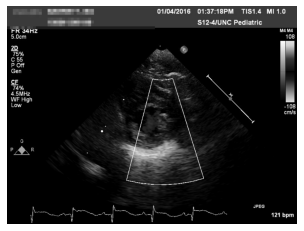

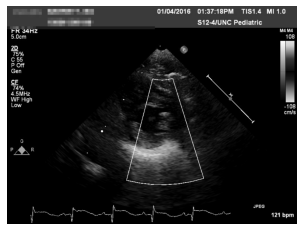

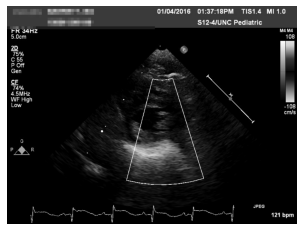

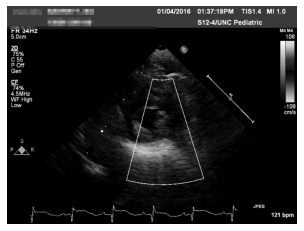

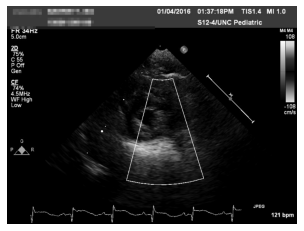

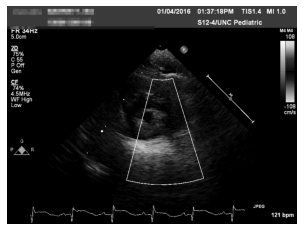

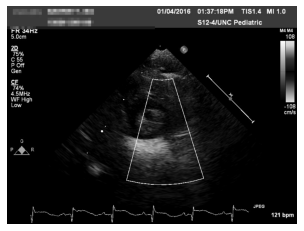

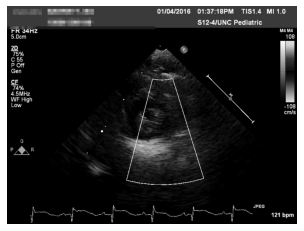

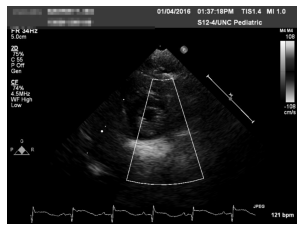

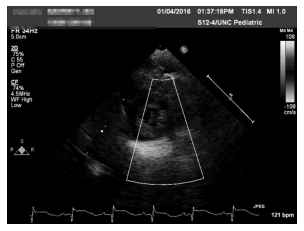

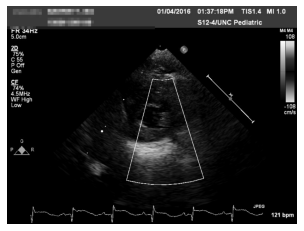

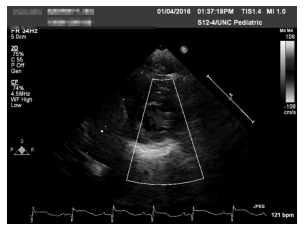

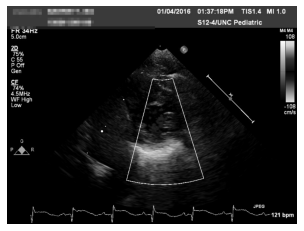

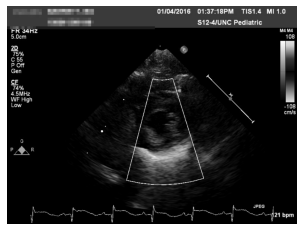

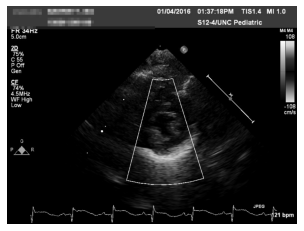

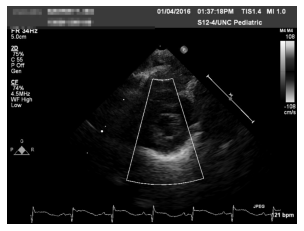

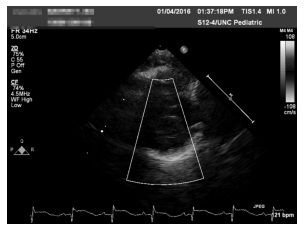

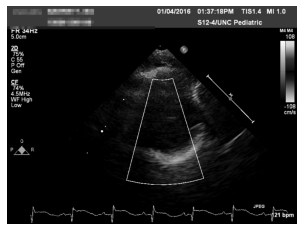

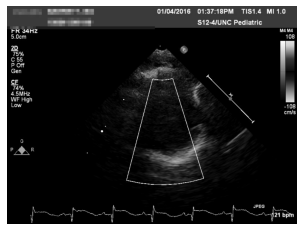

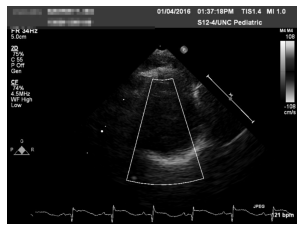

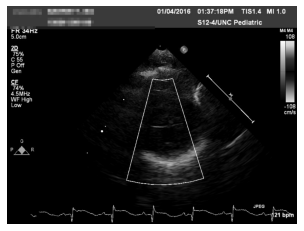

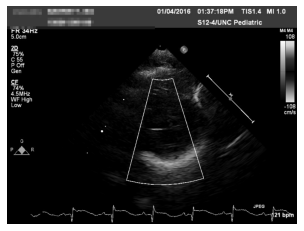

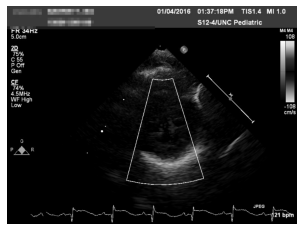

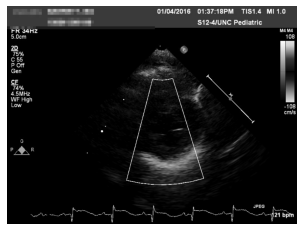

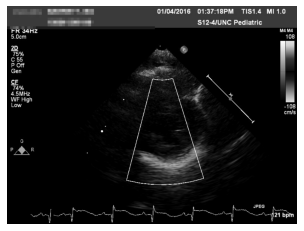

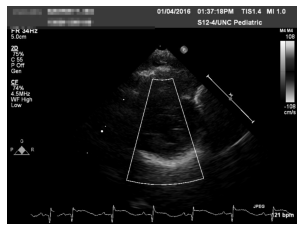

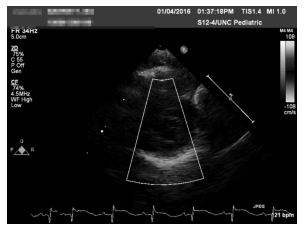

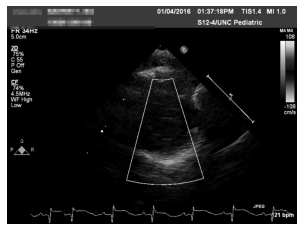

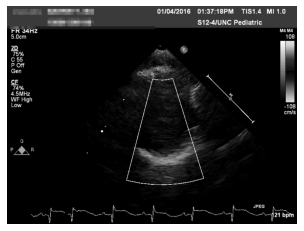

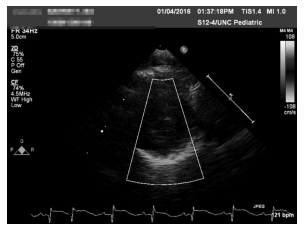

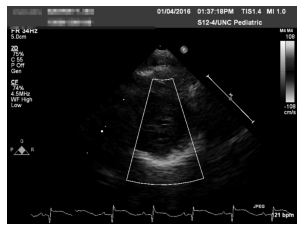

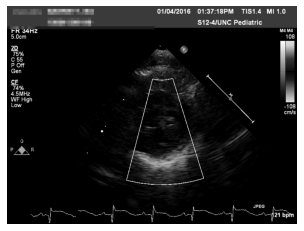

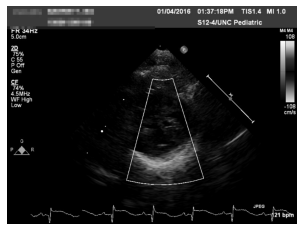

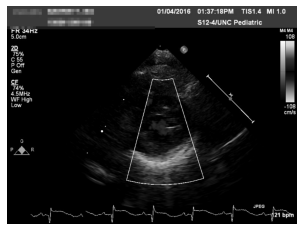

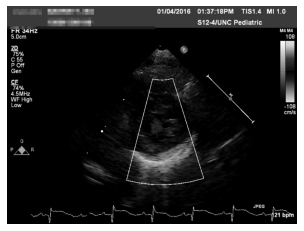

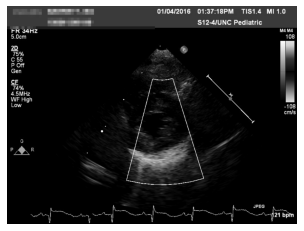

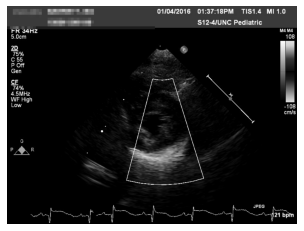

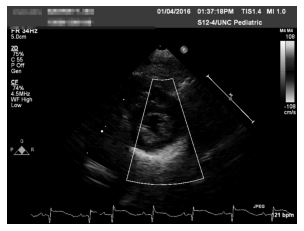

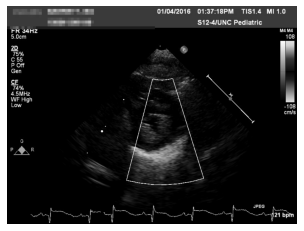

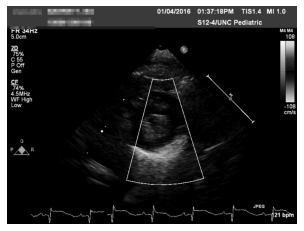

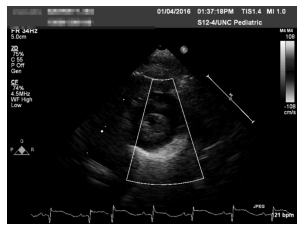

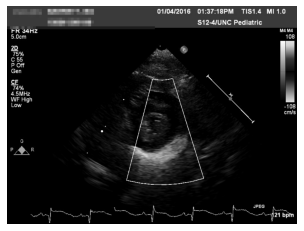

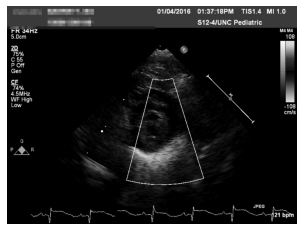

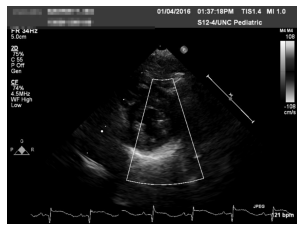

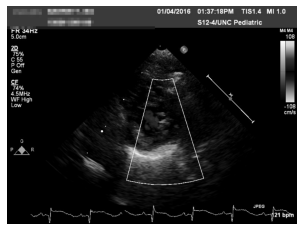

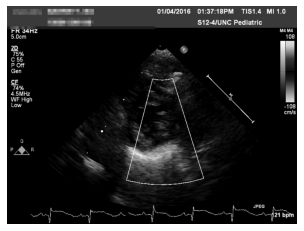

In [95]:
import cv2
import matplotlib.pyplot as plt

# Display each image in the image_array
for img in image_array[:100]:
    plt.figure()
    plt.imshow(cv2.cvtColor(img, cv2.COLOR_BGR2RGB))  # Convert from BGR to RGB
    plt.axis('off')
    plt.show()


In [87]:
# Create a VideoWriter object
video_fps = 15  # Frames per second, adjust as needed
output_video_path = DATA_DIR_PATH + 'processed/mp4/ex12.mp4'
out = cv2.VideoWriter(output_video_path, cv2.VideoWriter_fourcc(*'DIVX'), video_fps, size)

# Write each frame to the video
for img in image_array:
    out.write(img)

# Release the VideoWriter object
out.release()


In [85]:
len(all_images)

8255

In [84]:
len(image_array)

8255

In [86]:
8255/15

550.3333333333334